In [249]:
import pandas as pd
import glob
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 10000)


In [250]:
pd.__version__

'0.25.1'

In [251]:
def create_df_from_pickle_files(target_dir):
    df = pd.DataFrame()
    for file in glob.glob(target_dir + "/*" ):
        #print(f"processing {file}...")
        fdf = pd.read_pickle(file)
        for i in ['Confirmed', 'Deceased', 'Recovered', 'Serious']:
            fdf[i]= pd.to_numeric(fdf[i])     
        df = pd.concat([df,fdf]) 
    return pd.DataFrame(df)

In [252]:
periods = 1 # hour
data_dir = "./data"
df = create_df_from_pickle_files(data_dir)

df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'],format="%Y-%m-%d:%H:%M:%S") 

df = df.sort_values(['Region','Date'])


In [253]:
df['pct'] = df.sort_values('Date').groupby(['Region']).Confirmed.pct_change()

In [254]:
df.groupby(['Region',pd.Grouper(key='Date', freq='h')]).first()

Confirmed  Deceased  \
Region                          Date                                       
Afghanistan                     2020-03-11 09:00:00          7         0   
                                2020-03-11 10:00:00          7         0   
                                2020-03-11 11:00:00          7         0   
                                2020-03-11 12:00:00          7         0   
                                2020-03-11 13:00:00          7         0   
                                2020-03-11 14:00:00          7         0   
                                2020-03-11 15:00:00          7         0   
                                2020-03-11 16:00:00          7         0   
                                2020-03-11 17:00:00          7         0   
                                2020-03-11 18:00:00          7         0   
                                2020-03-11 19:00:00          7         0   
                                2020-03-11 20:00:00          7         0   
                                2020-03-11 21:00:00          7         0   
                                2020-03-11 22:00:00          7         0   
                                2020-03-11 23:00:00          7         0   
                                2020-03-12 00:00:00          7         0   
                                2020-03-12 01:00:00          7         0   
                                2020-03-12 02:00:00          7         0   
                                2020-03-12 03:00:00          7         0   
                                2020-03-12 04:00:00          7         0   
                                2020-03-12 05:00:00          7         0   
                                2020-03-12 06:00:00          7         0   
                                2020-03-12 07:00:00          7         0   
                                2020-03-12 08:00:00          7         0   
                                2020-03-12 09:00:00          7         0   
                                2020-03-12 10:00:00          7         0   
                                2020-03-12 11:00:00          7         0   
Alabama                         2020-03-11 09:00:00          0         0   
                                2020-03-11 10:00:00          0         0   
                                2020-03-11 11:00:00          0         0   
                                2020-03-11 12:00:00          0         0   
                                2020-03-11 13:00:00          0         0   
                                2020-03-11 14:00:00          0         0   
                                2020-03-11 15:00:00          0         0   
                                2020-03-11 16:00:00          0         0   
                                2020-03-11 17:00:00          0         0   
                                2020-03-11 18:00:00          0         0   
                                2020-03-11 19:00:00          0         0   
                                2020-03-11 20:00:00          0         0   
                                2020-03-11 21:00:00          0         0   
                                2020-03-11 22:00:00          0         0   
                                2020-03-11 23:00:00          0         0   
                                2020-03-12 00:00:00          0         0   
                                2020-03-12 01:00:00          0         0   
                                2020-03-12 02:00:00          0         0   
                                2020-03-12 03:00:00          0         0   
                                2020-03-12 04:00:00          0         0   
                                2020-03-12 05:00:00          0         0   
                                2020-03-12 06:00:00          0         0   
                                2020-03-12 07:00:00          0         0   
                                2020-03-12 08:00:00          0         0   
                         

In [255]:
df.set_index('Date',inplace=True)

Below represents aggregate reported infection rates over time in hours. 

Mainland China


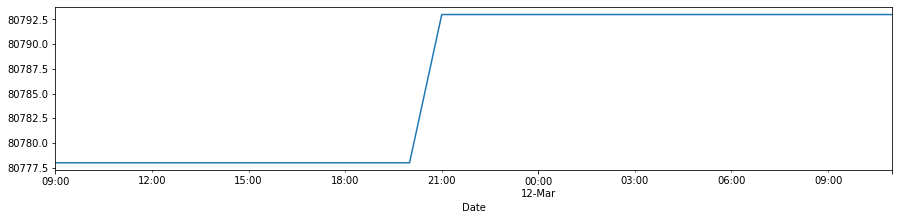

Hubei province (includes Wuhan)


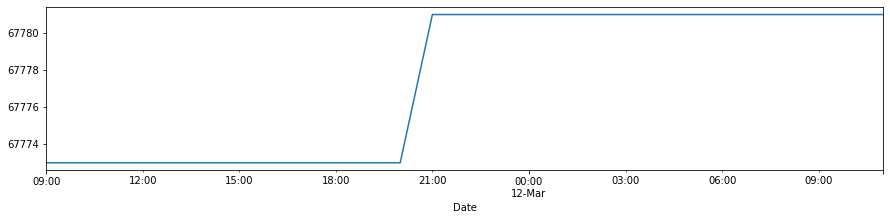

Italy


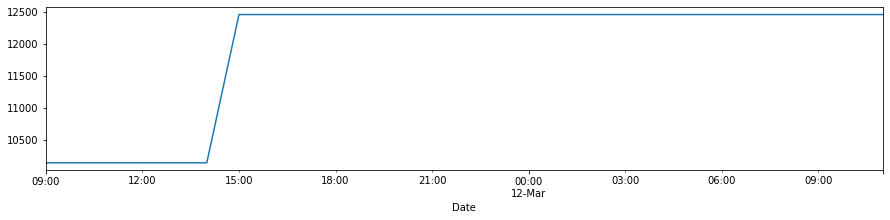

Iran


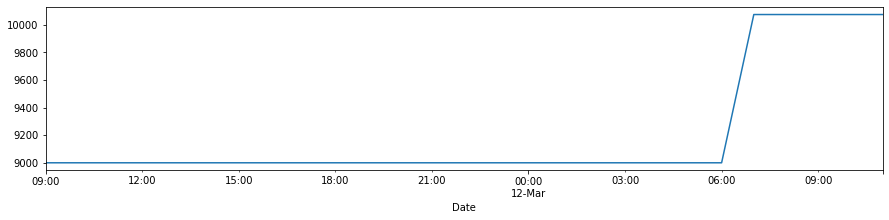

South Korea


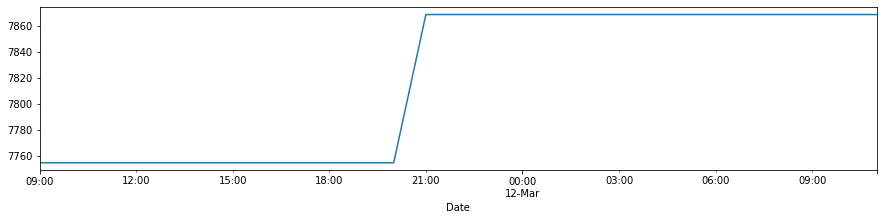

Other regions


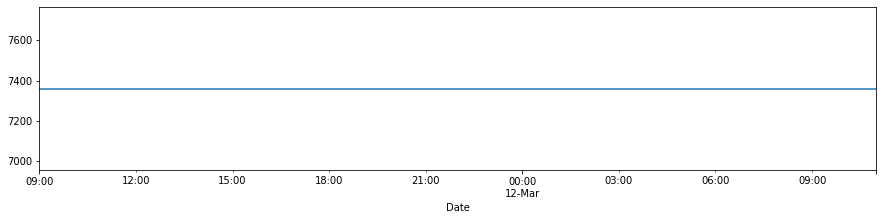

France


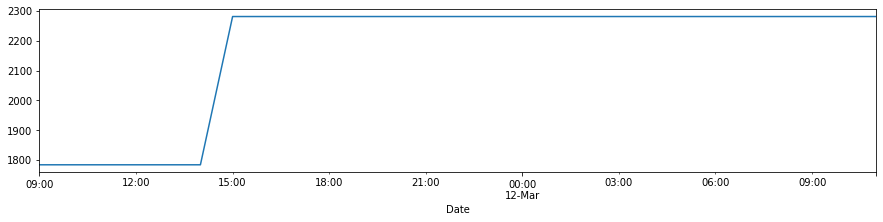

Spain


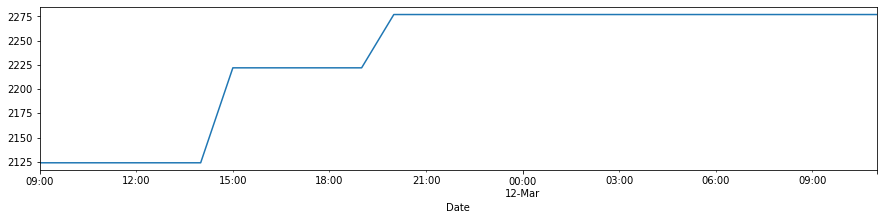

Germany


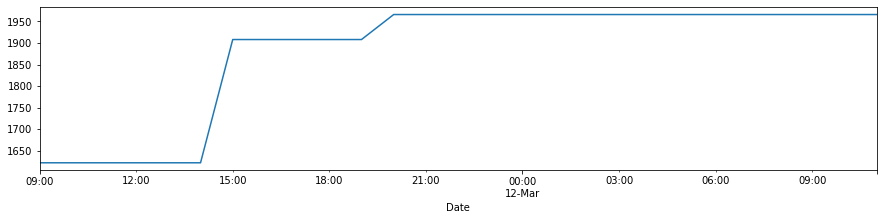

España


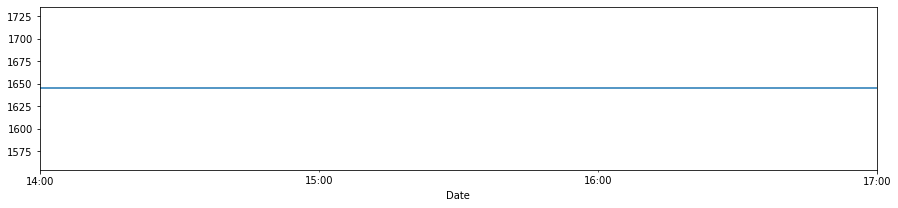

Guangdong province


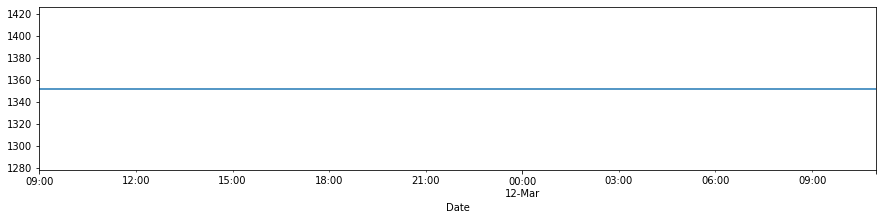

United States


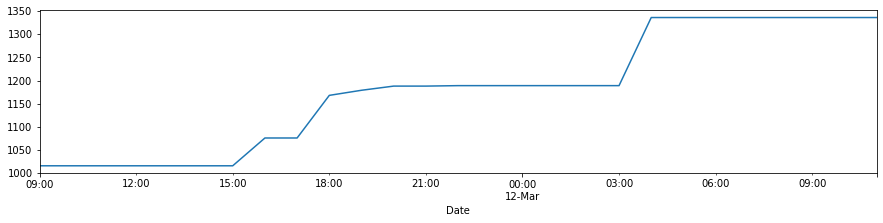

Henan province


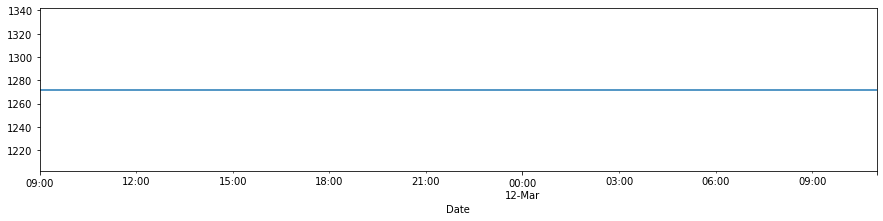

Zhejiang province


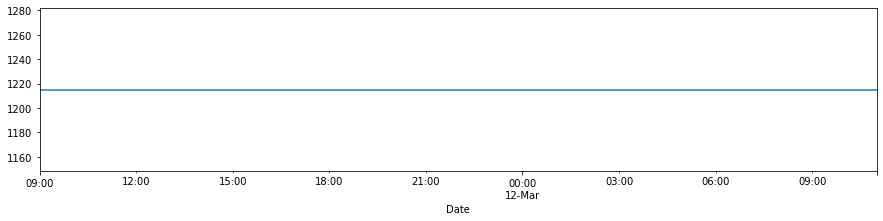

Hunan province


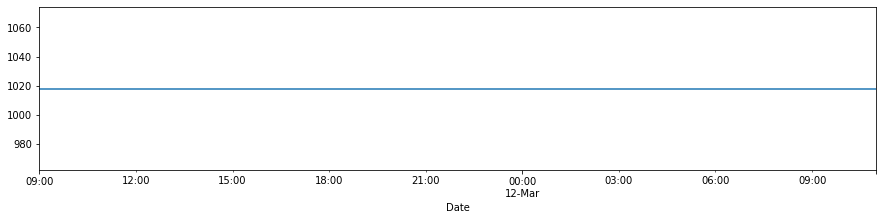

Switzerland


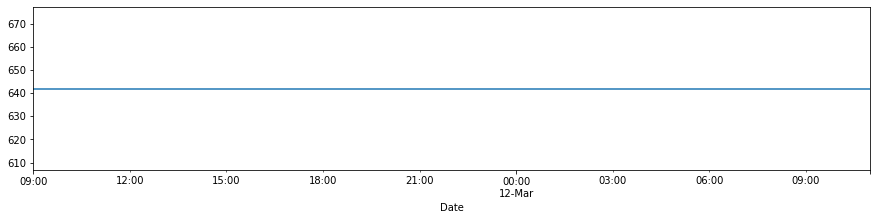

Japan


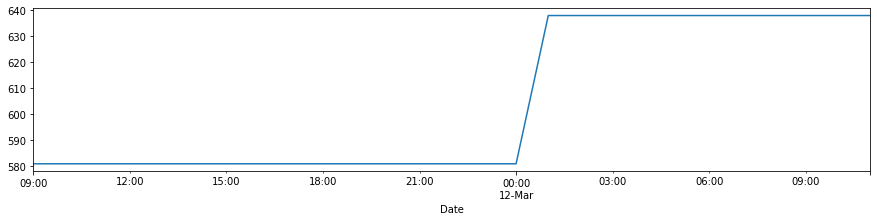

Norway


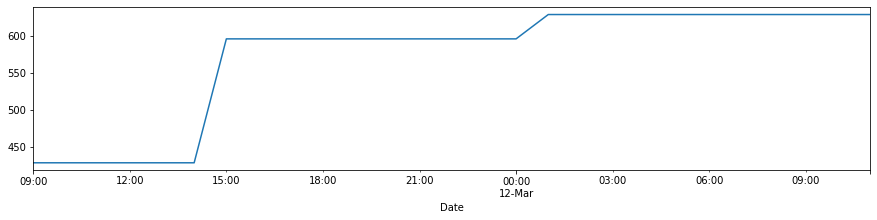

Denmark*


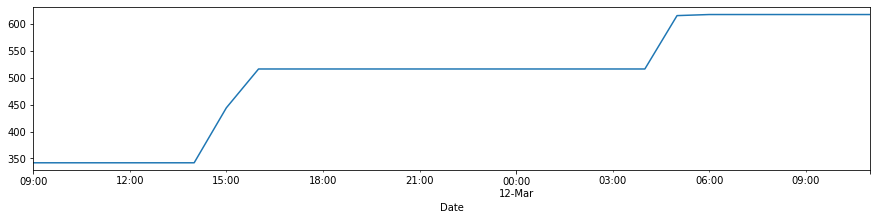

Netherlands


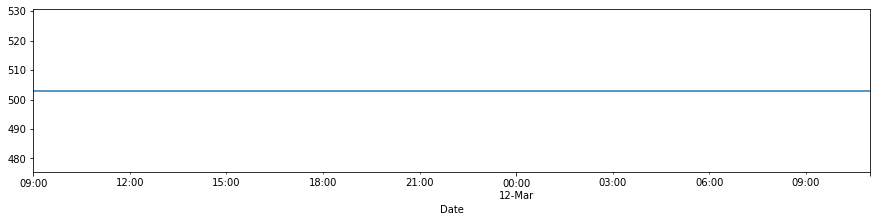

Sweden


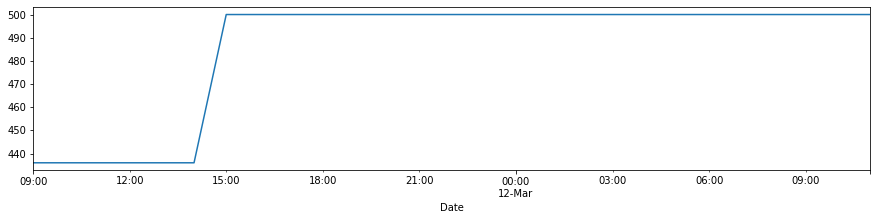

United Kingdom


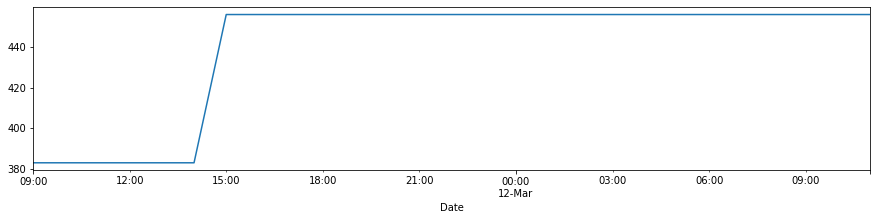

Beijing


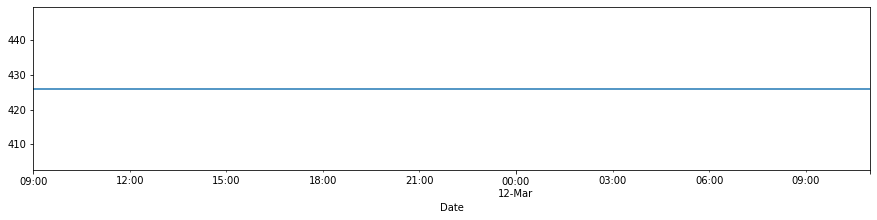

Washington


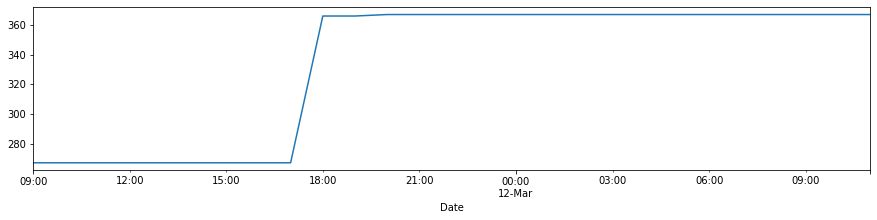

Shanghai


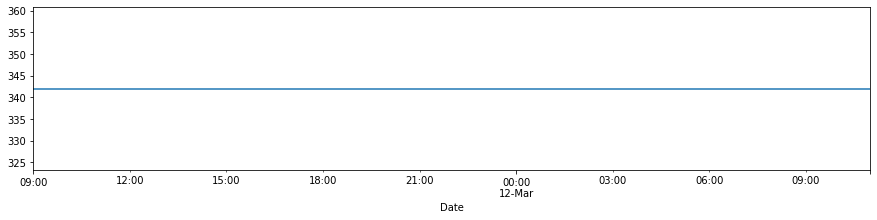

Belgium


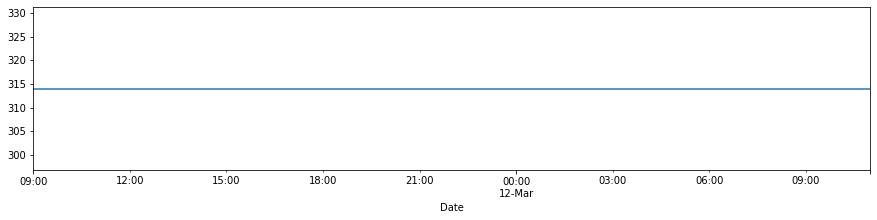

Austria


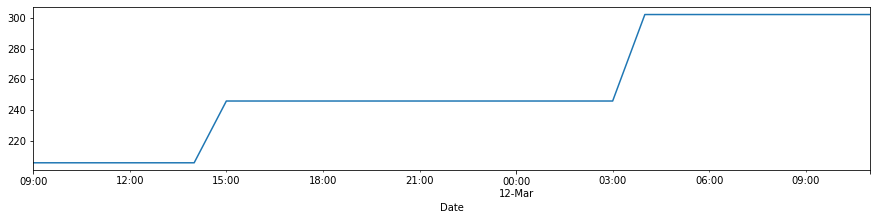

Qatar


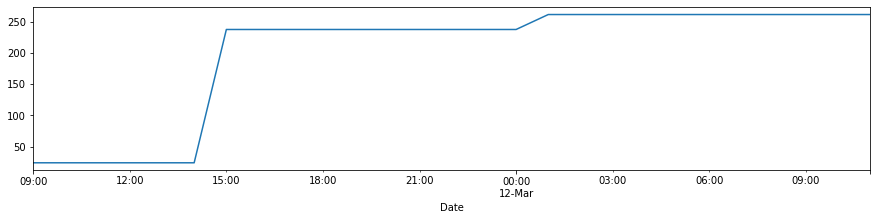

New York


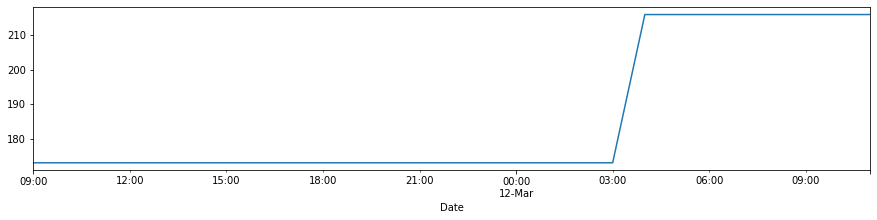

Bahrain


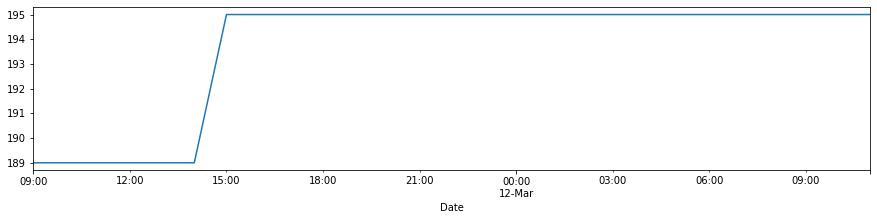

Singapore


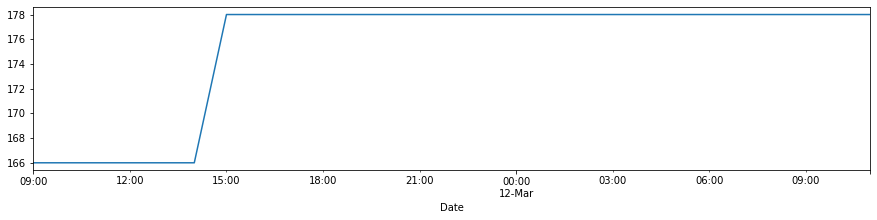

Australia


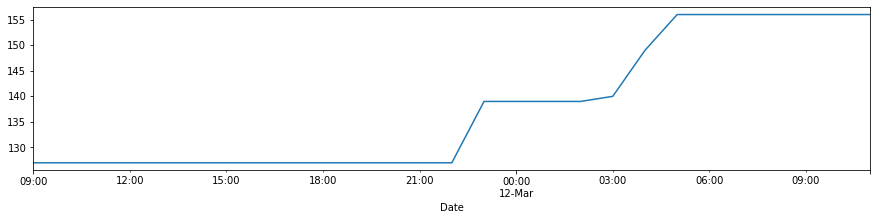

Malaysia


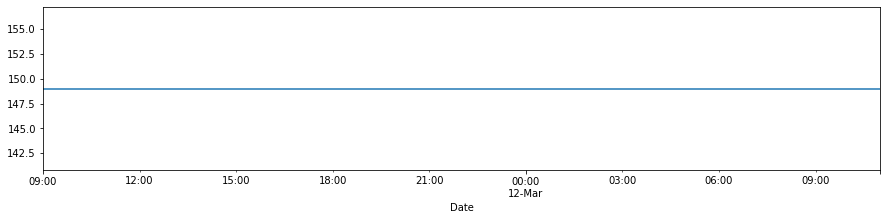

Hong Kong


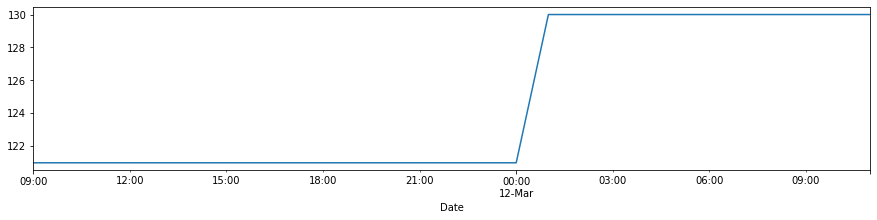

Canada


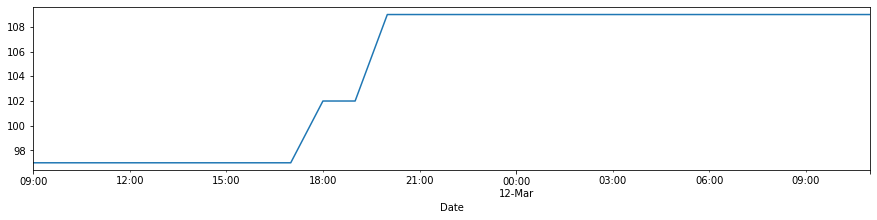

California


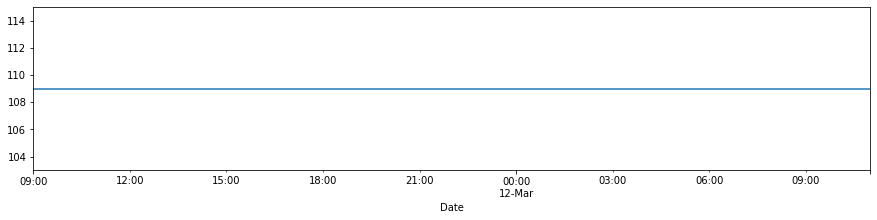

TBD


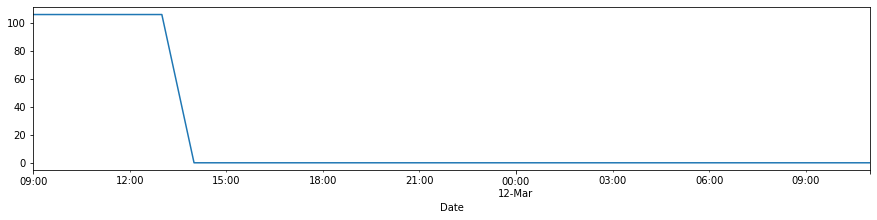

Israel


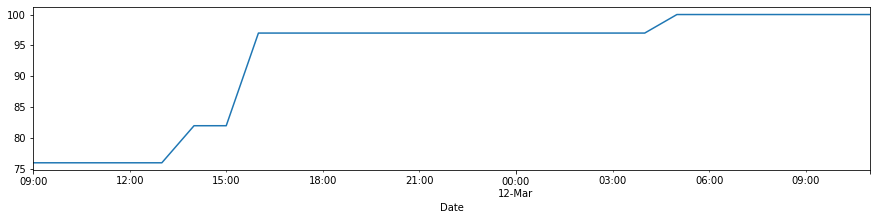

Greece


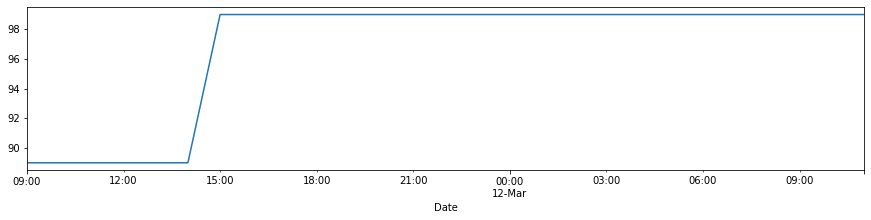

Czech Republic


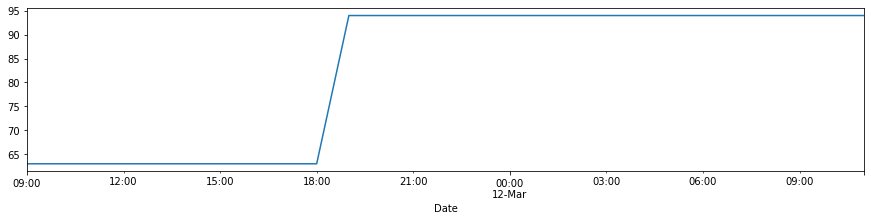

Massachusetts


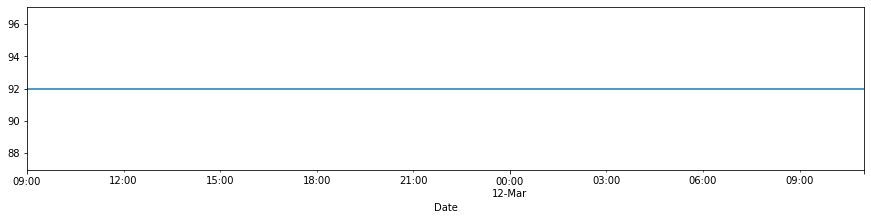

Iceland


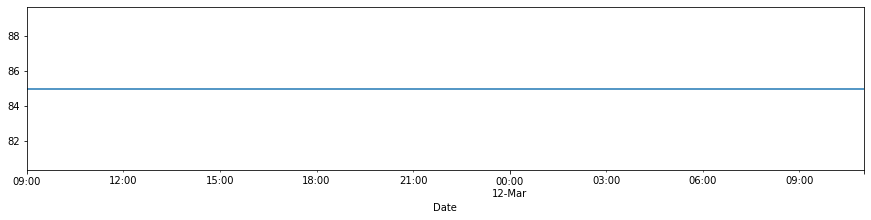

Kuwait


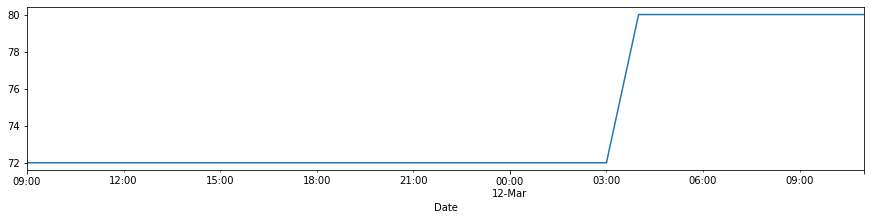

New South Wales


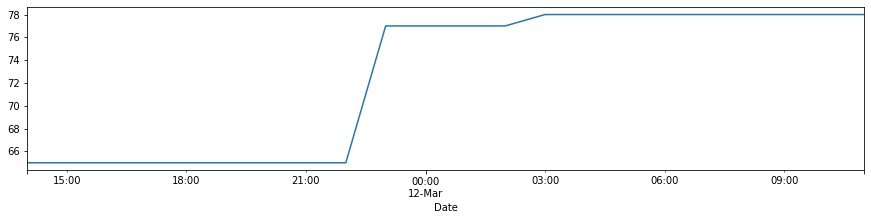

UAE


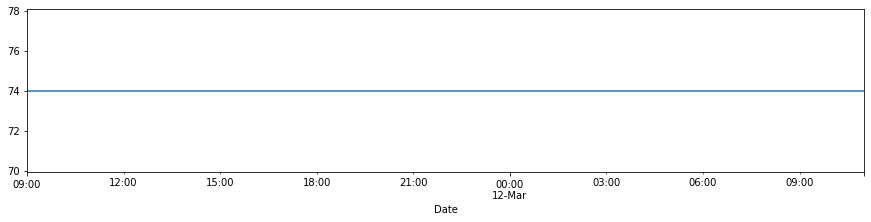

India


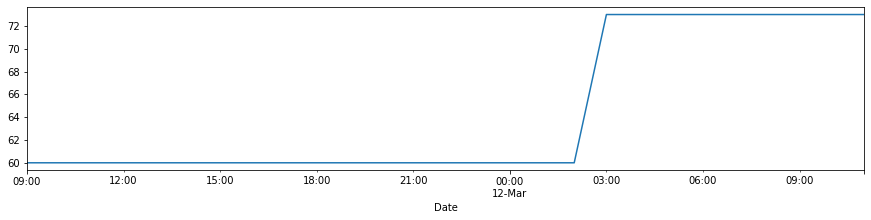

Iraq


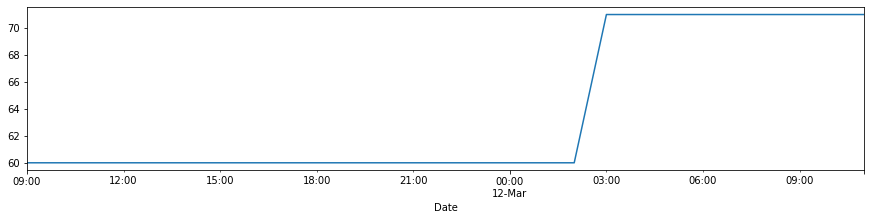

Thailand


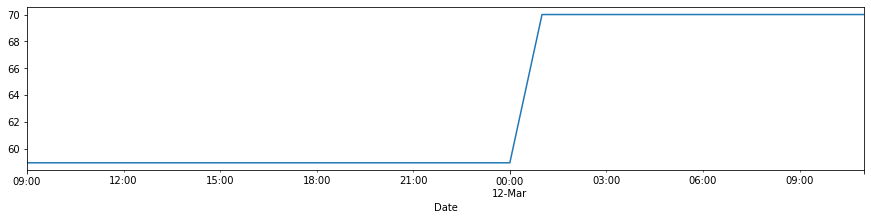

Brasil


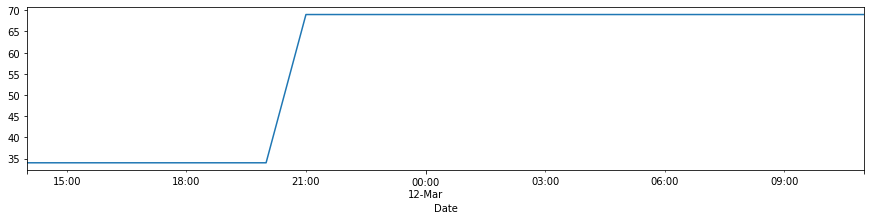

Egypt


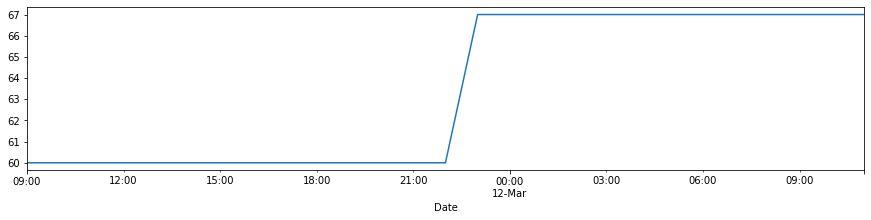

San Marino


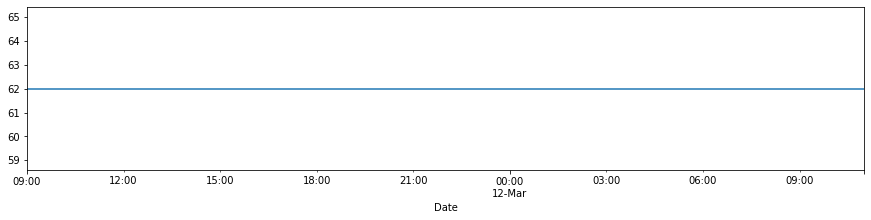

Lebanon


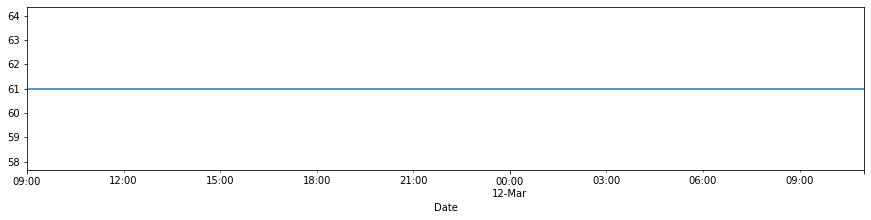

Finland


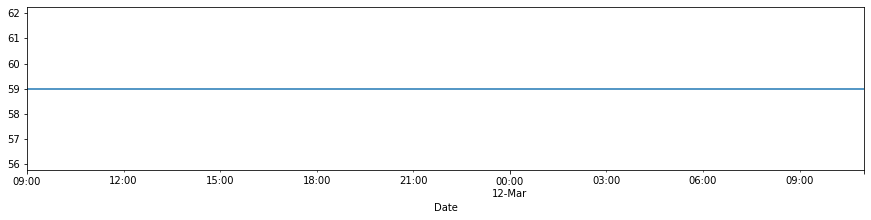

Portugal


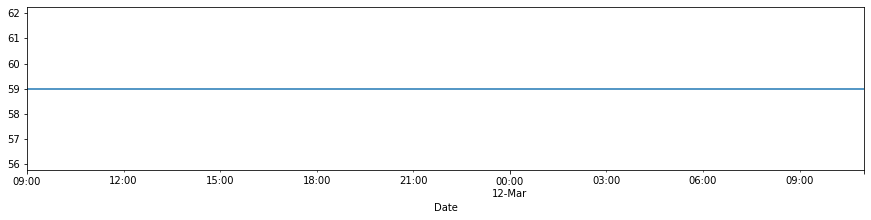

Slovenia


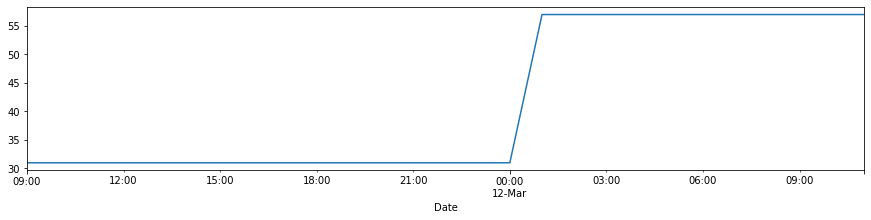

Brazil


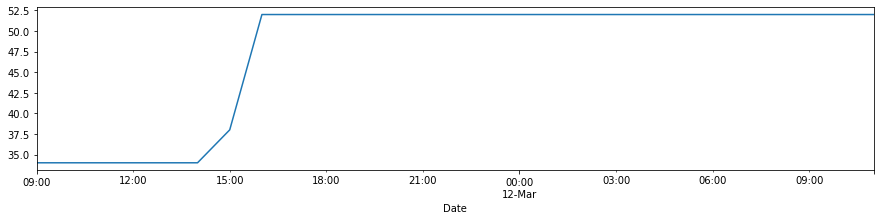

Philippines


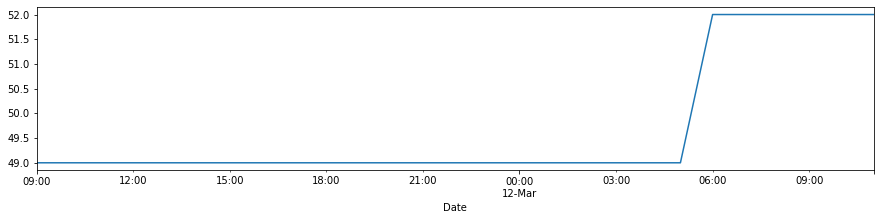

Taiwan


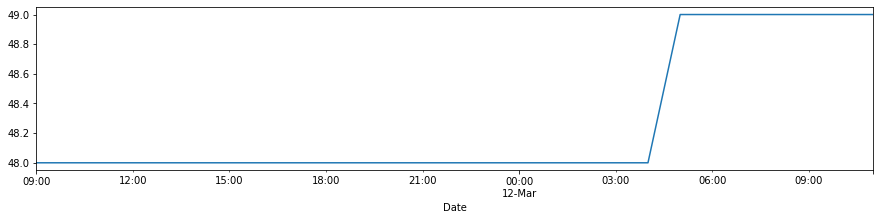

Romania


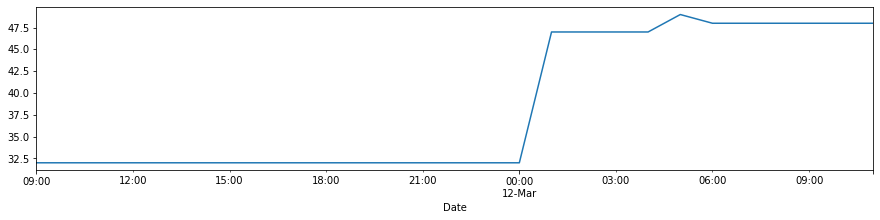

Poland


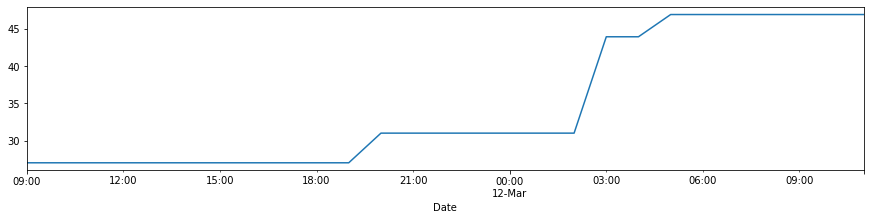

British Columbia


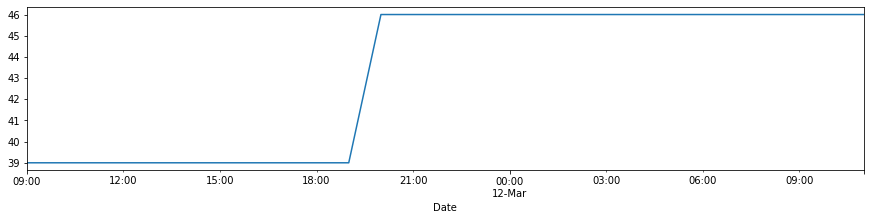

Saudi Arabia


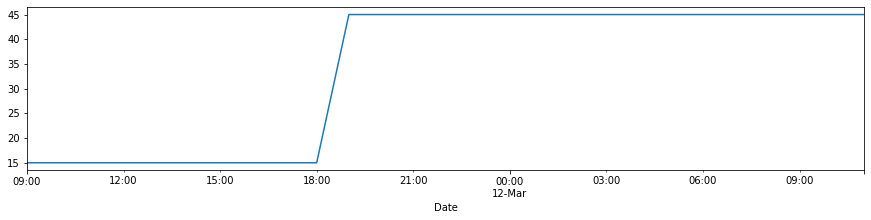

Diamond Princess


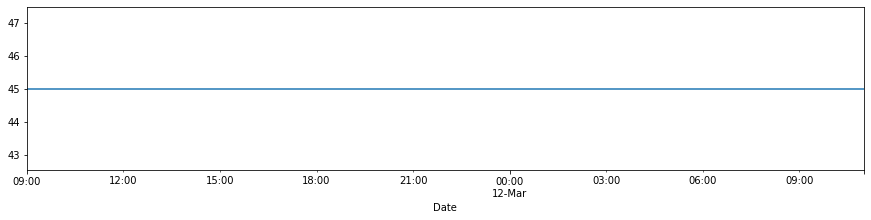

Ireland


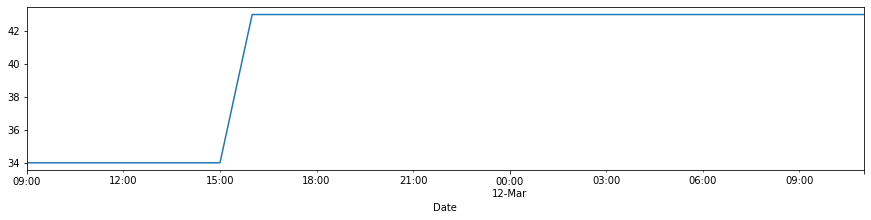

Vietnam


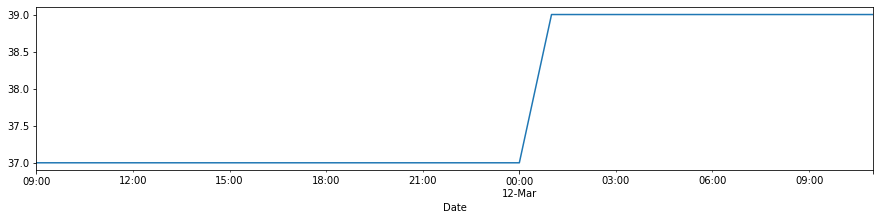

Ontario


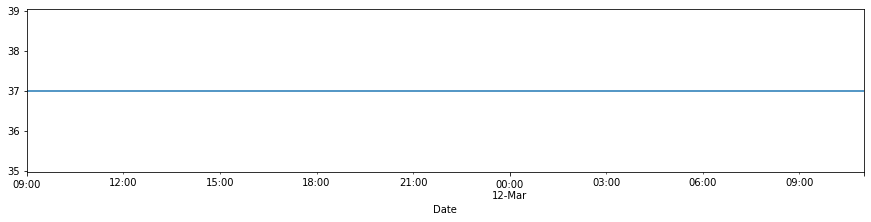

Indonesia


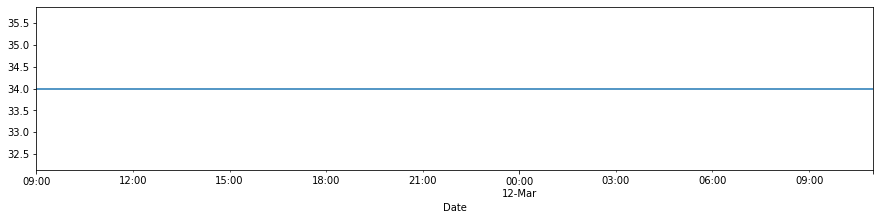

Palestine


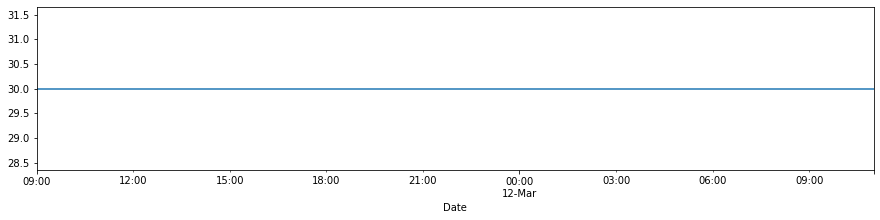

Russia


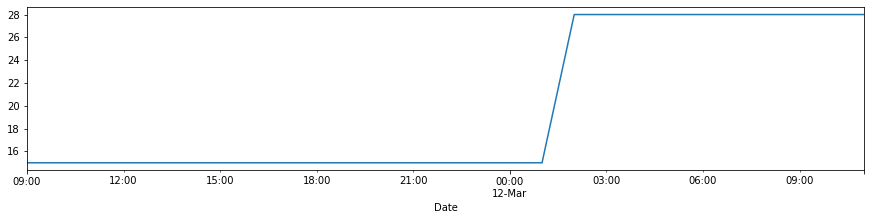

Queensland


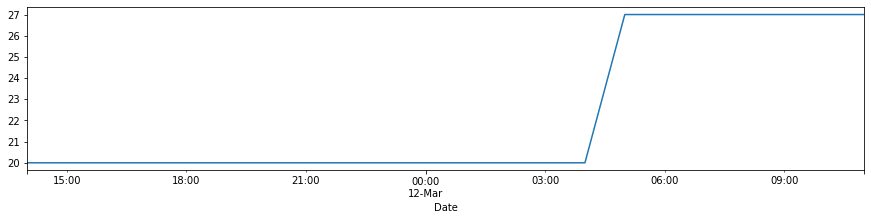

Victoria


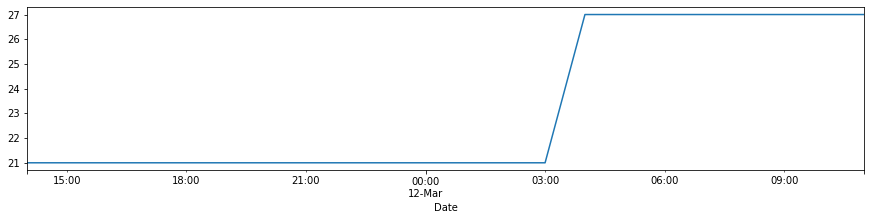

Undisclosed


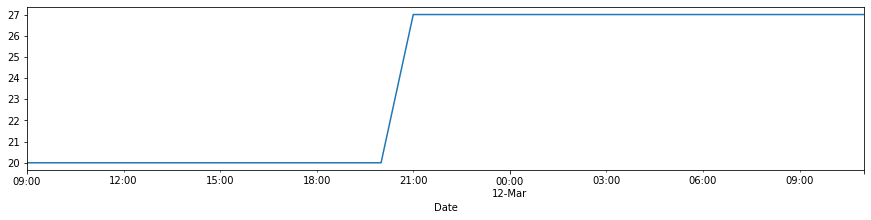

Algeria


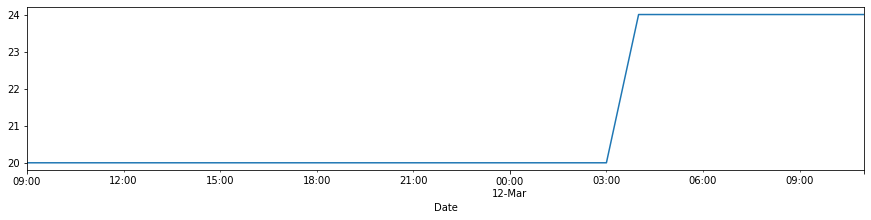

New Jersey


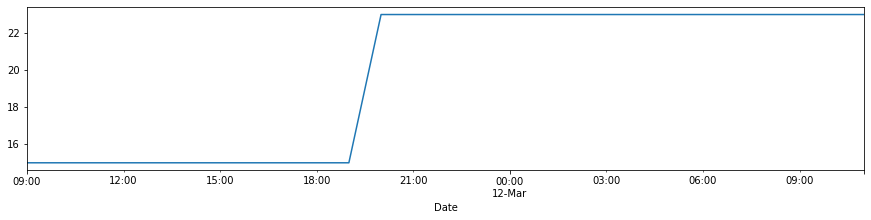

Chile


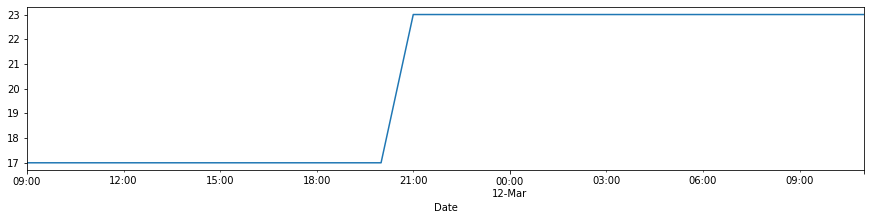

Georgia


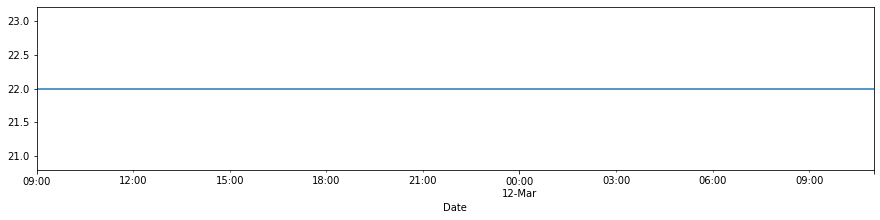

Costa Rica


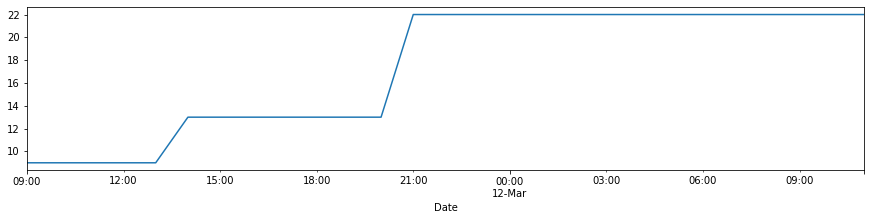

Argentina


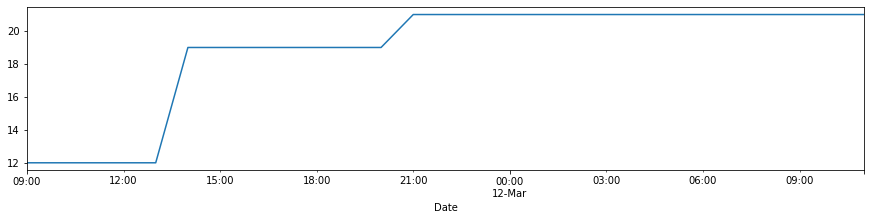

Florida


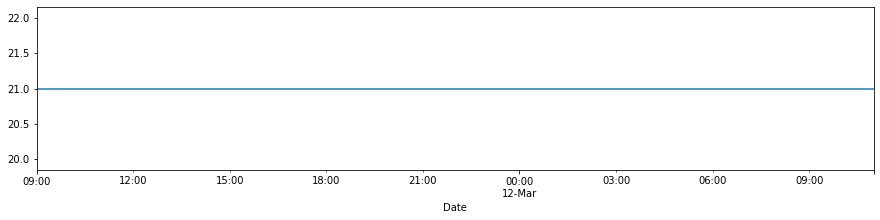

Grand Princess


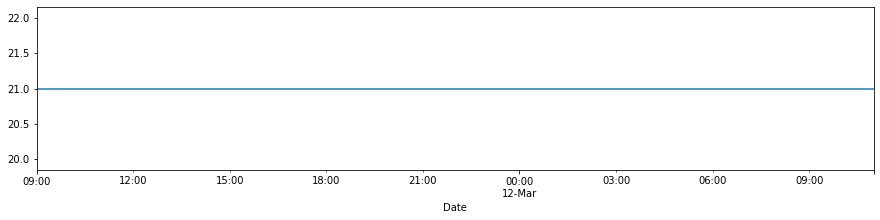

Serbia


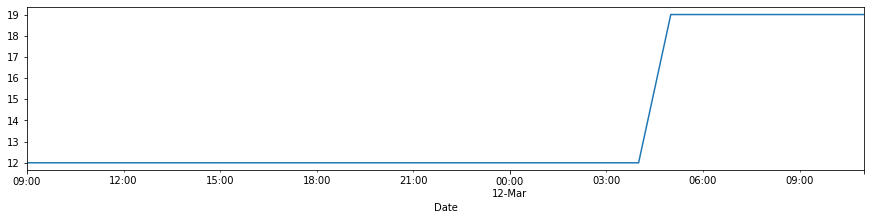

Pakistan


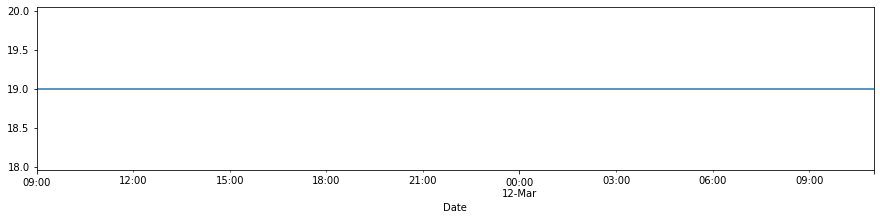

Alberta


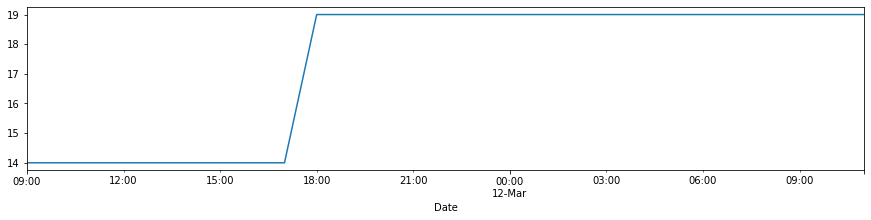

Croatia


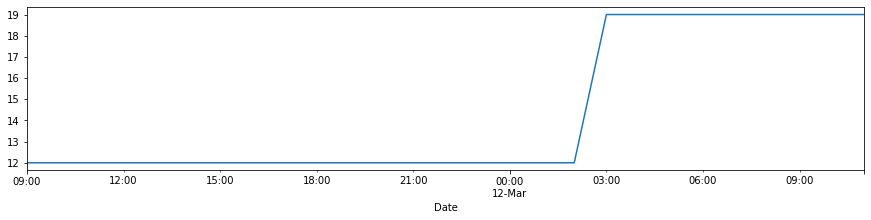

Illinois


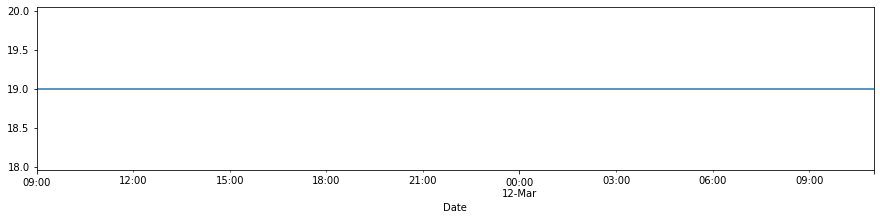

Luxembourg


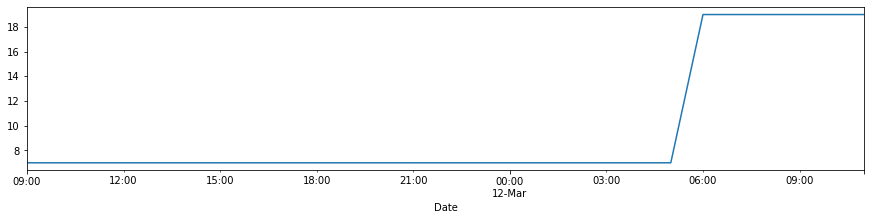

Oman


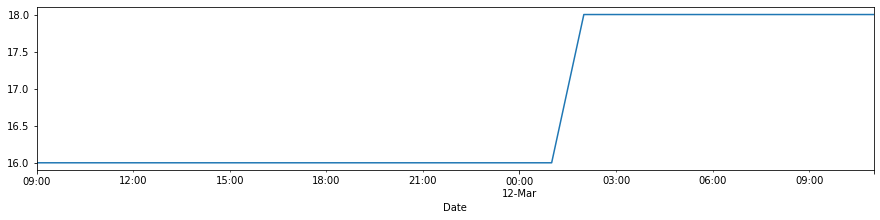

Ecuador


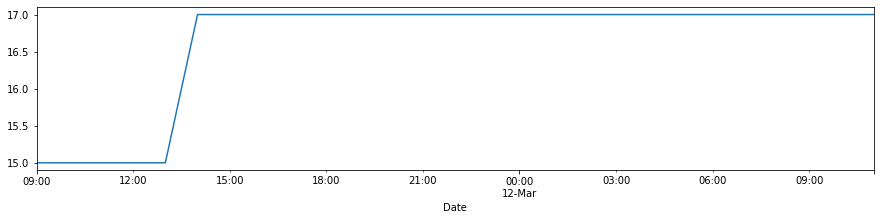

Peru


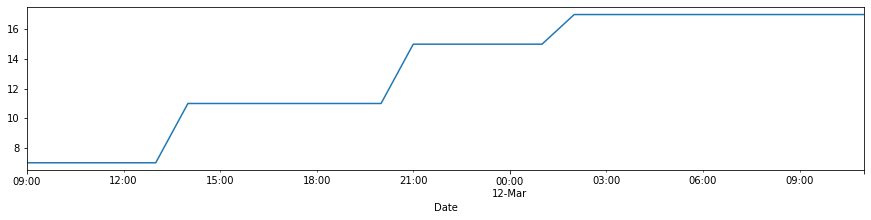

South Africa


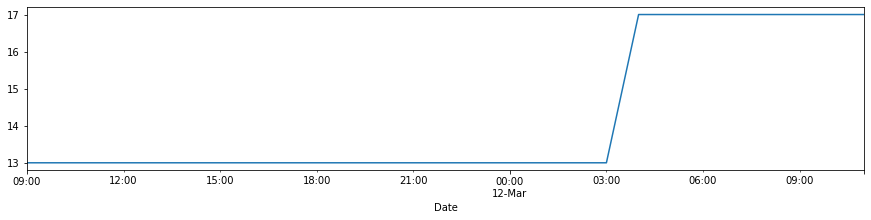

Latvia


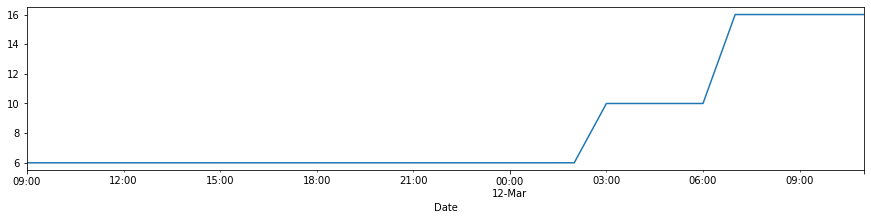

Albania


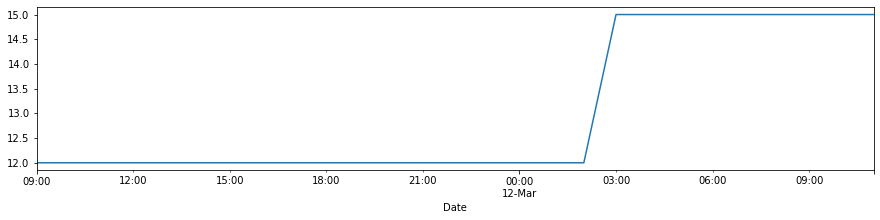

Oregon


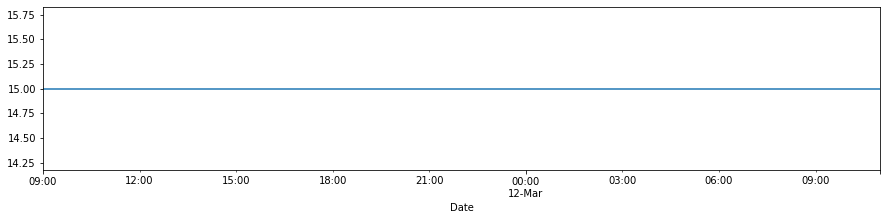

Panamá


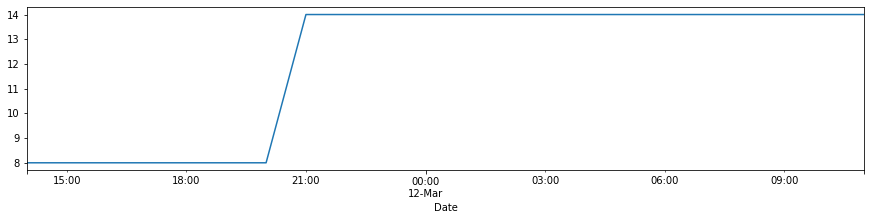

Iowa


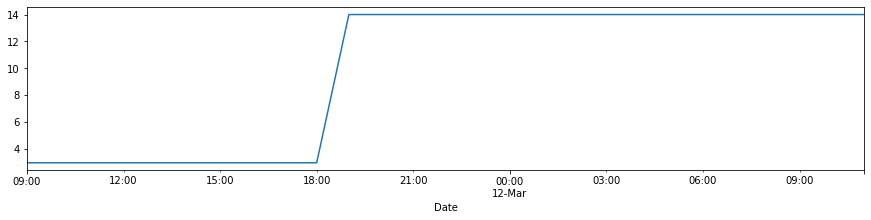

Hungary


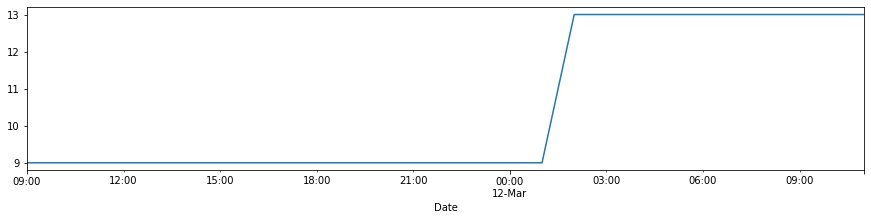

México


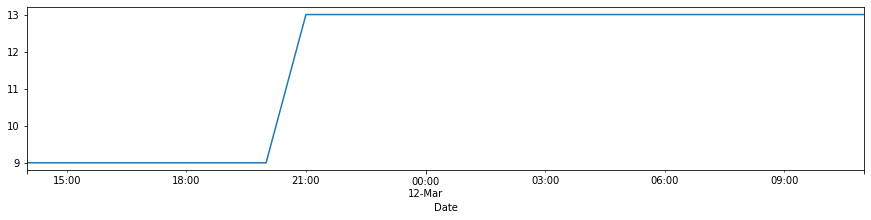

Mexico


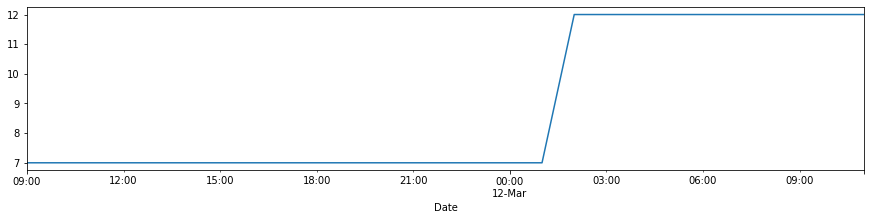

Belarus


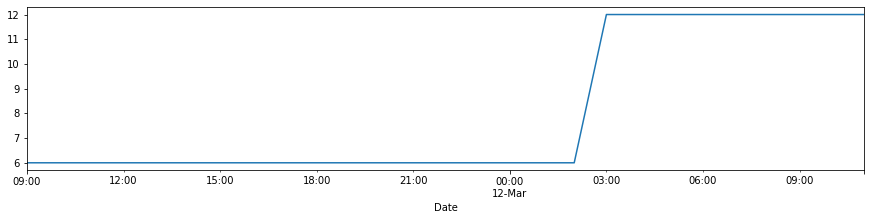

South Australia


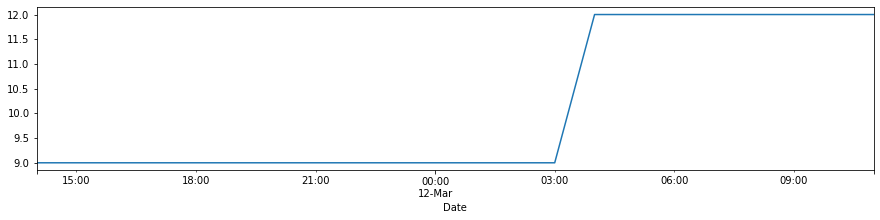

Azerbaijan


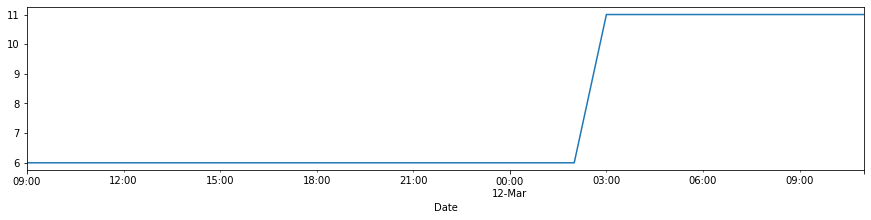

Bosnia


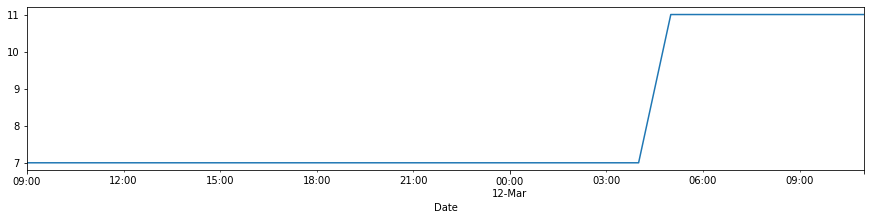

Pennsylvania


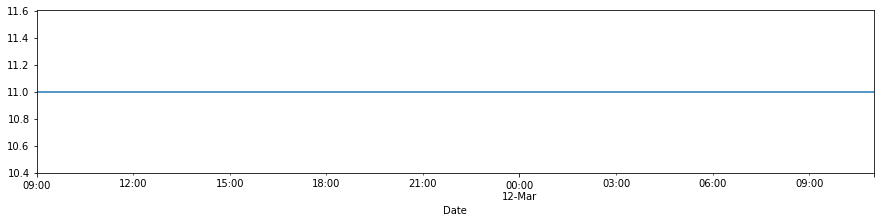

Estonia


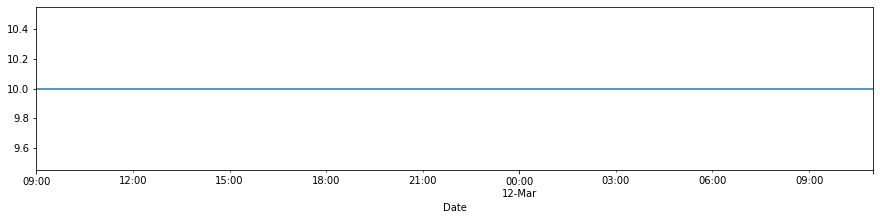

Macau


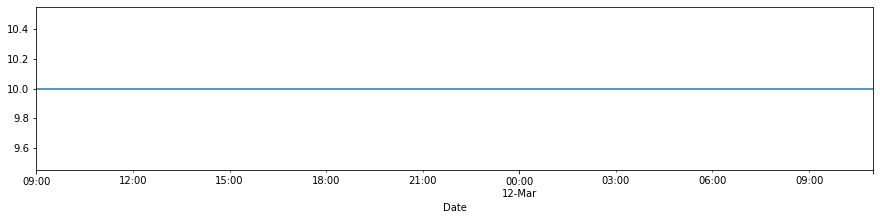

Slovakia


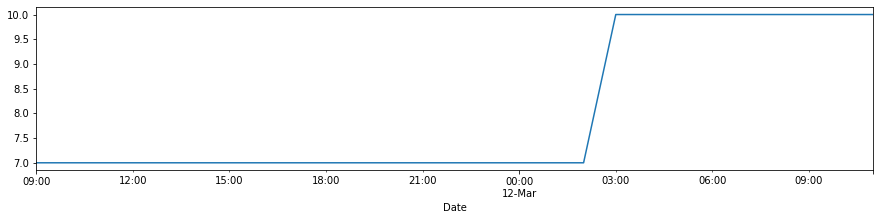

South Carolina


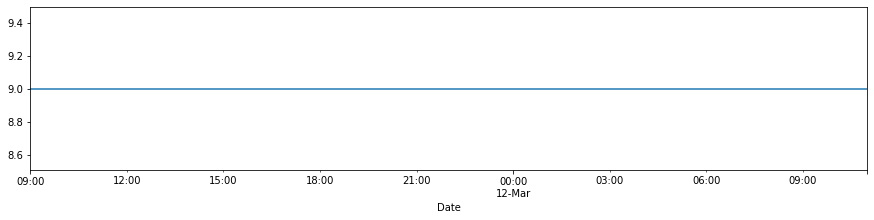

Colombia


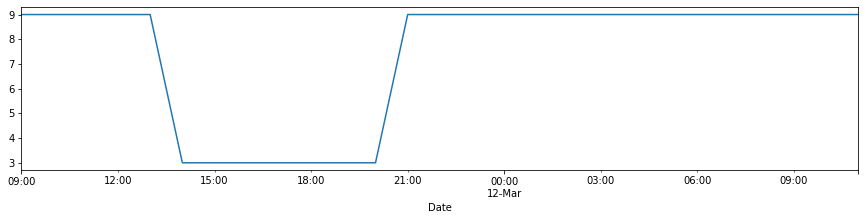

Western Australia


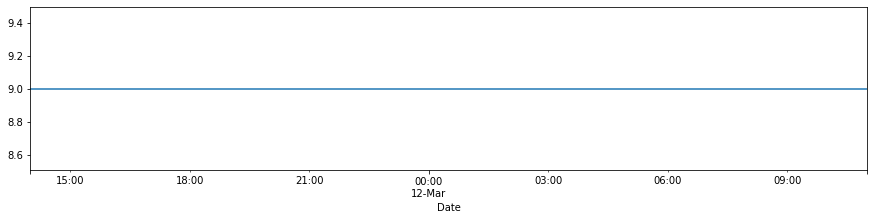

Arizona


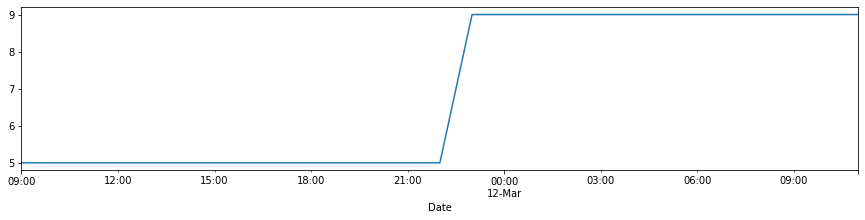

Colorado


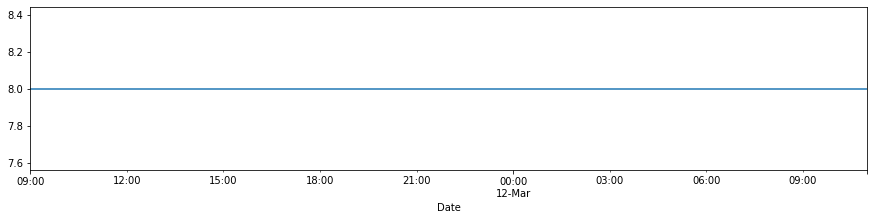

Panama


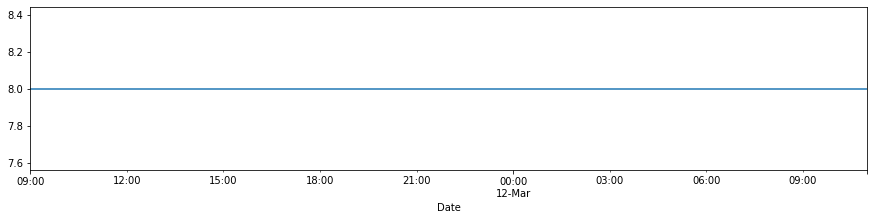

Maldives


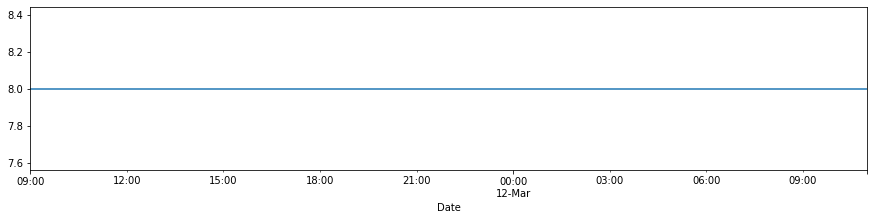

Kentucky


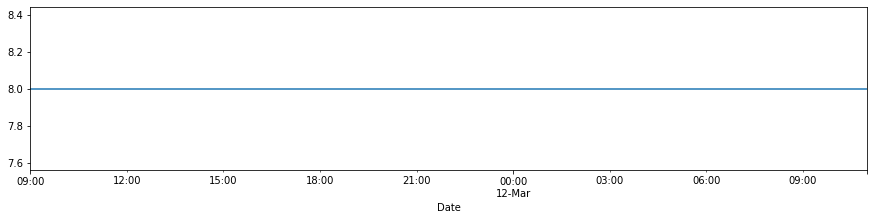

Quebec


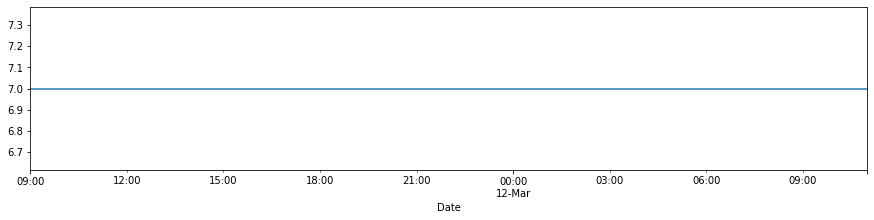

Texas


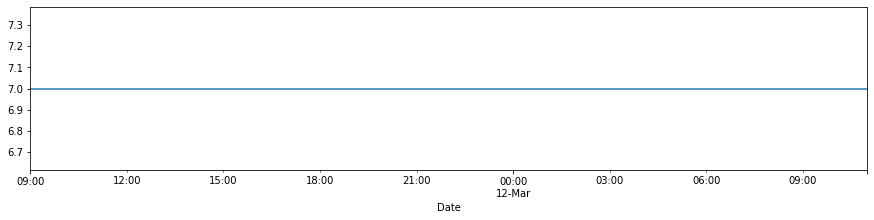

North Macedonia


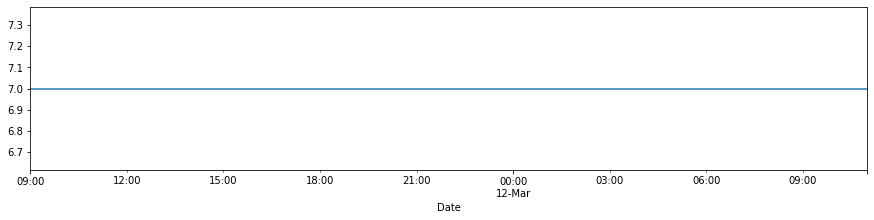

Tunisia


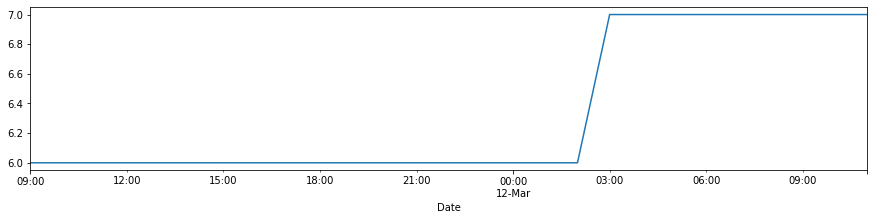

Afghanistan


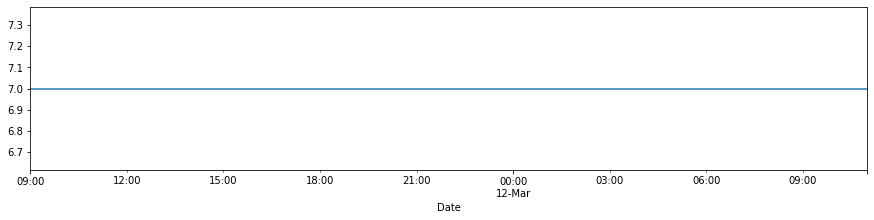

Bulgaria


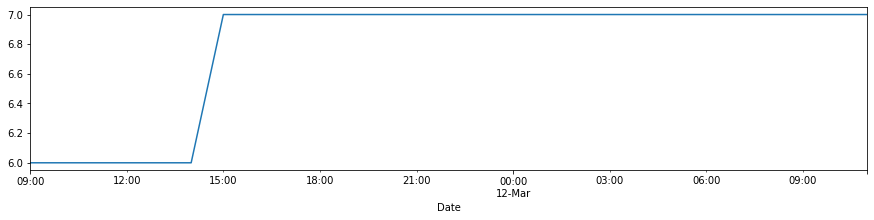

Malta


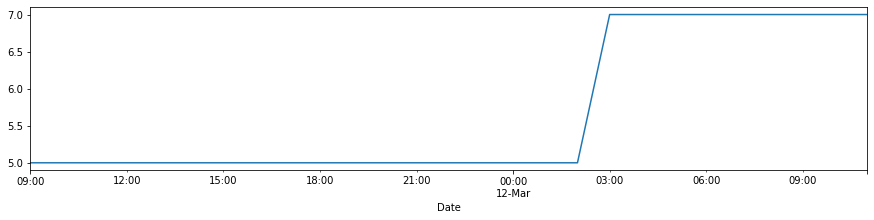

Cyprus


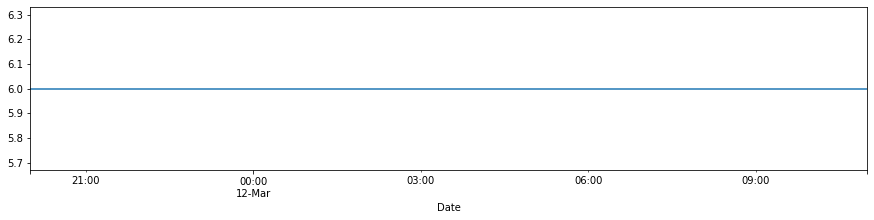

Maryland


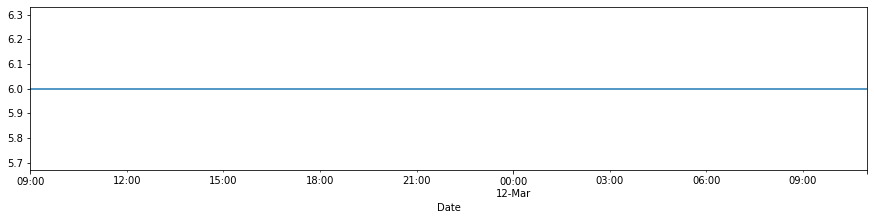

Morocco


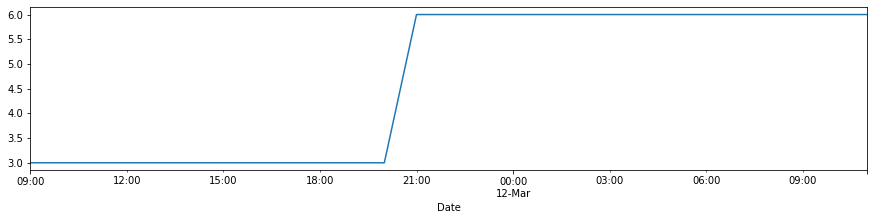

Wisconsin


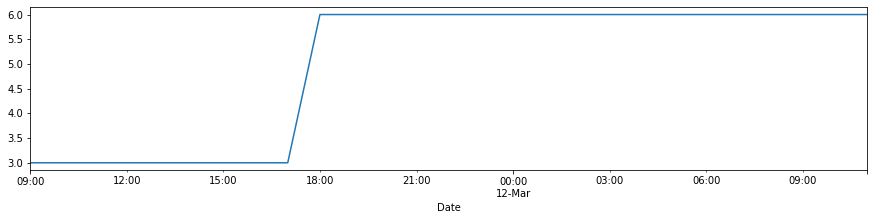

Paraguay


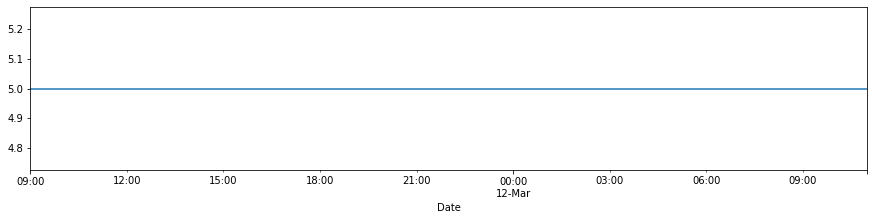

Dominican Republic


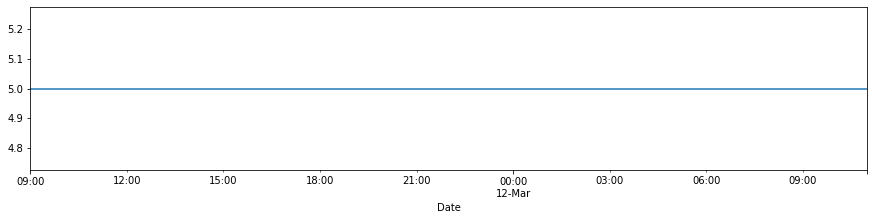

Rep. Dominicana


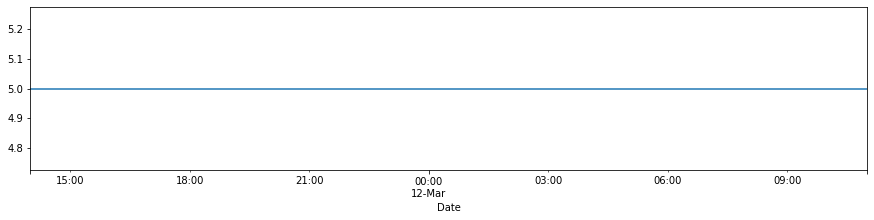

South Dakota


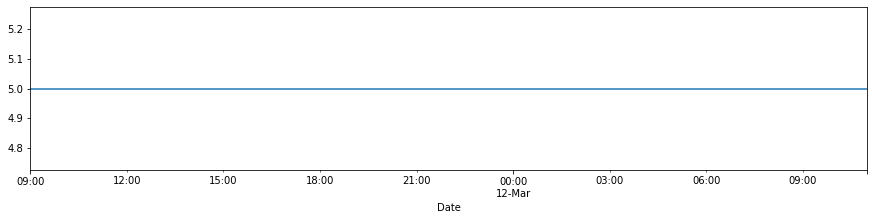

New Zealand


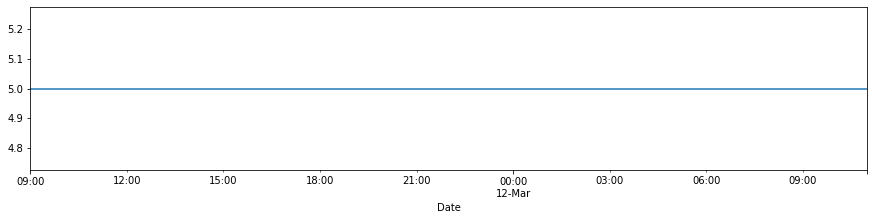

Virginia


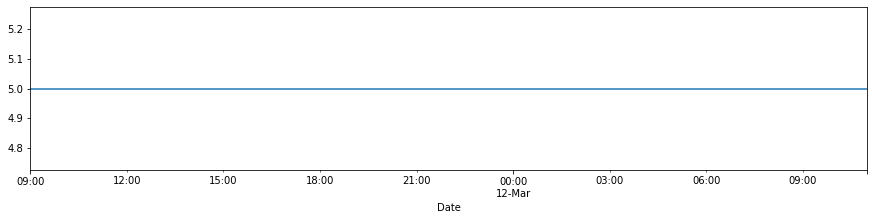

Senegal


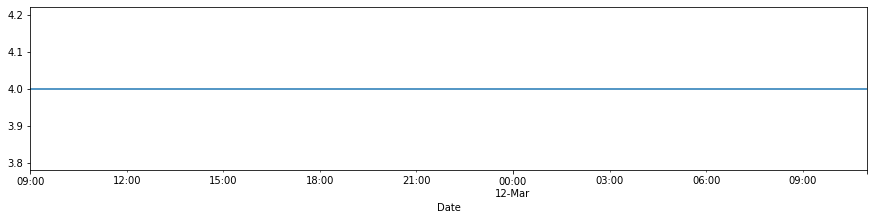

New Hampshire


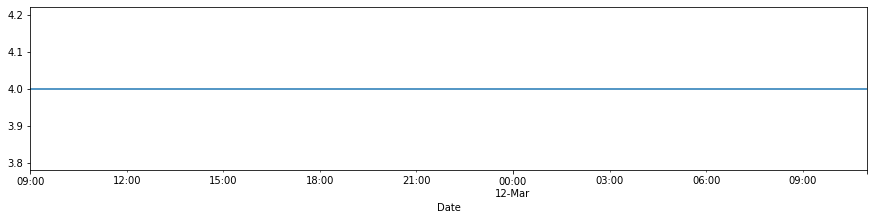

Nevada


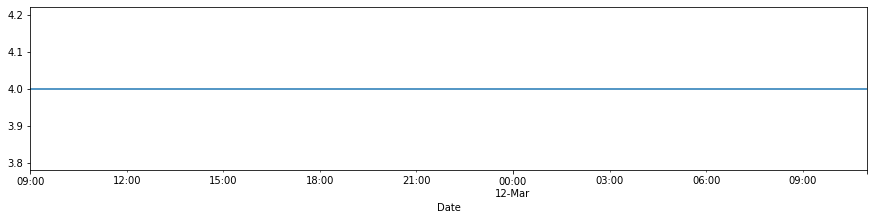

Minnesota


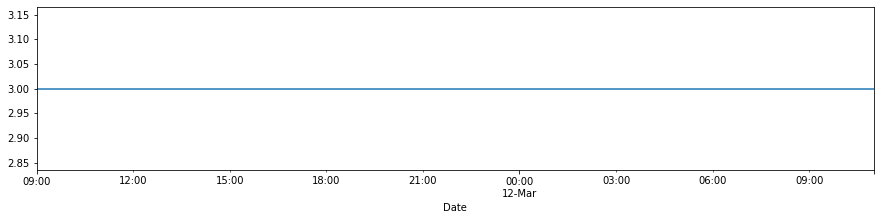

Bangladesh


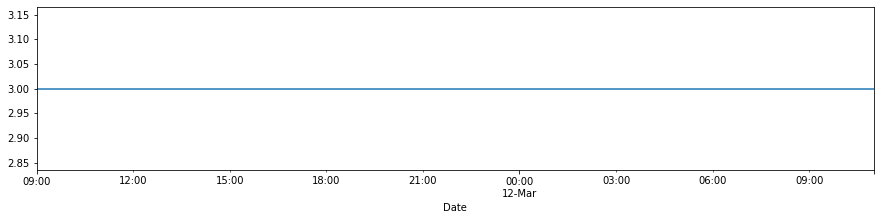

Moldova


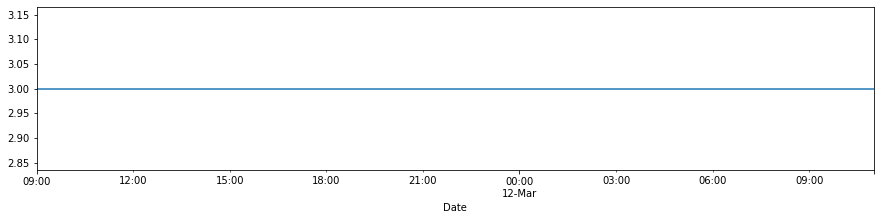

Lithuania


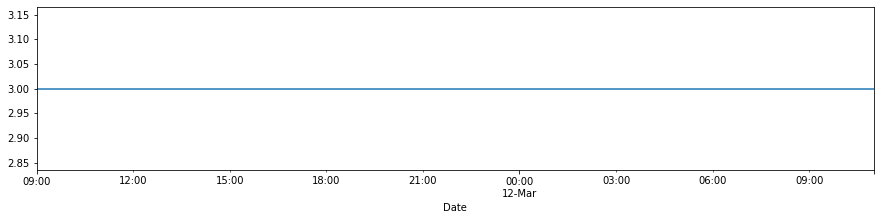

Cambodia


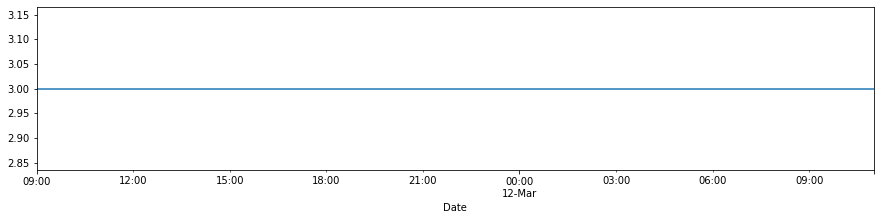

Tennessee


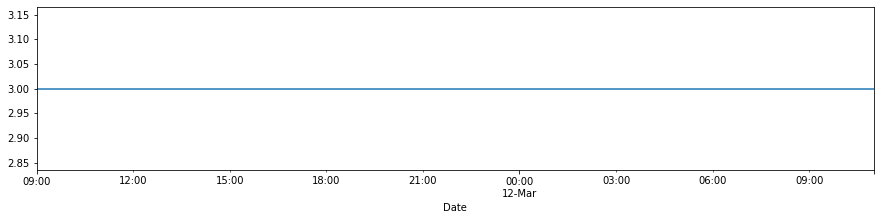

Rhode Island


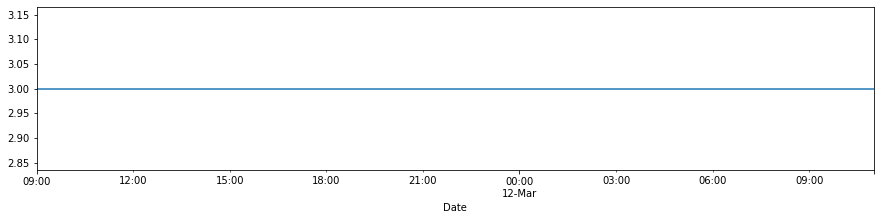

Ohio


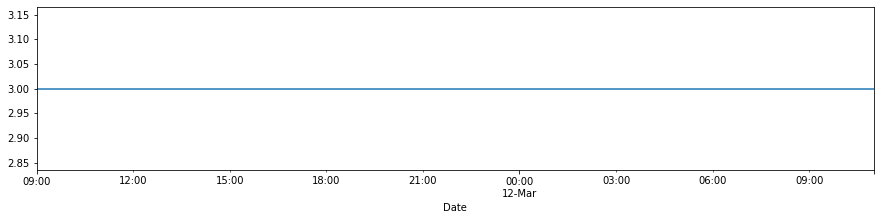

Cuba


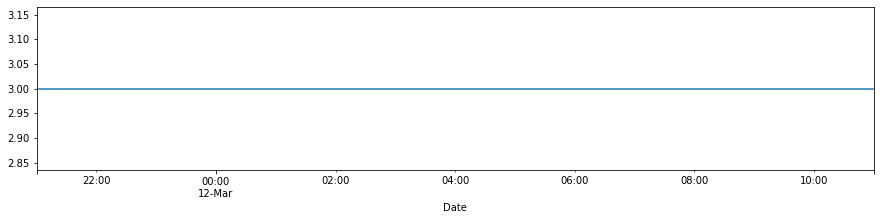

Honduras


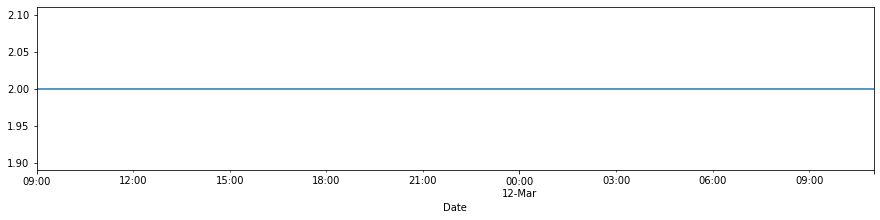

Indiana


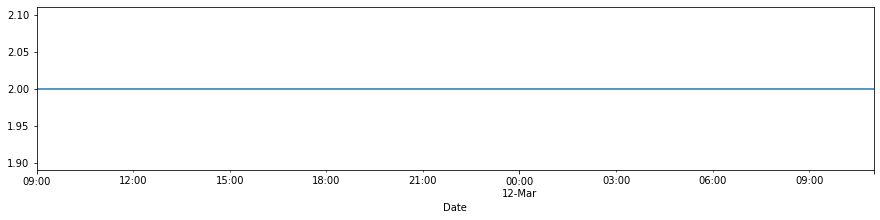

Jamaica


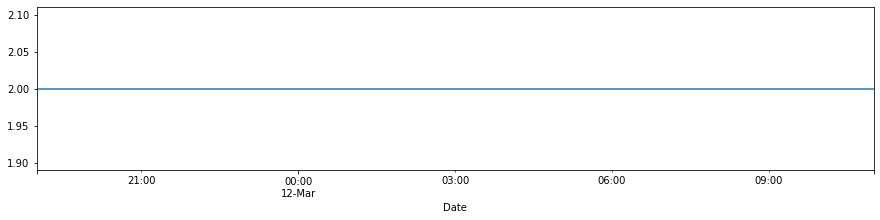

Sri Lanka


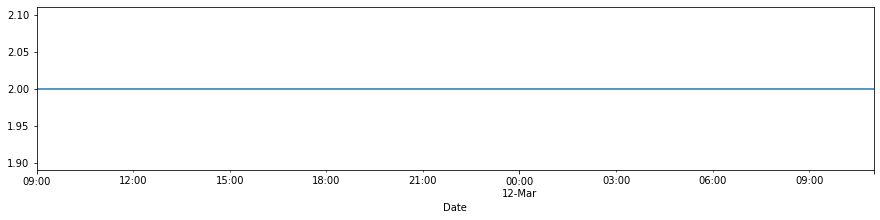

Bolivia


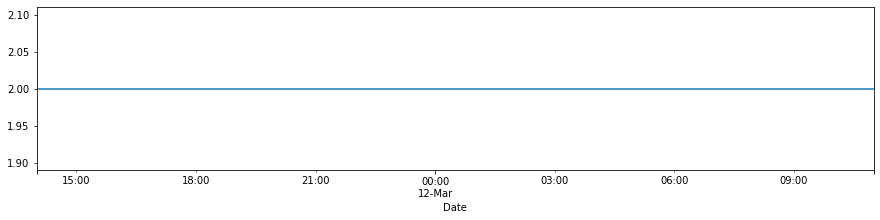

Cameroon


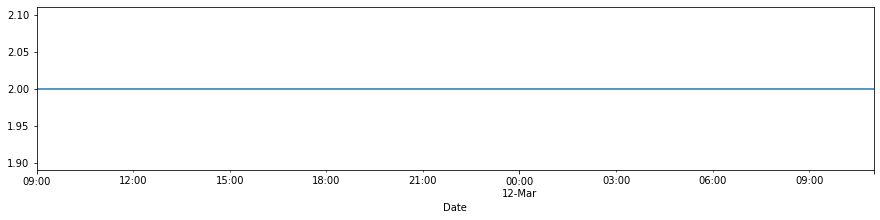

Tasmania


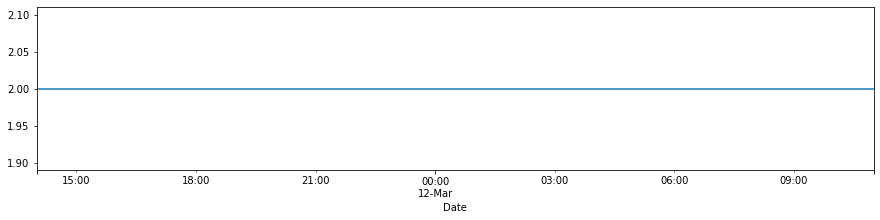

Hawaii


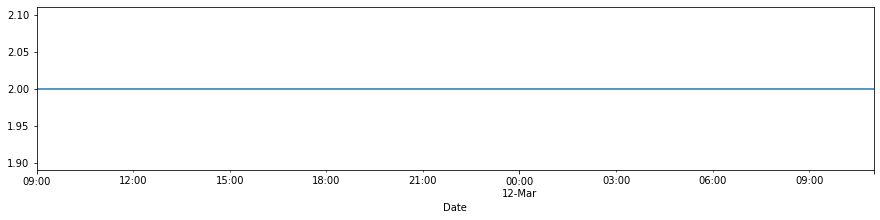

Connecticut


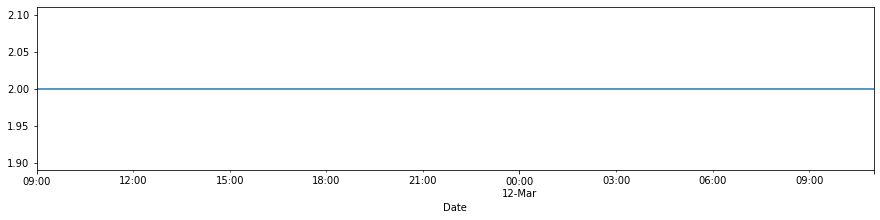

Michigan


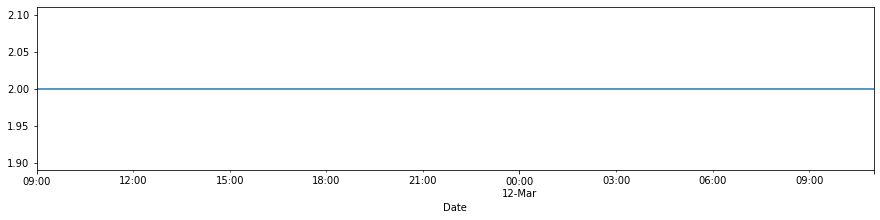

Nigeria


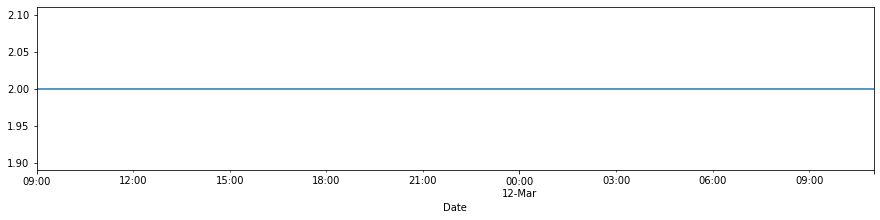

North Carolina


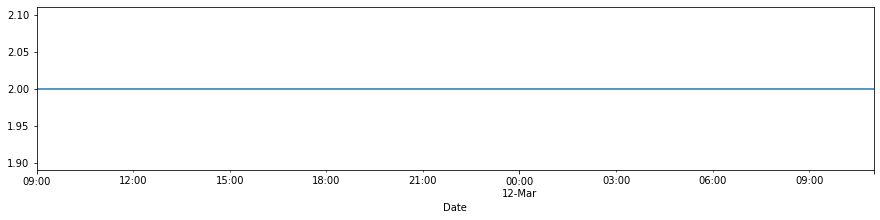

Missouri


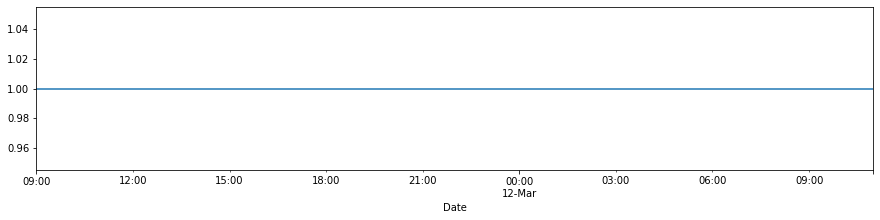

Andorra


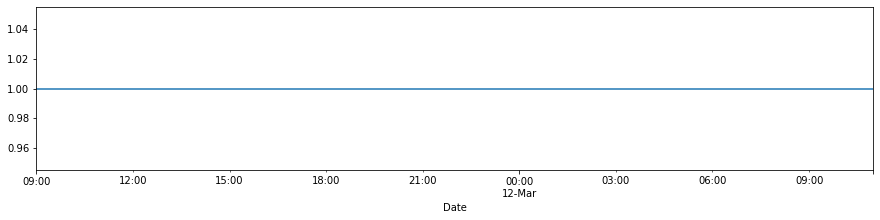

Mississippi


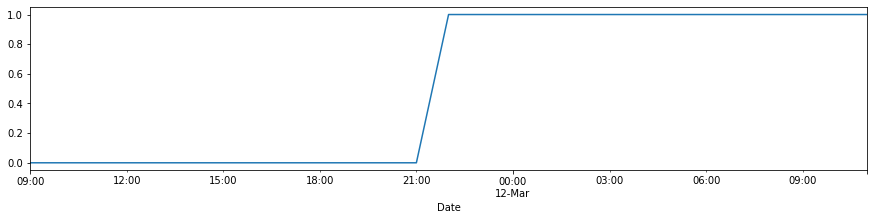

Utah


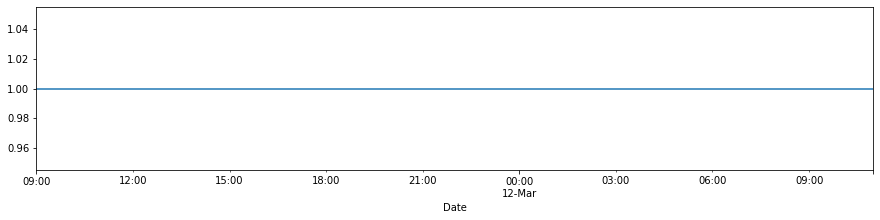

Northern Territory


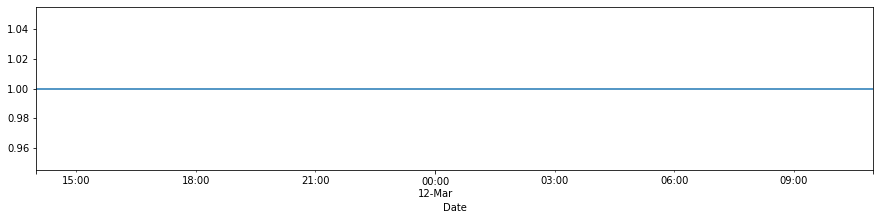

Nebraska


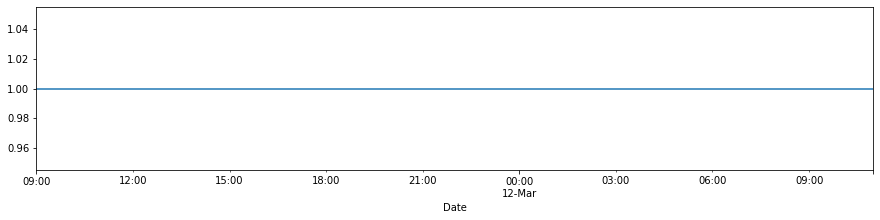

Vermont


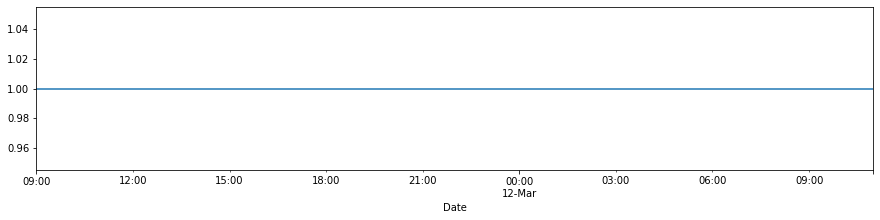

Oklahoma


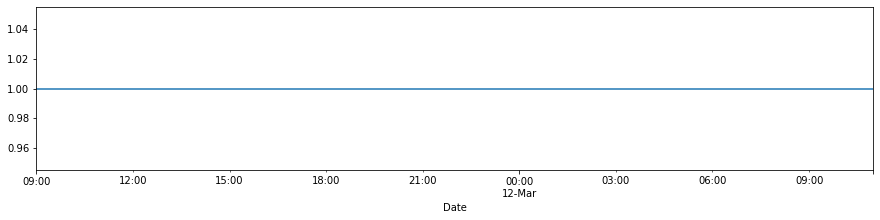

Vatican City


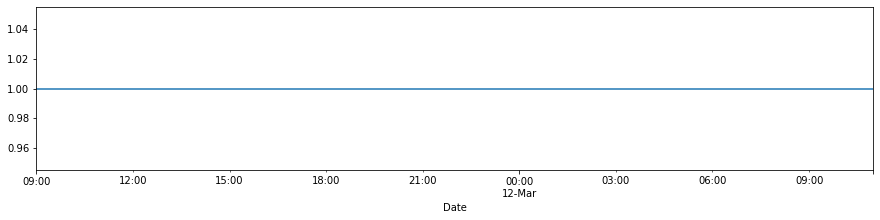

Togo


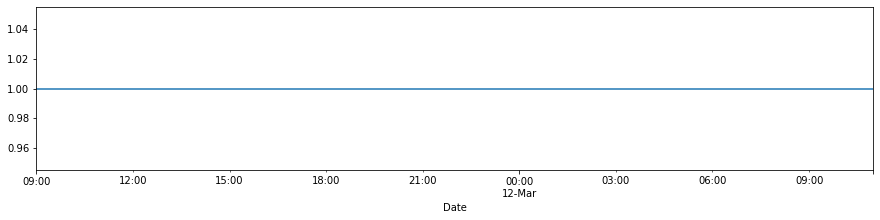

Bhutan


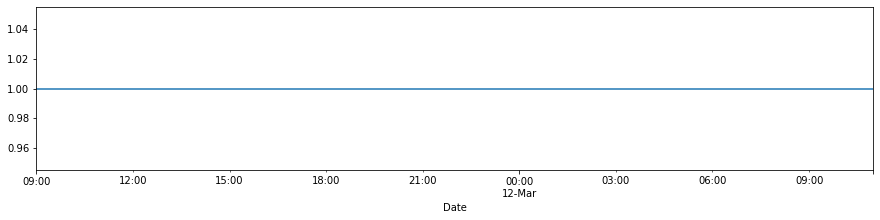

Monaco


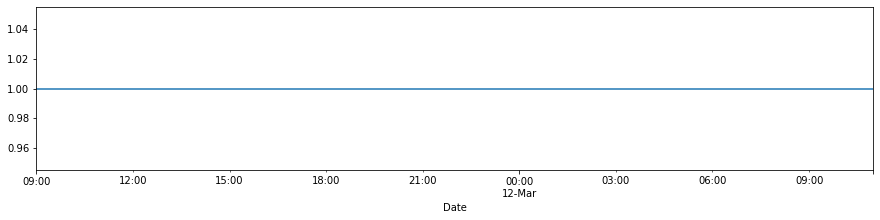

Turkey


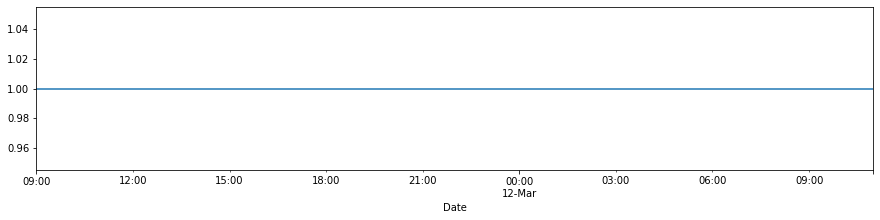

District of Columbia


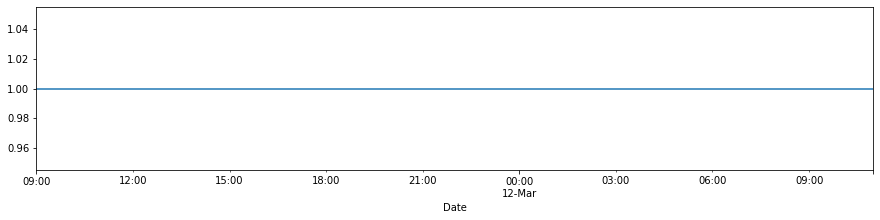

Armenia


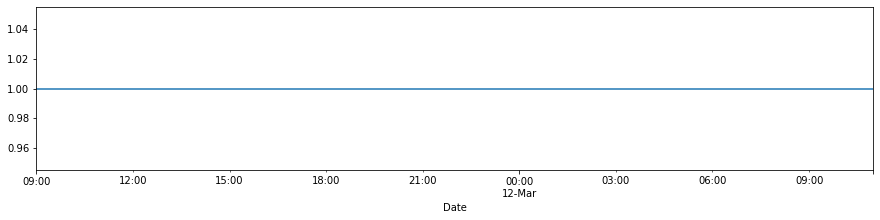

Ukraine


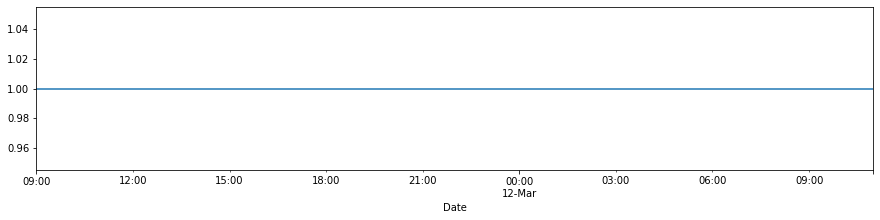

Louisiana


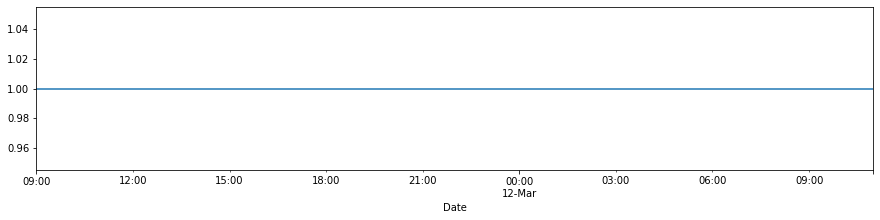

Liechtenstein


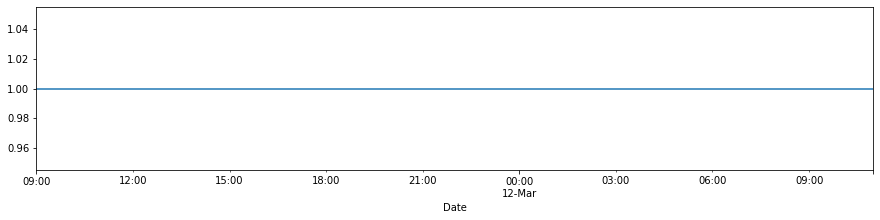

Kansas


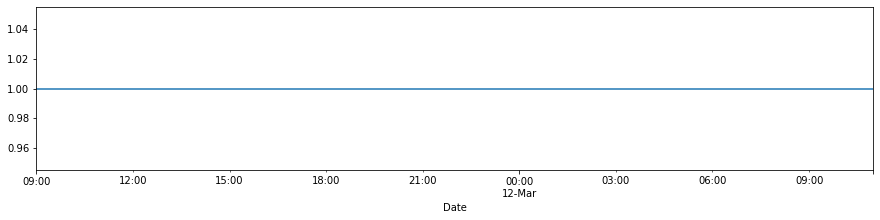

Nepal


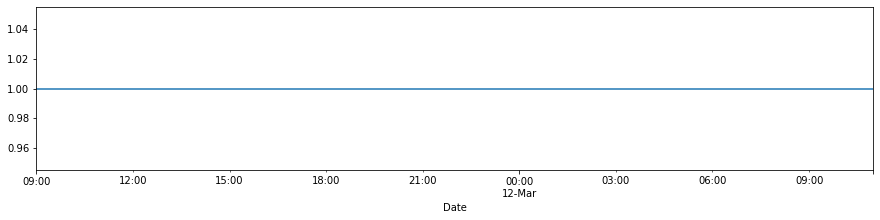

Jordan


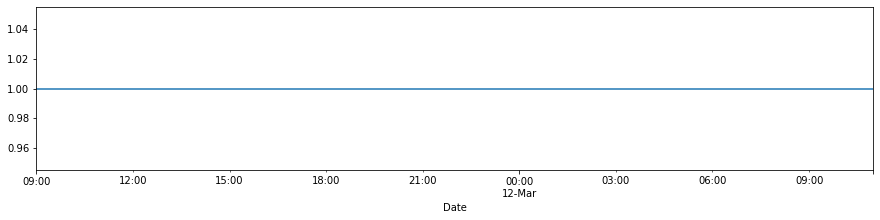

Gibraltar


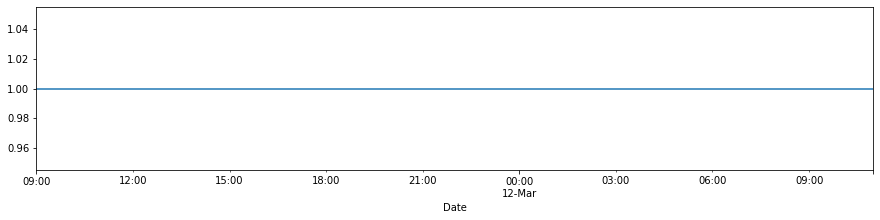

U.S. Virgin Islands


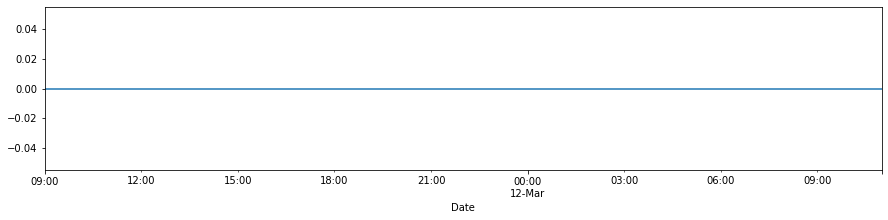

Yukon


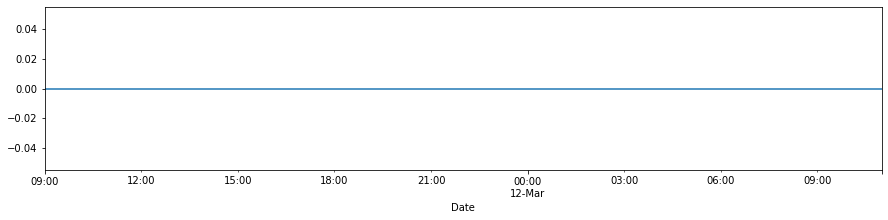

Alabama


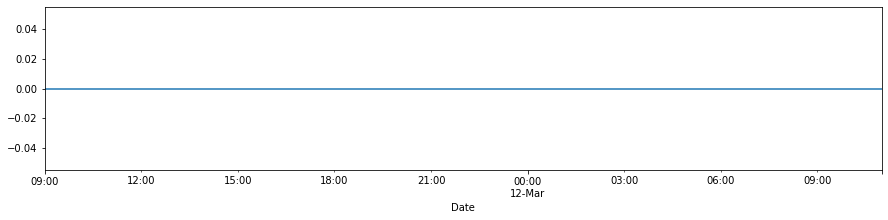

Wyoming


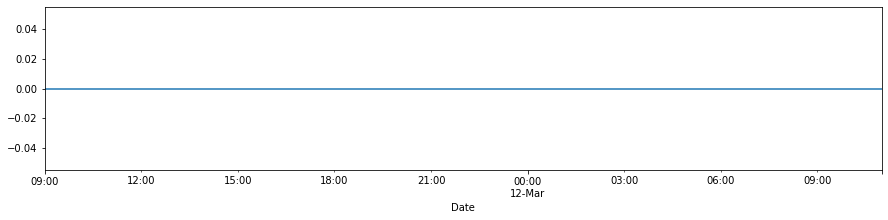

New Mexico


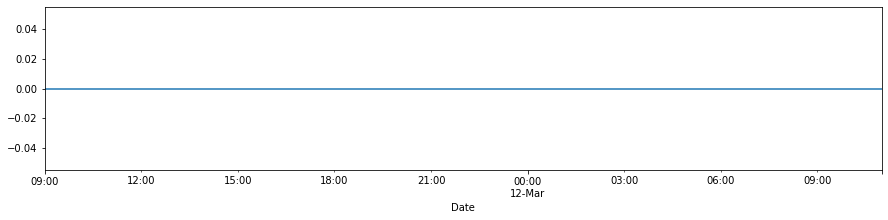

Montana


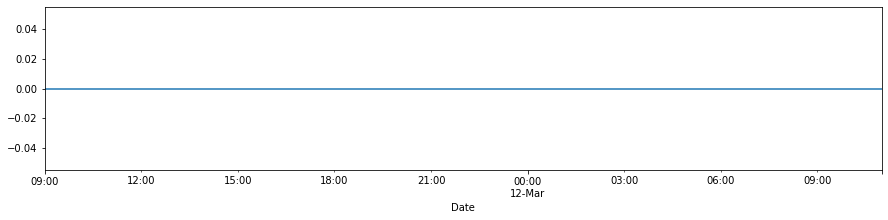

American Samoa


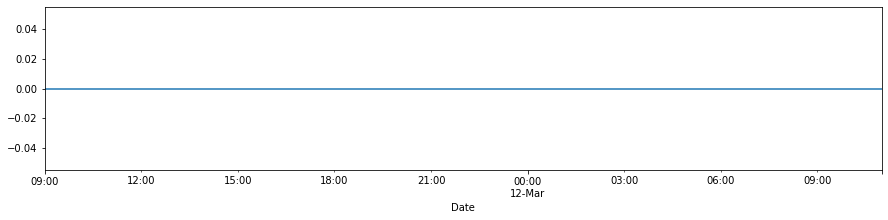

Alaska


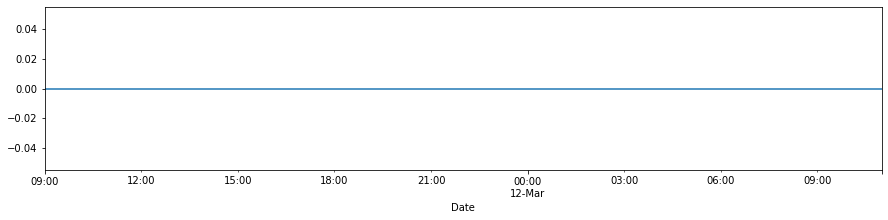

New Brunswick


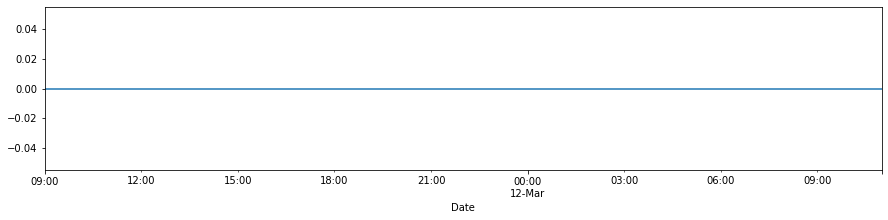

West Virginia


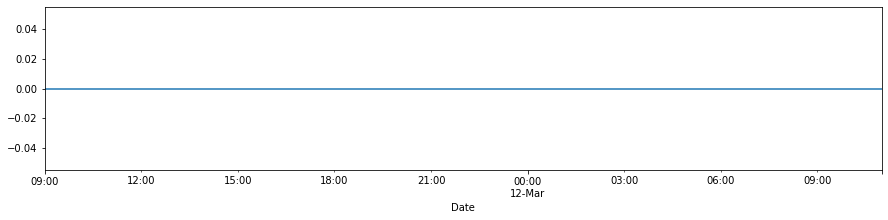

Arkansas


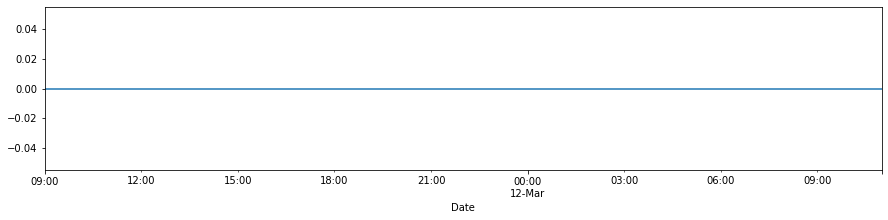

Prince Edward Island


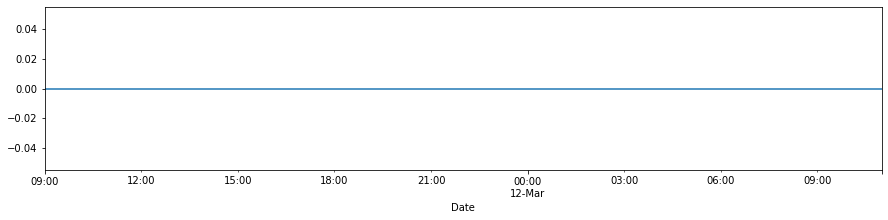

Maine


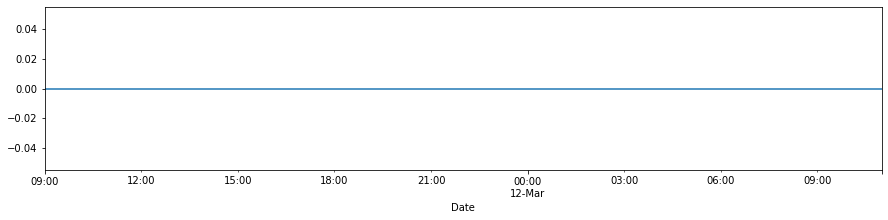

Manitoba


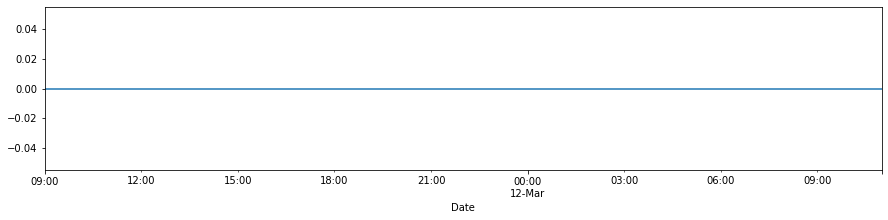

Guam


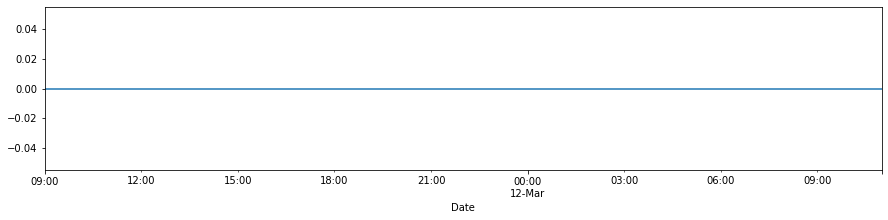

Saskatchewan


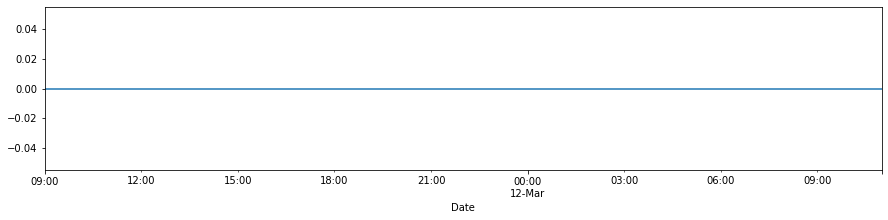

External territories


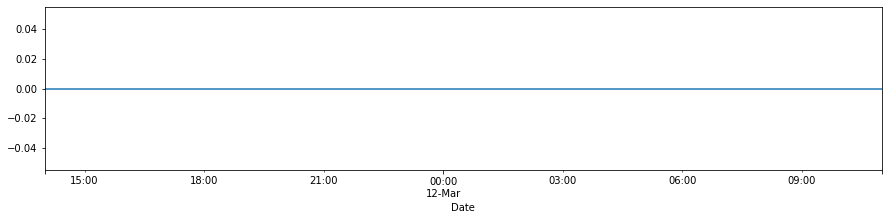

Delaware


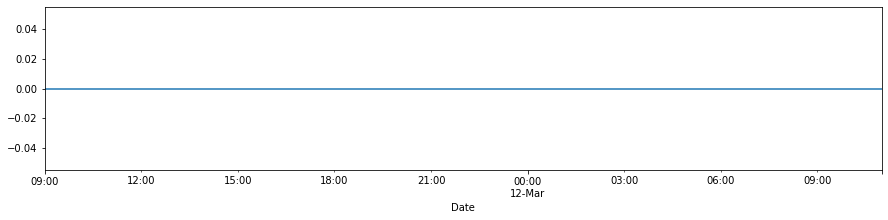

Jervis Bay Territory


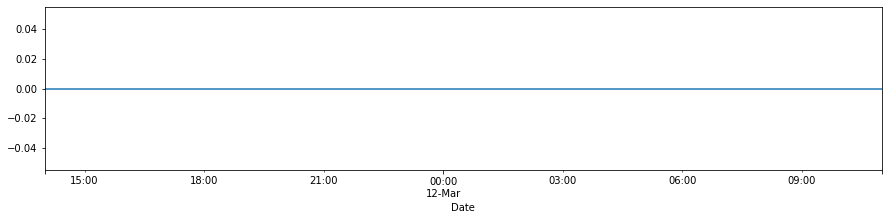

Puerto Rico


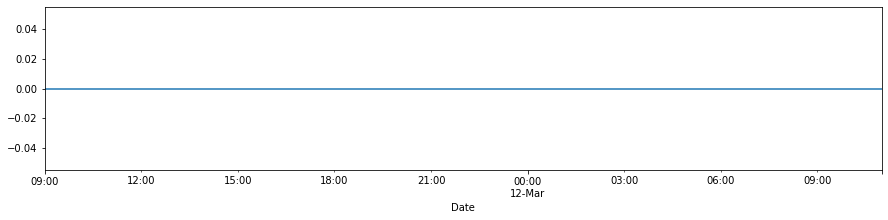

Idaho


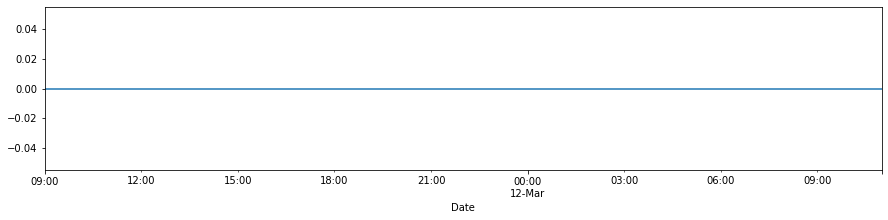

North Dakota


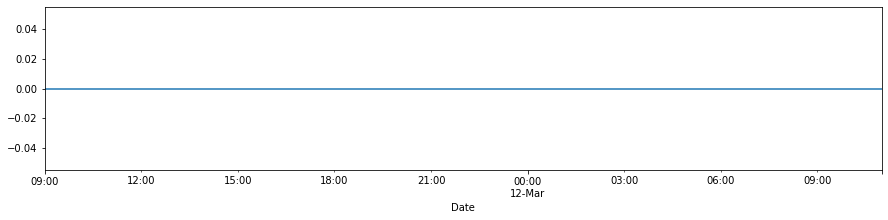

Northern Mariana Islands


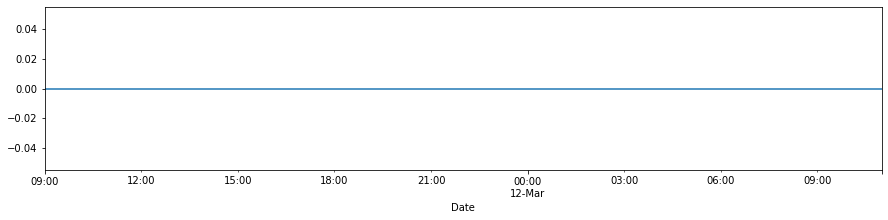

Northwest Territories


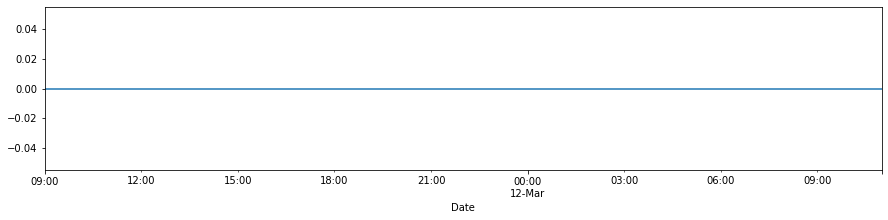

Newfoundland & Labrador


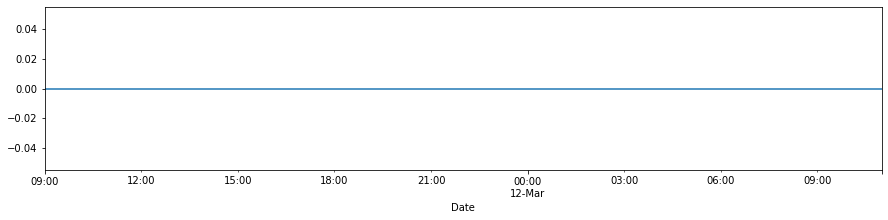

Nunavut


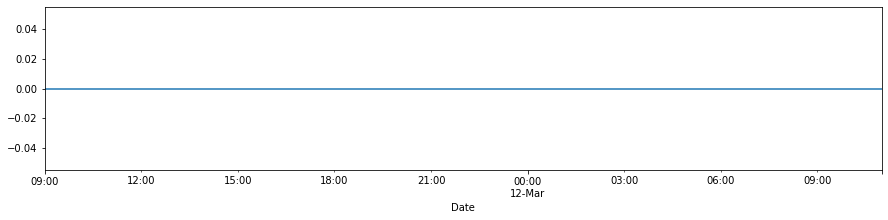

Nova Scotia


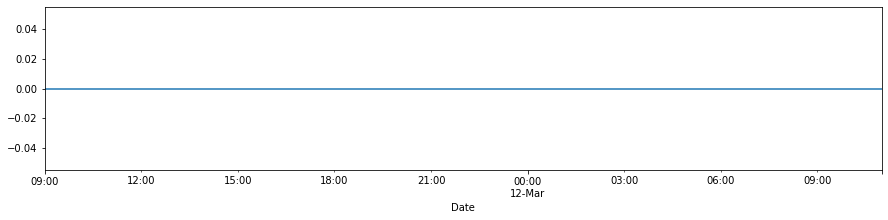

Canberra (ACT)


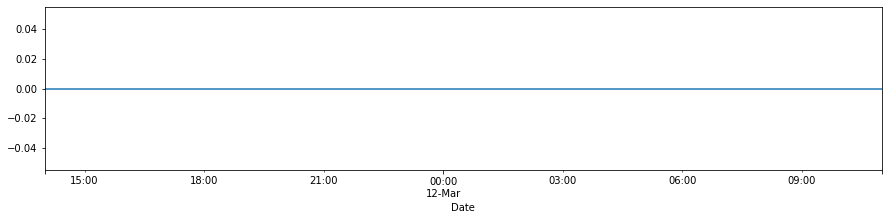

In [256]:
#
for region in df.sort_values('Confirmed', ascending=False)['Region'].unique():
    plt.figure(figsize=(15,3))
    print(region)
    display(df[df.Region == region].Confirmed.plot() ) ;
    plt.show();

Below represents regional percentage upticks in reported Confirmed infection rates since the previous period.  Presuming accurate data ( a bad assumption) we can surmise an accelerating infection rate from charts showing more frequent and severe spikes.

Mainland China


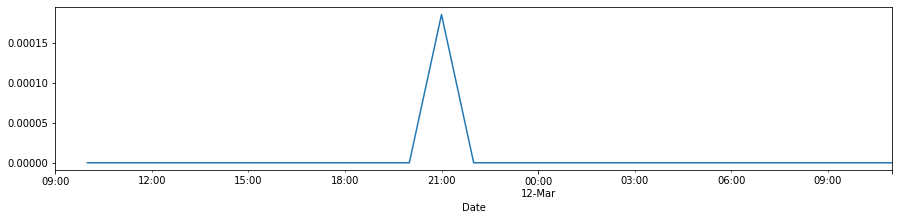

Hubei province (includes Wuhan)


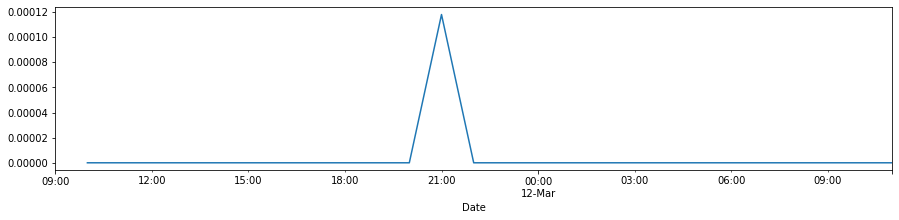

Italy


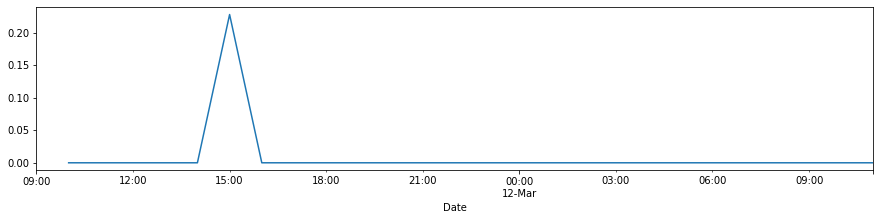

Iran


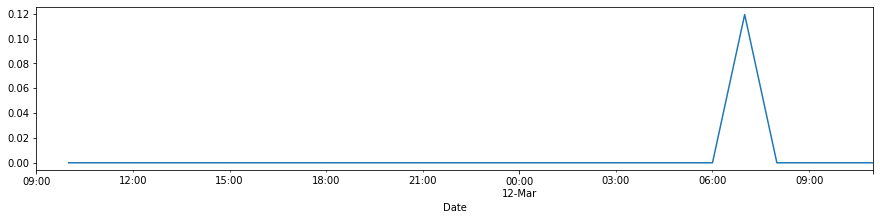

South Korea


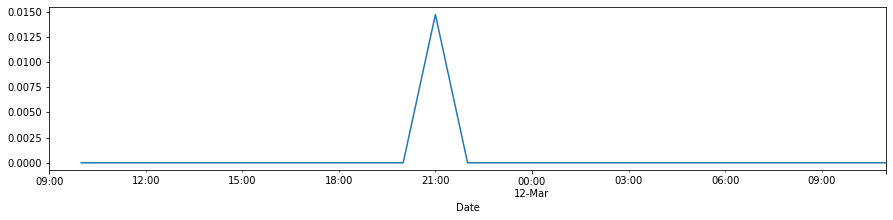

Other regions


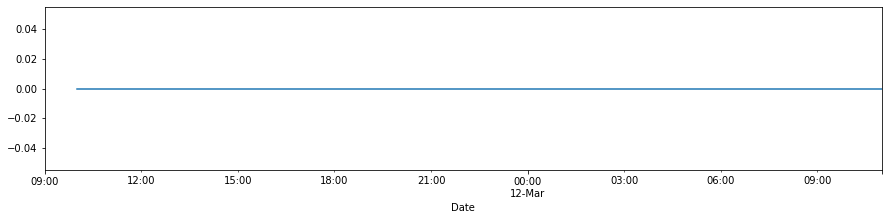

France


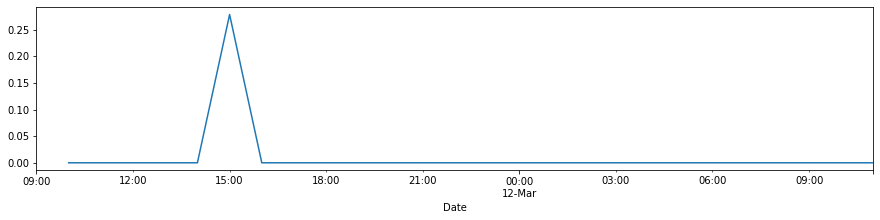

Spain


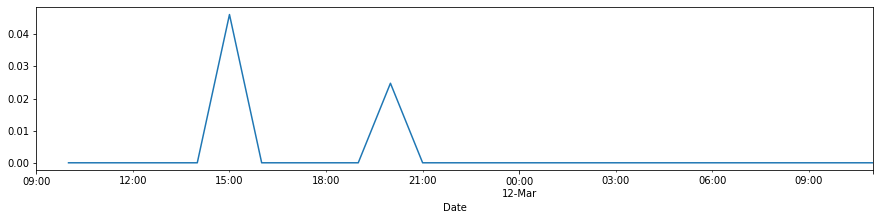

Germany


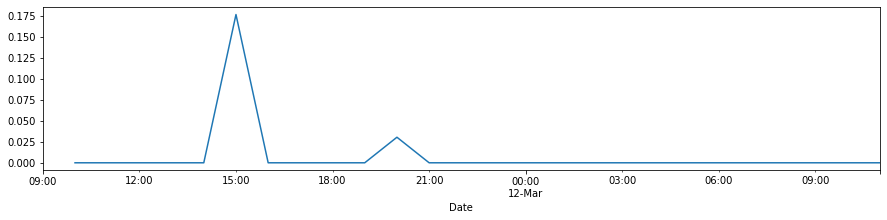

España


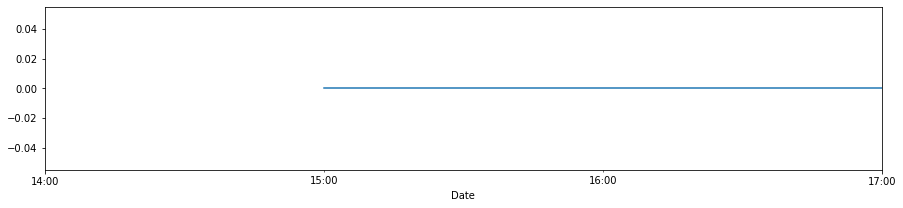

Guangdong province


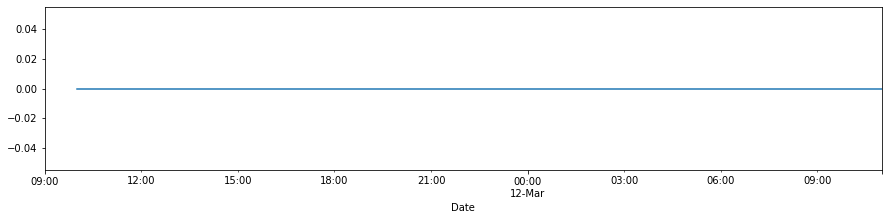

United States


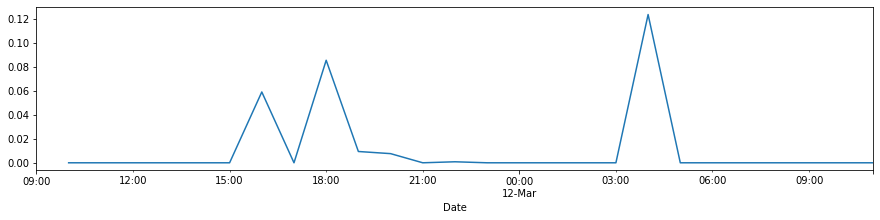

Henan province


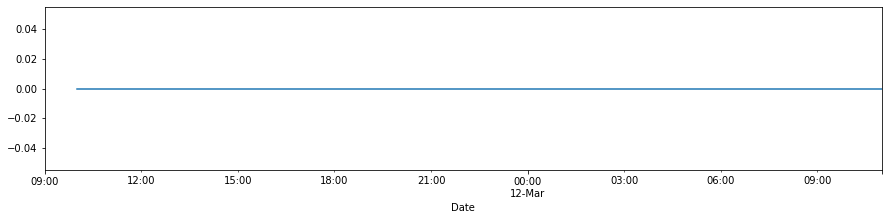

Zhejiang province


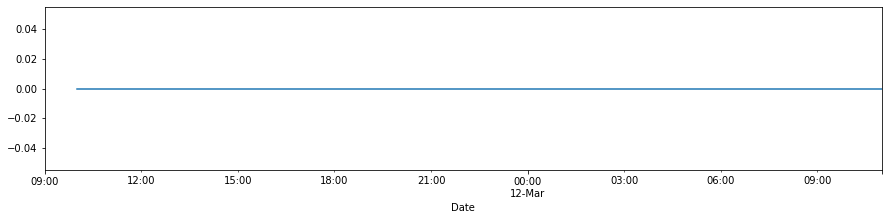

Hunan province


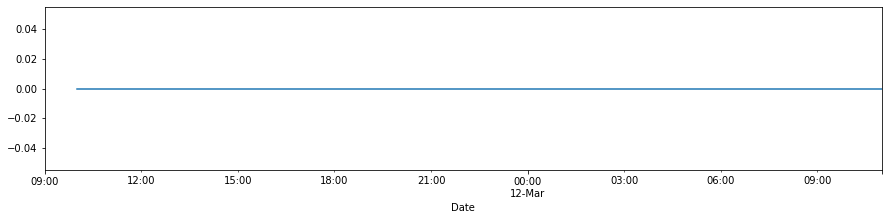

Switzerland


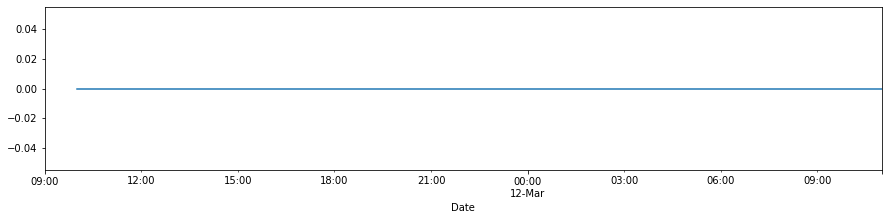

Japan


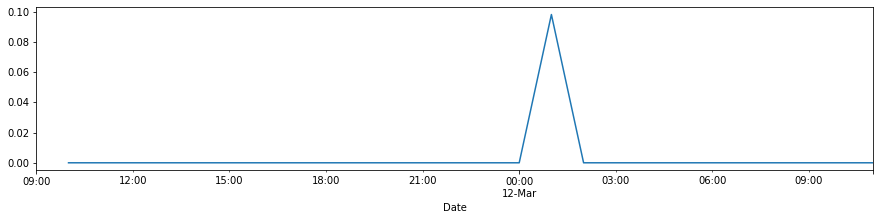

Norway


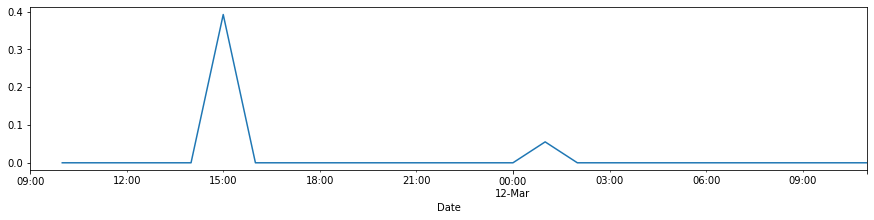

Denmark*


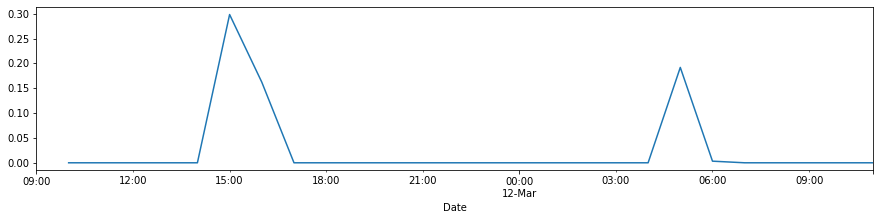

Netherlands


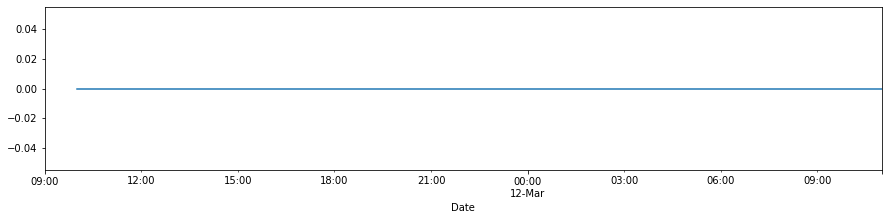

Sweden


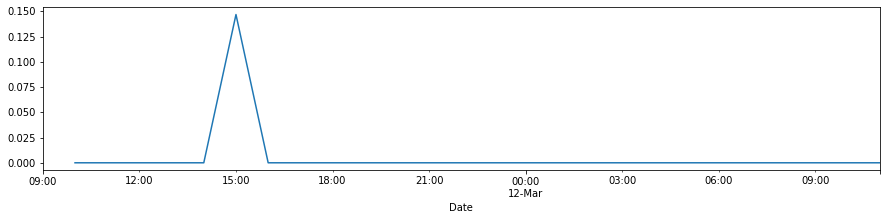

United Kingdom


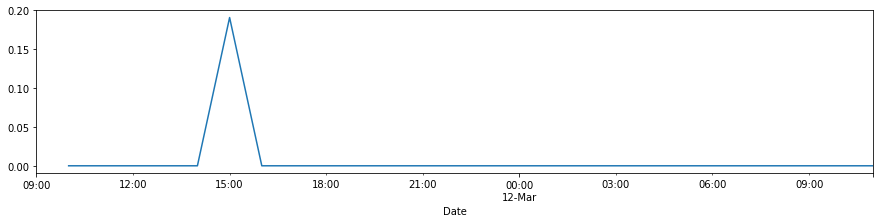

Beijing


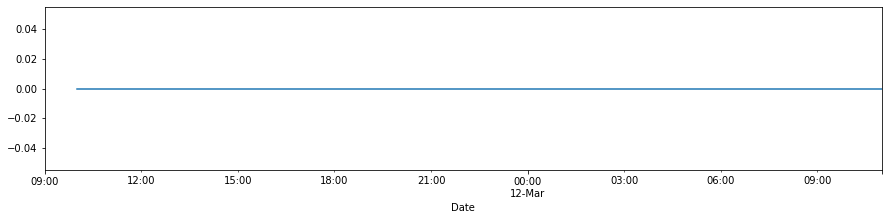

Washington


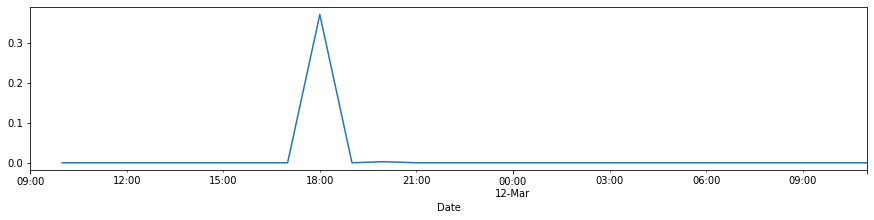

Shanghai


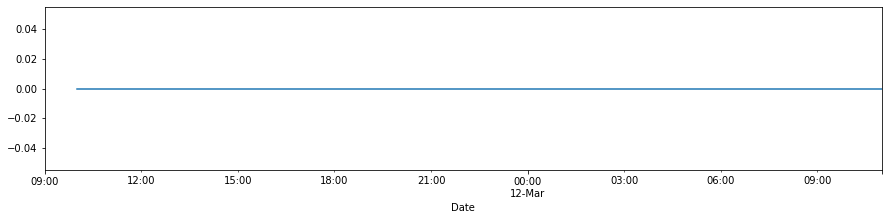

Belgium


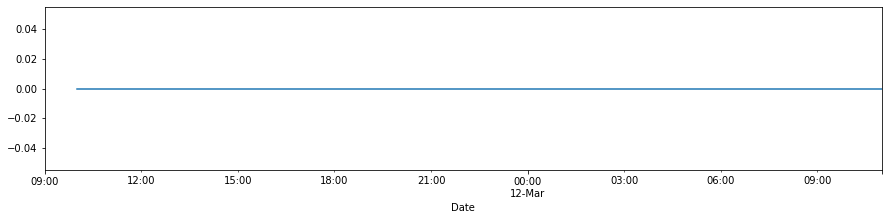

Austria


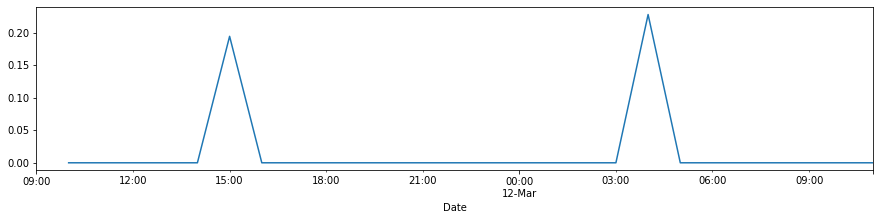

Qatar


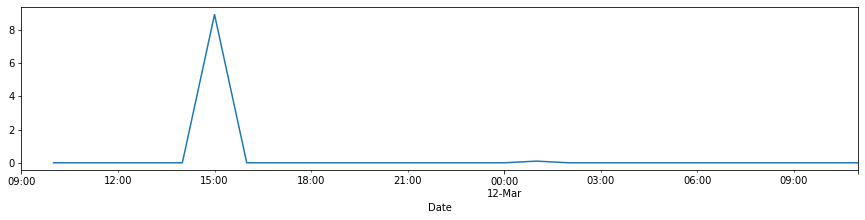

New York


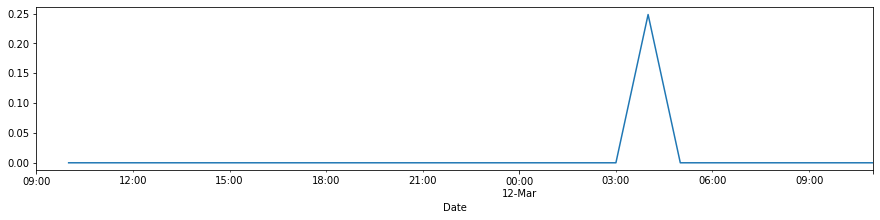

Bahrain


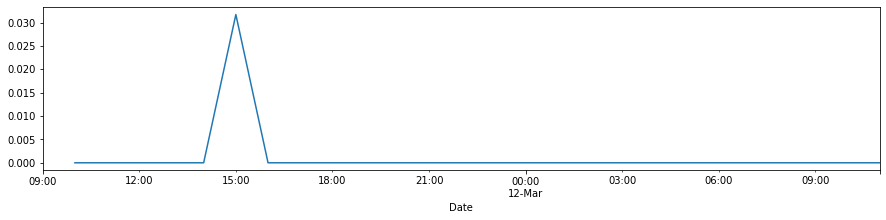

Singapore


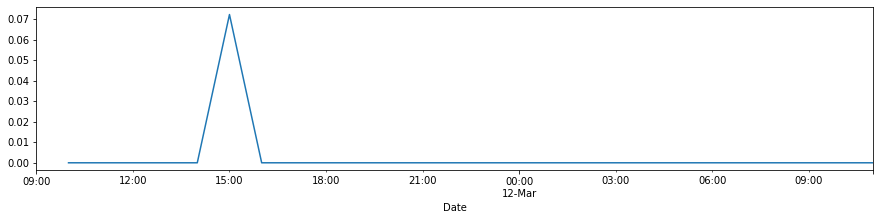

Australia


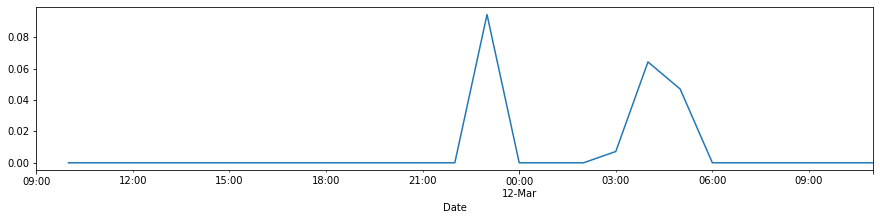

Malaysia


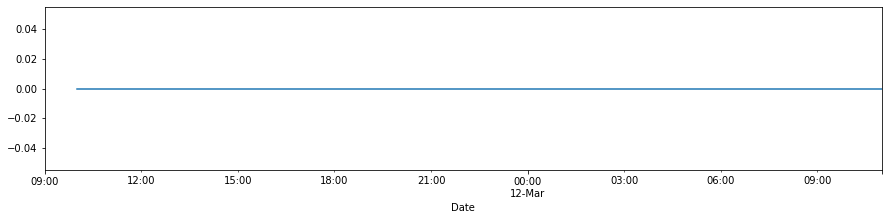

Hong Kong


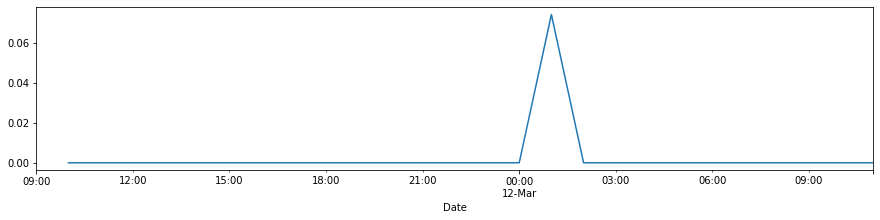

Canada


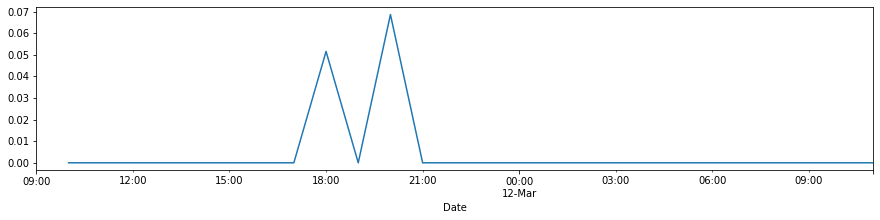

California


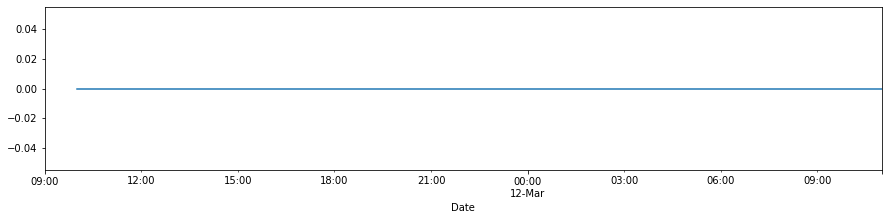

TBD


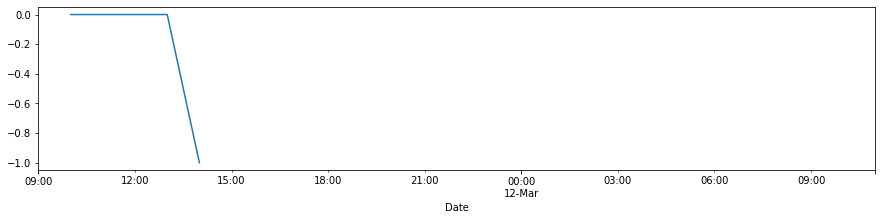

Israel


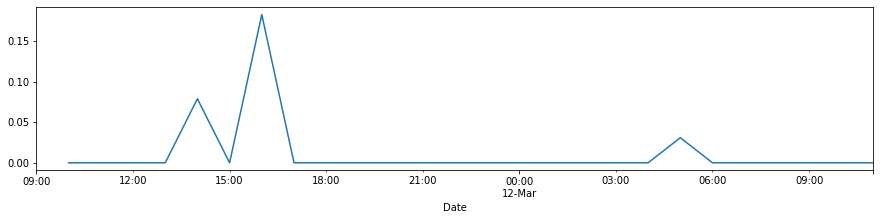

Greece


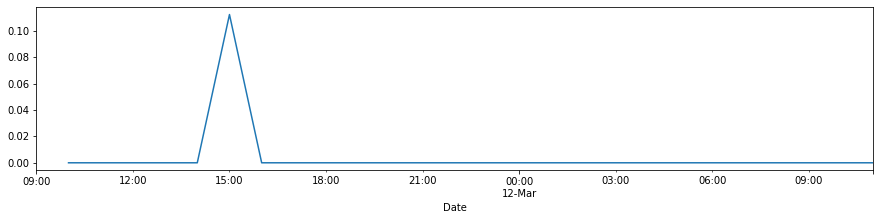

Czech Republic


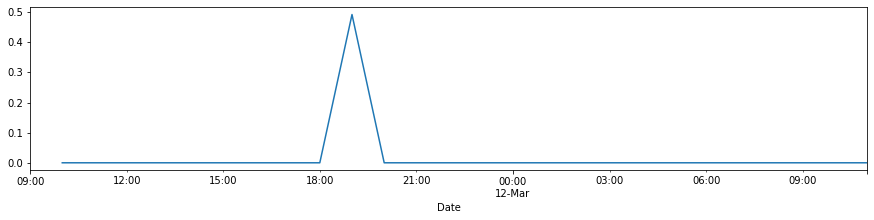

Massachusetts


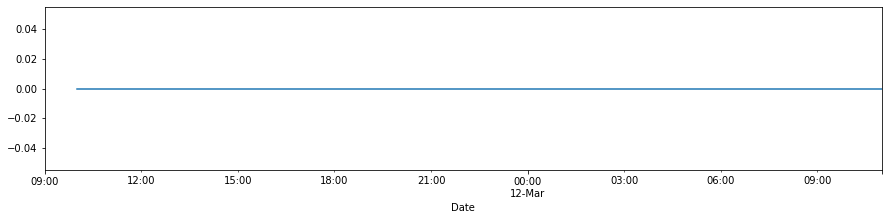

Iceland


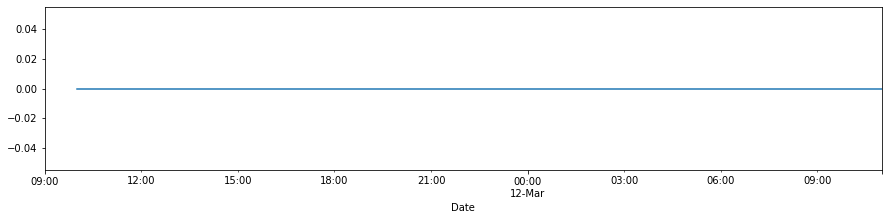

Kuwait


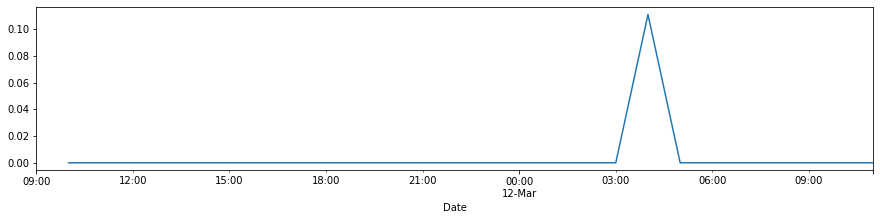

New South Wales


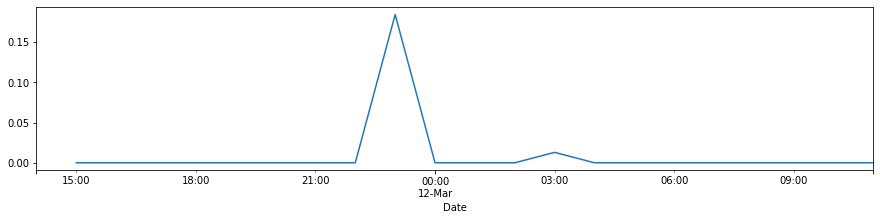

UAE


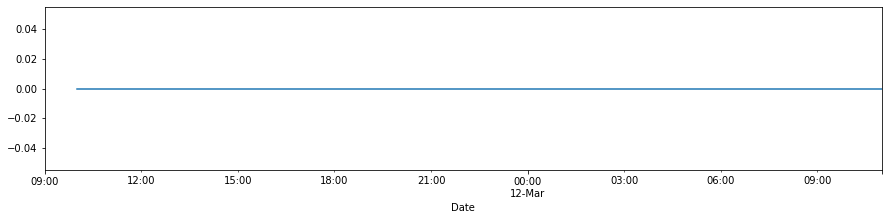

India


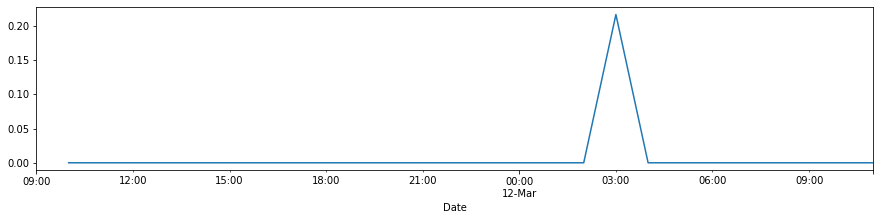

Iraq


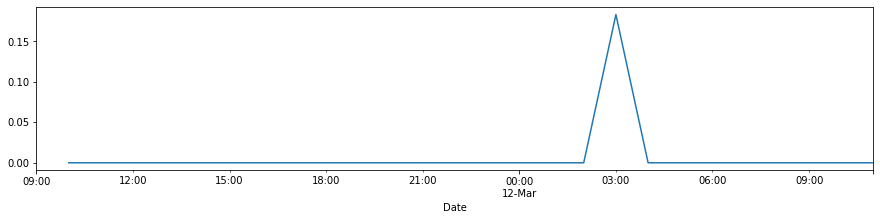

Thailand


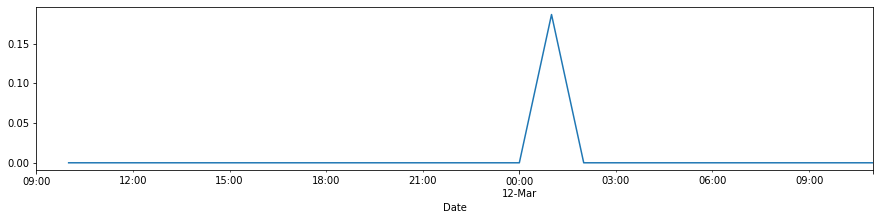

Brasil


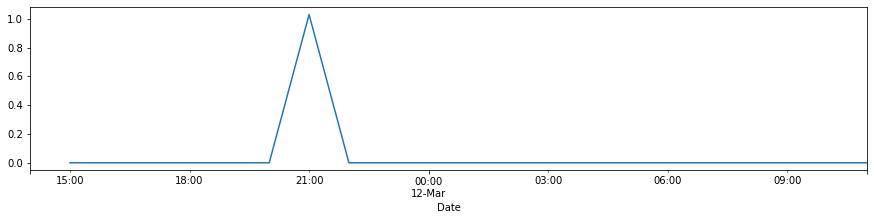

Egypt


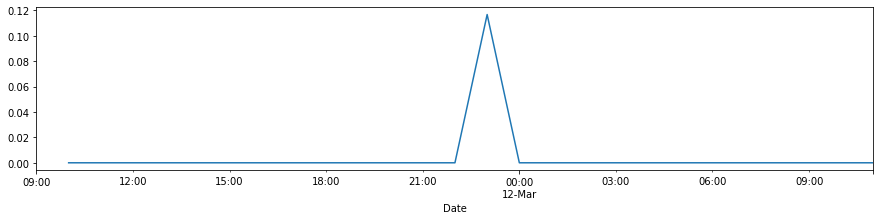

San Marino


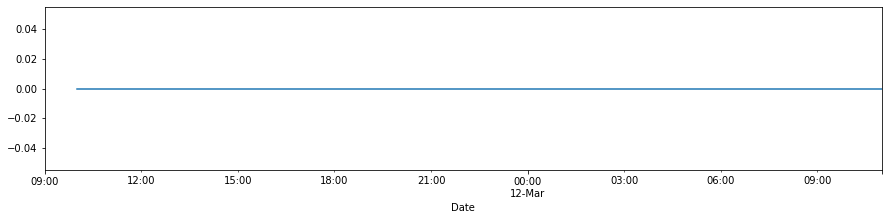

Lebanon


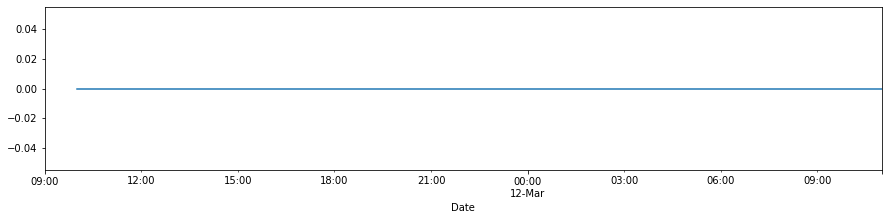

Finland


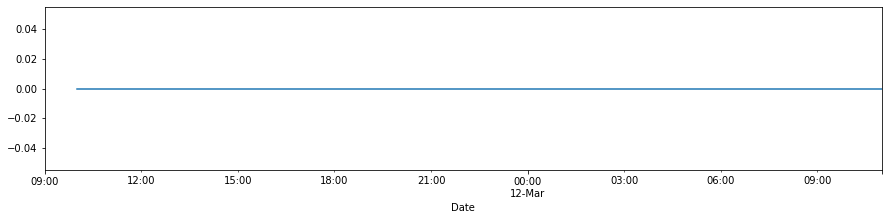

Portugal


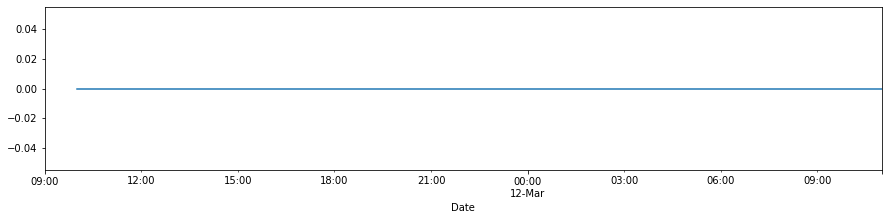

Slovenia


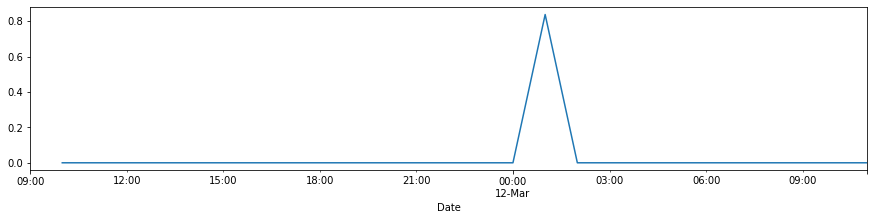

Brazil


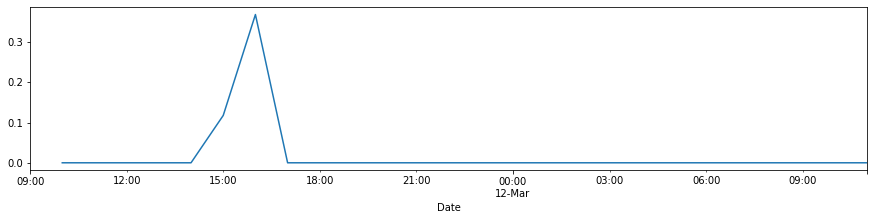

Philippines


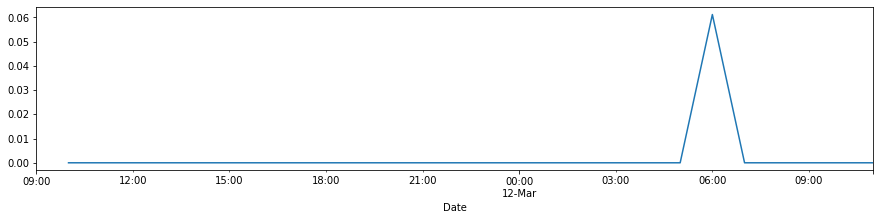

Taiwan


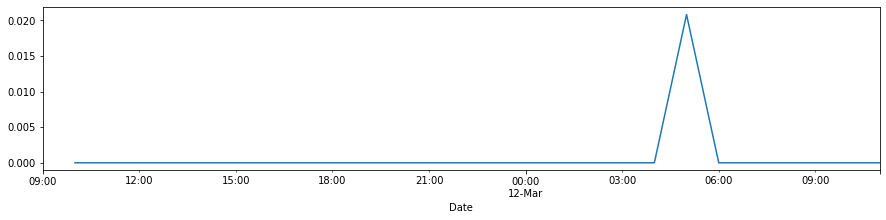

Romania


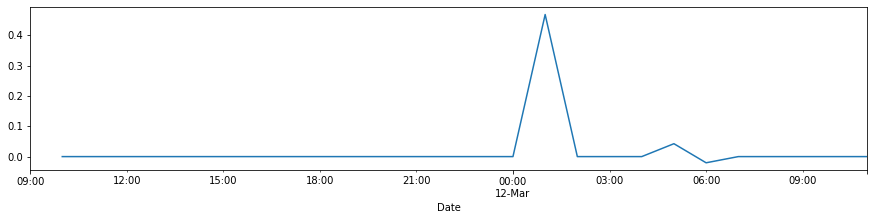

Poland


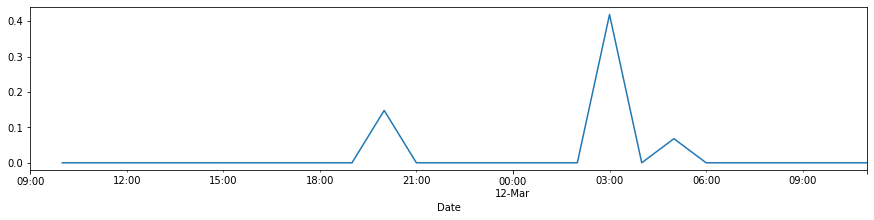

British Columbia


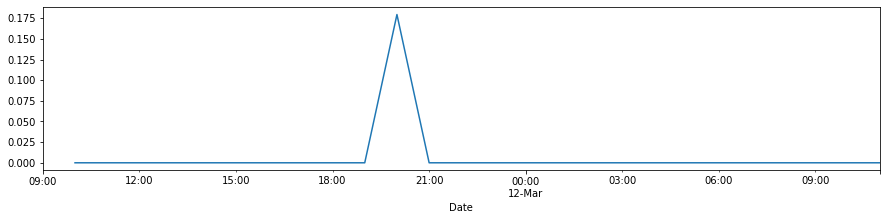

Saudi Arabia


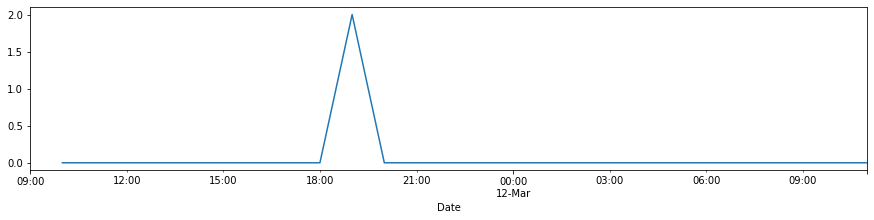

Diamond Princess


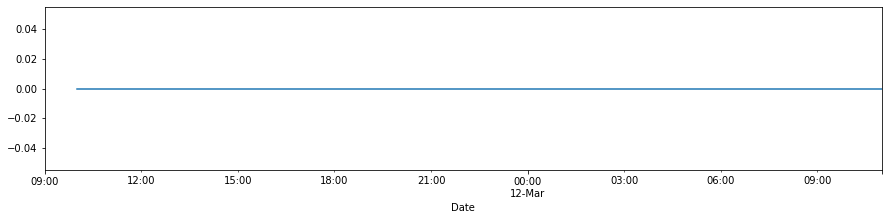

Ireland


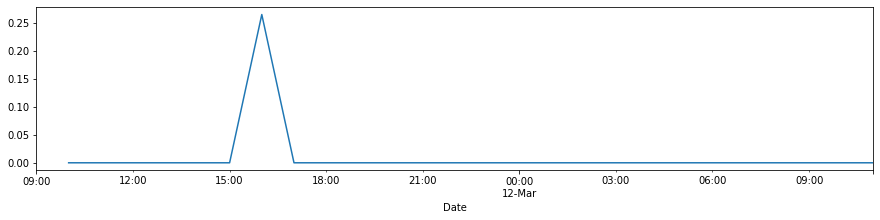

Vietnam


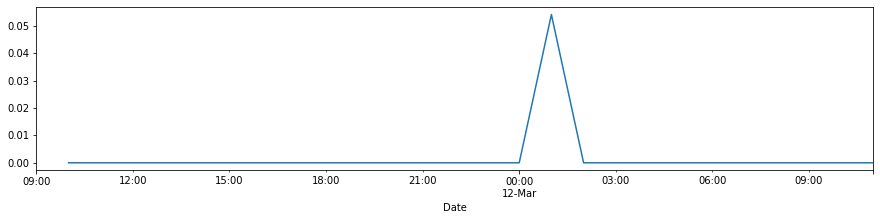

Ontario


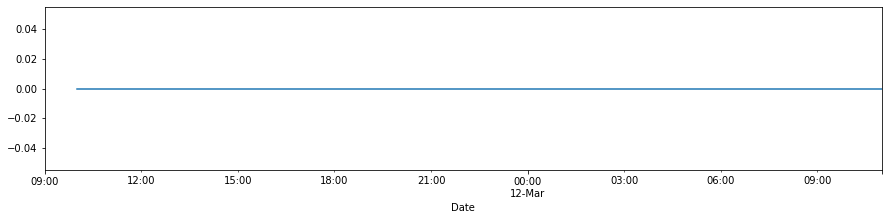

Indonesia


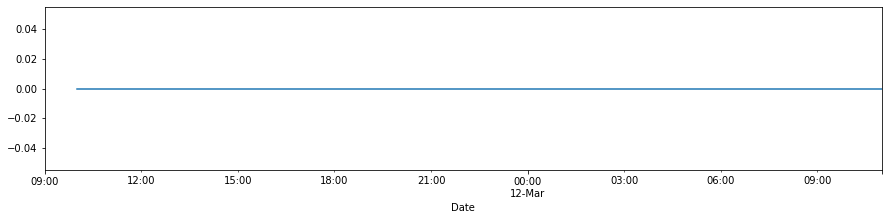

Palestine


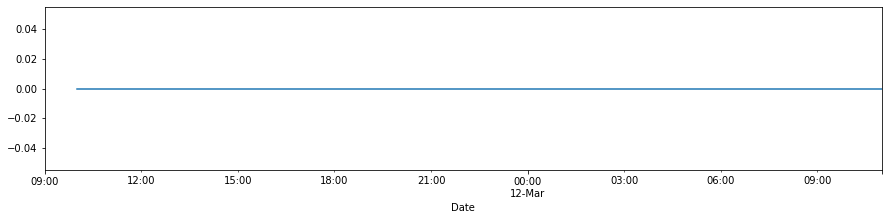

Russia


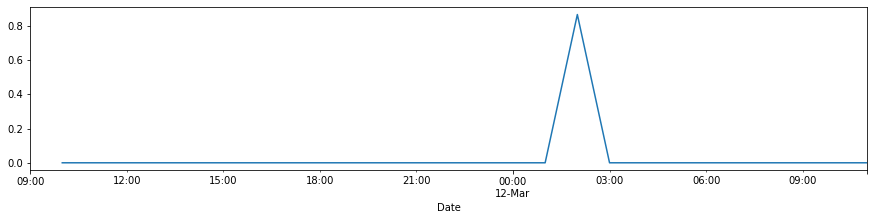

Queensland


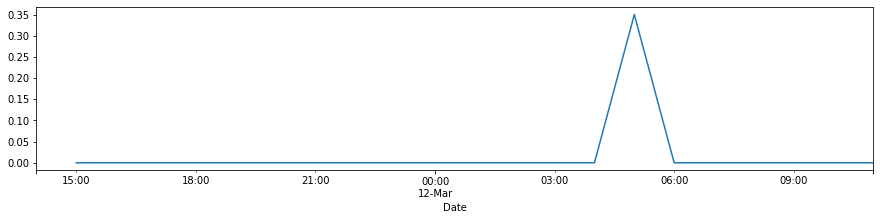

Victoria


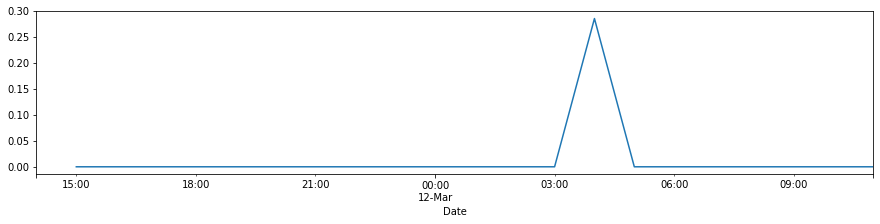

Undisclosed


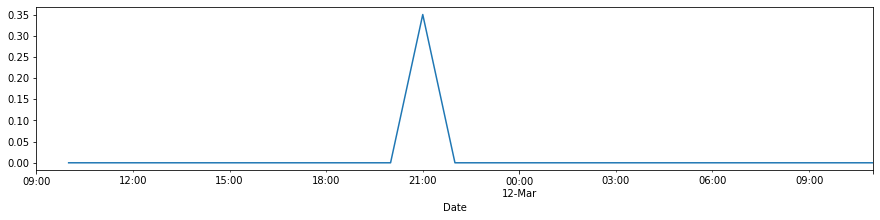

Algeria


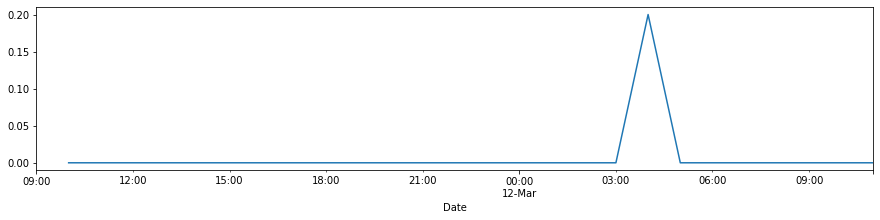

New Jersey


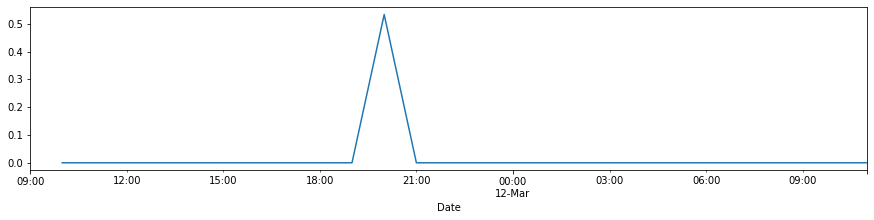

Chile


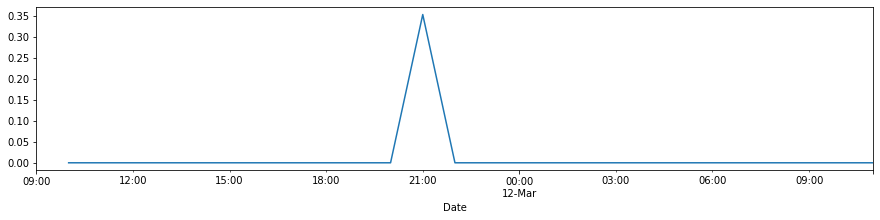

Georgia


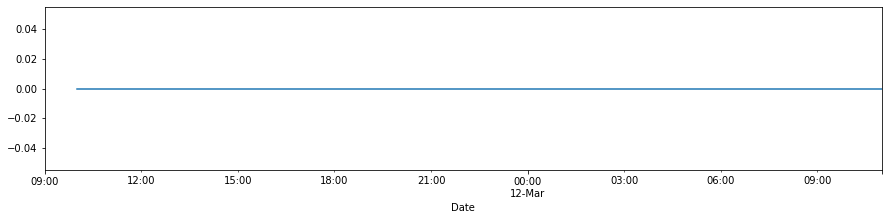

Costa Rica


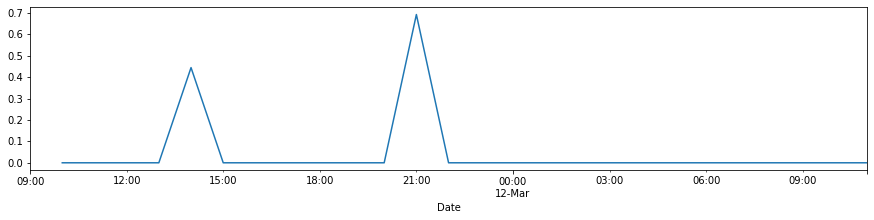

Argentina


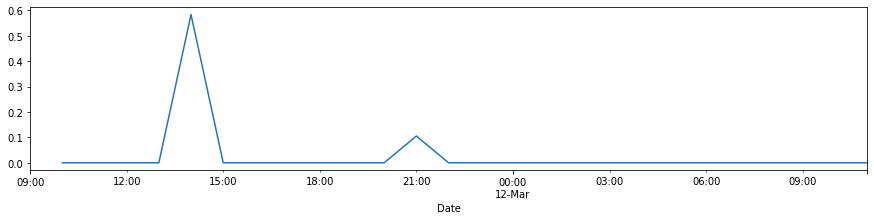

Florida


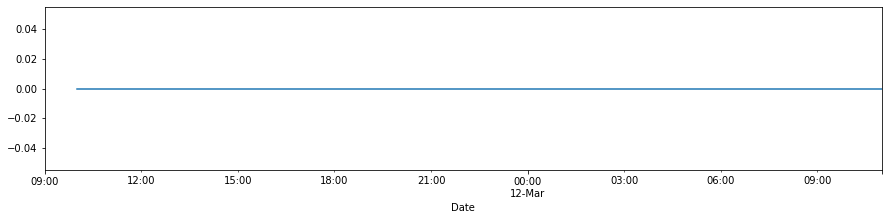

Grand Princess


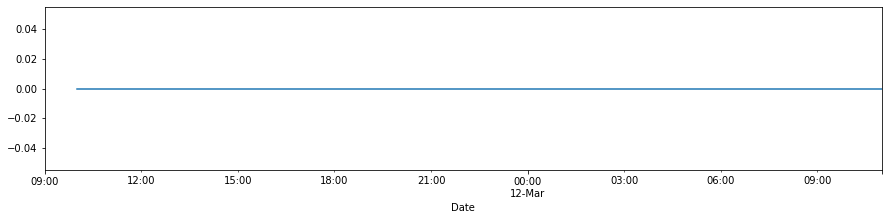

Serbia


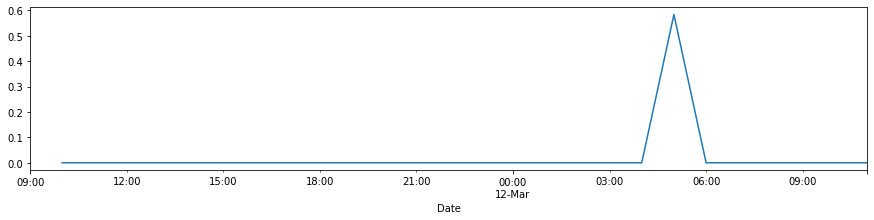

Pakistan


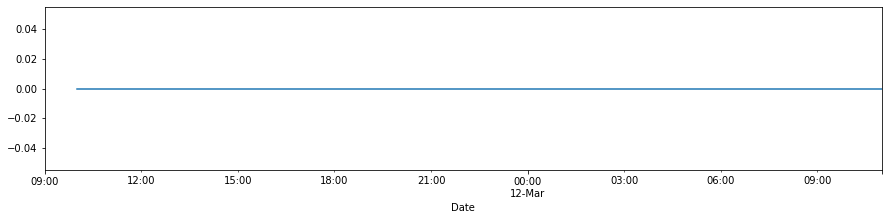

Alberta


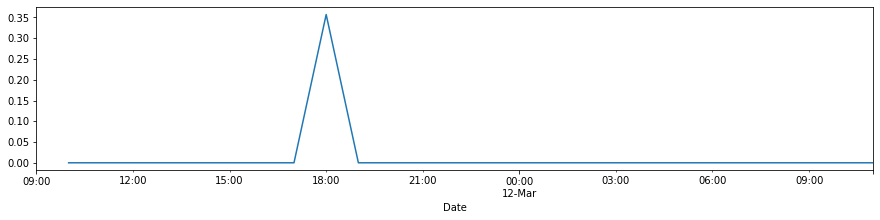

Croatia


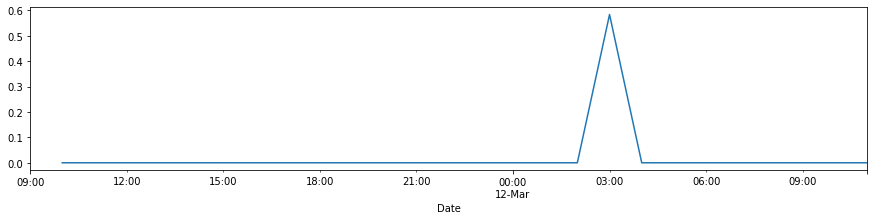

Illinois


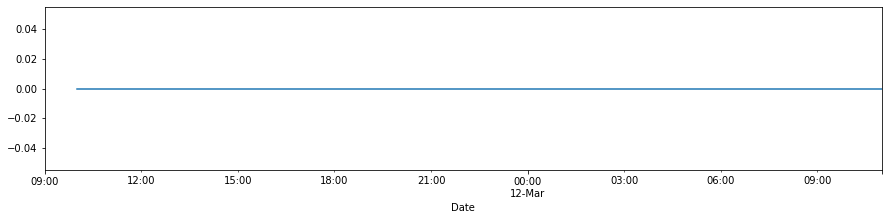

Luxembourg


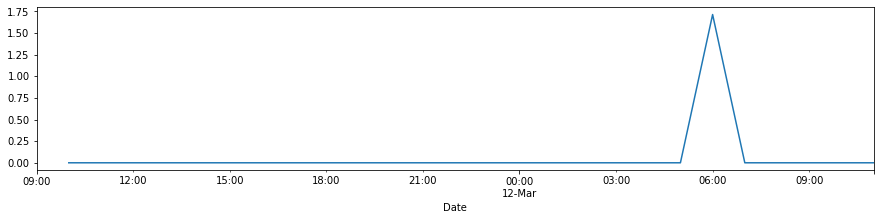

Oman


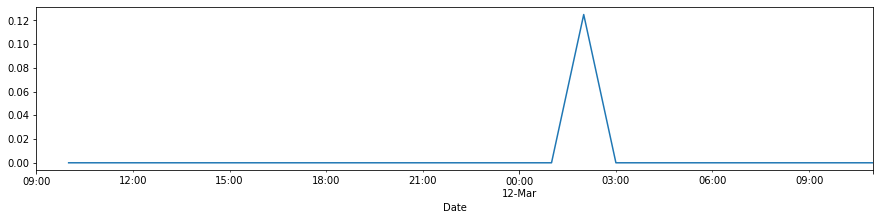

Ecuador


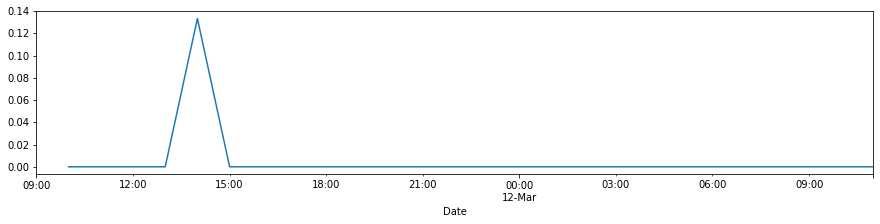

Peru


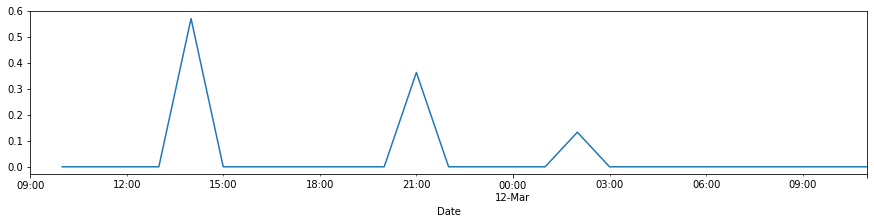

South Africa


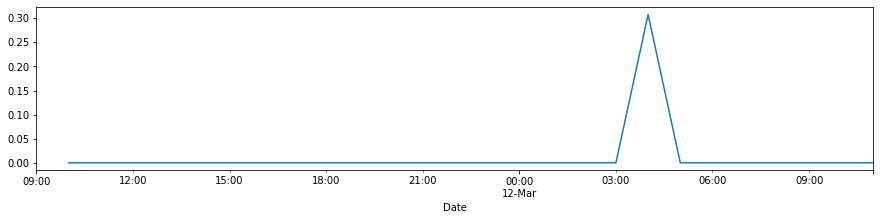

Latvia


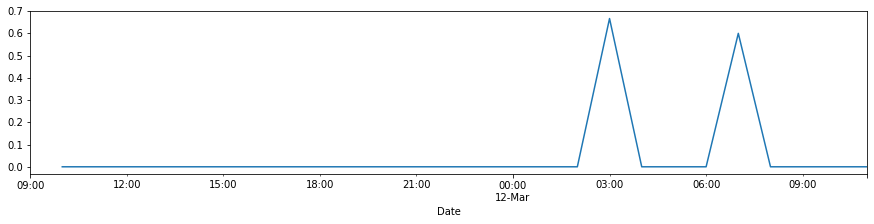

Albania


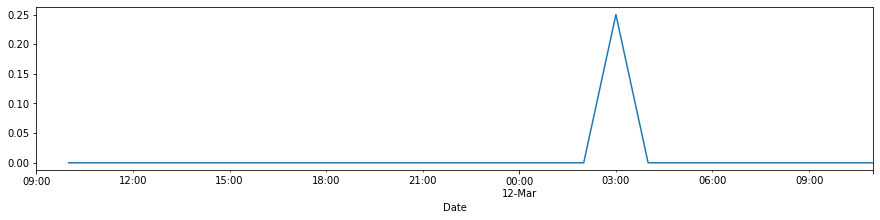

Oregon


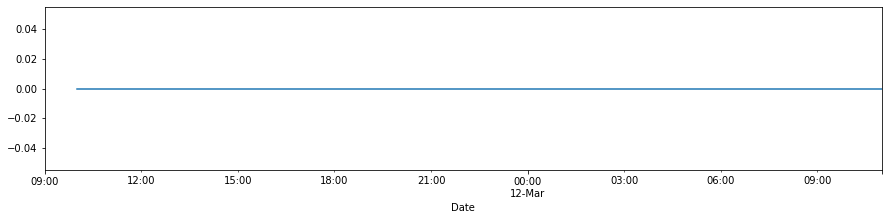

Panamá


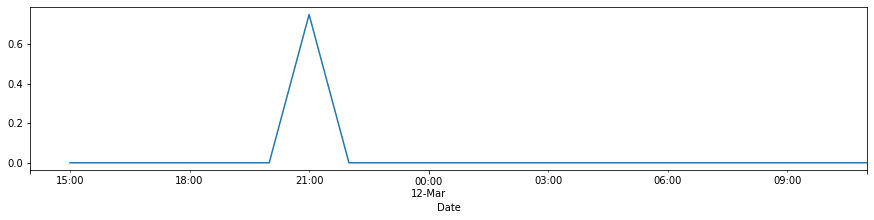

Iowa


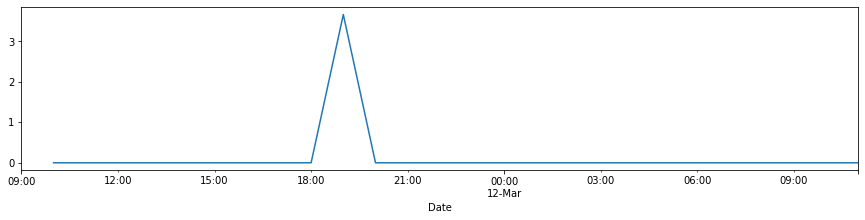

Hungary


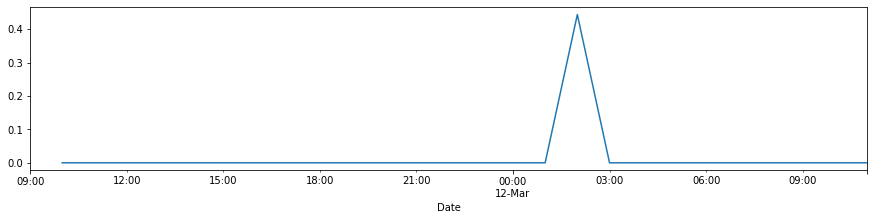

México


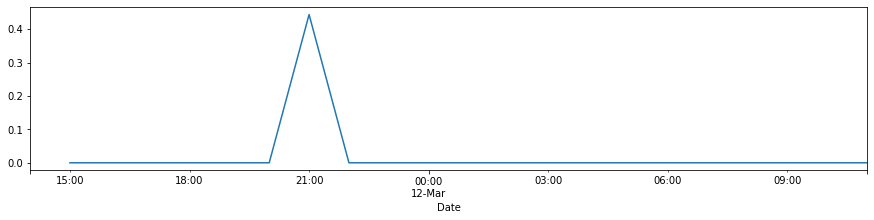

Mexico


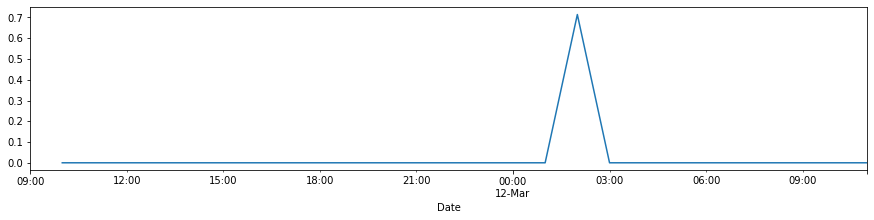

Belarus


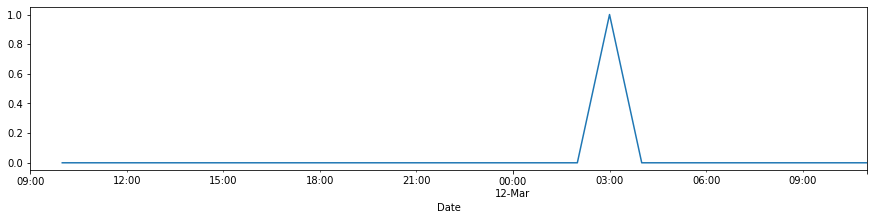

South Australia


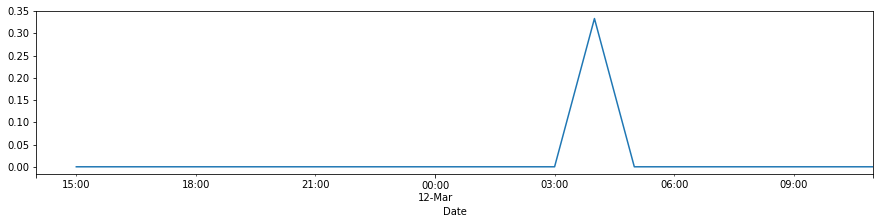

Azerbaijan


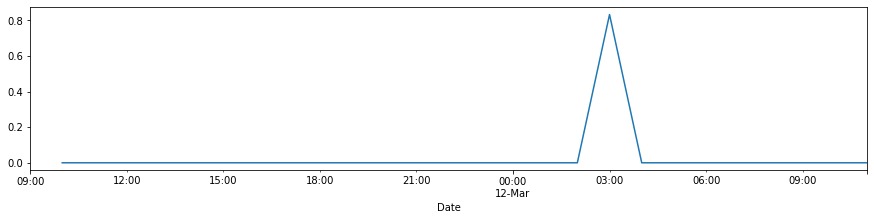

Bosnia


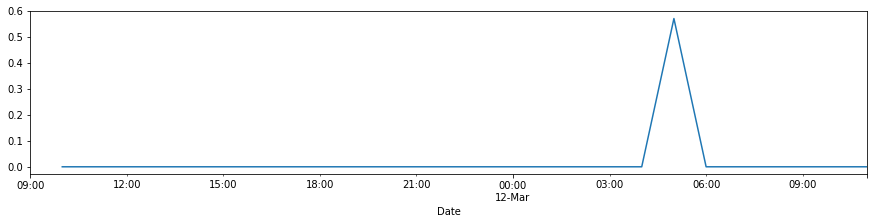

Pennsylvania


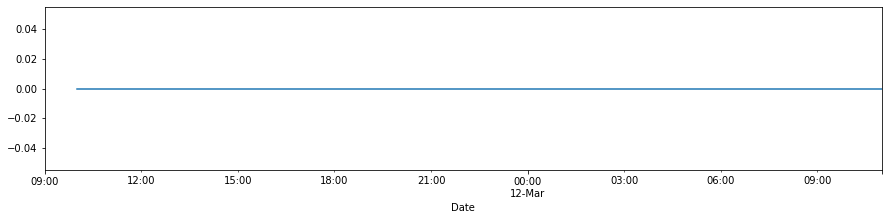

Estonia


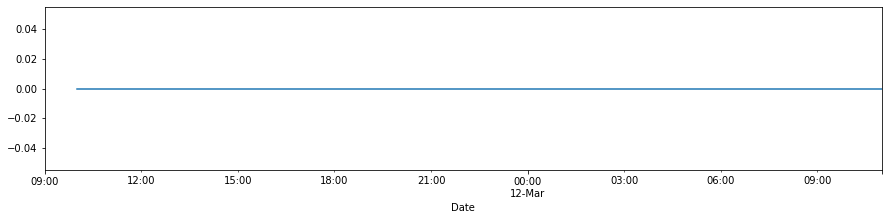

Macau


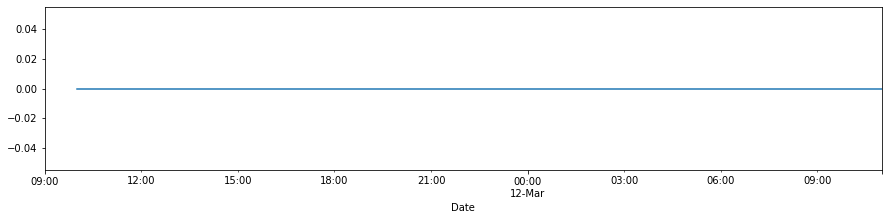

Slovakia


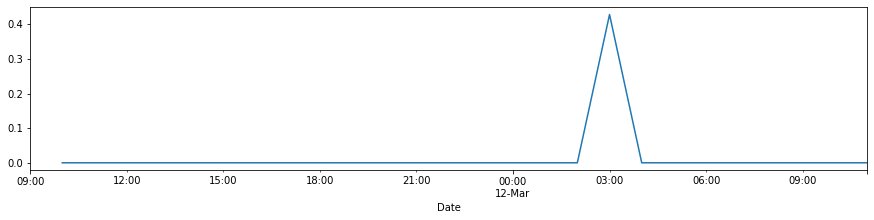

South Carolina


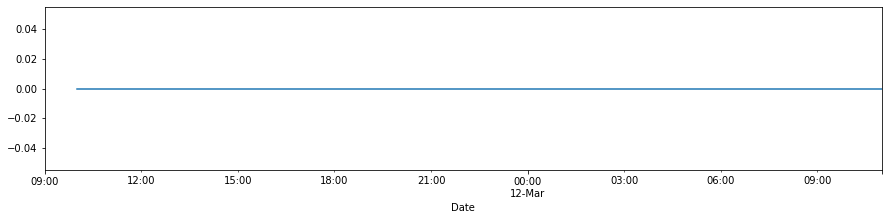

Colombia


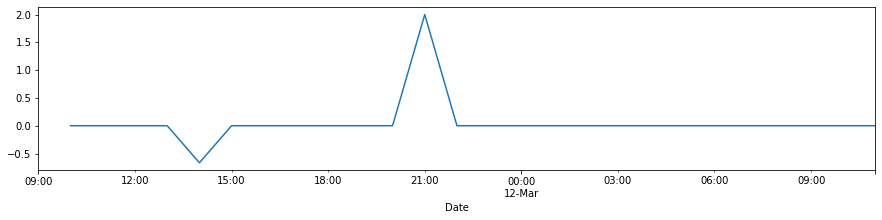

Western Australia


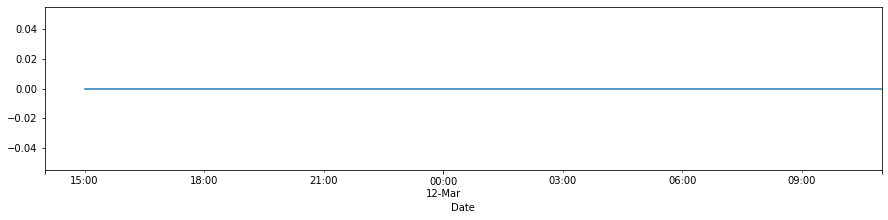

Arizona


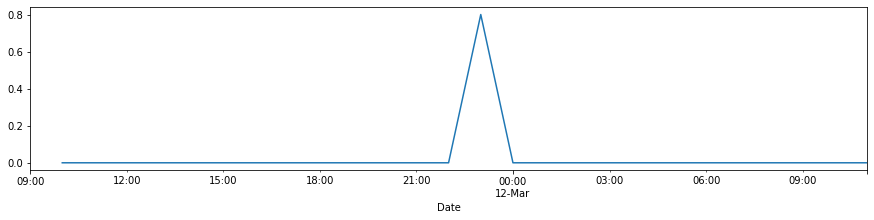

Colorado


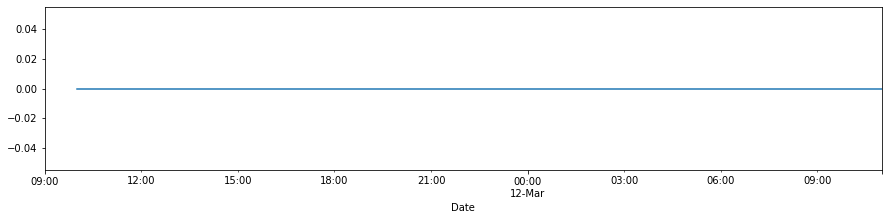

Panama


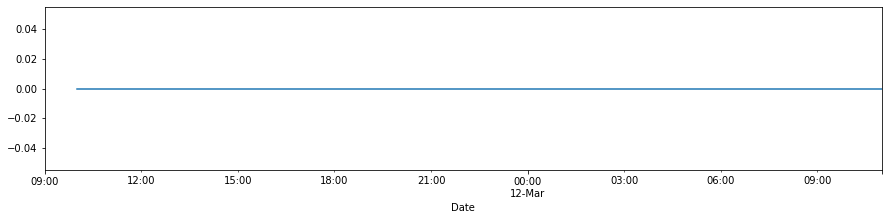

Maldives


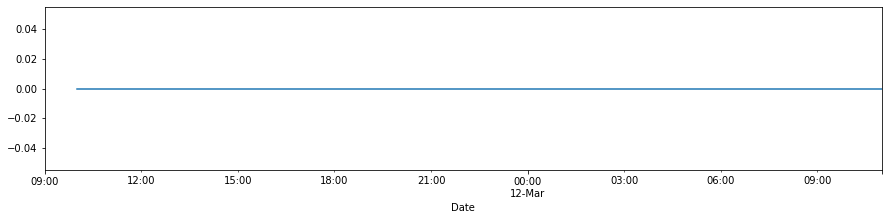

Kentucky


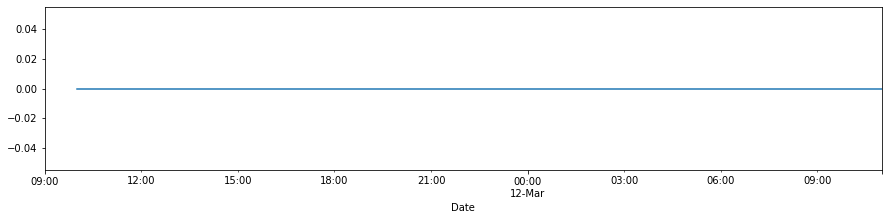

Quebec


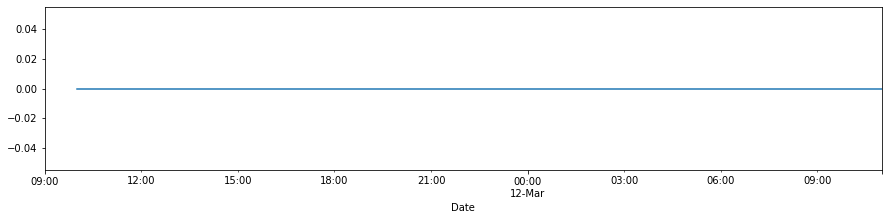

Texas


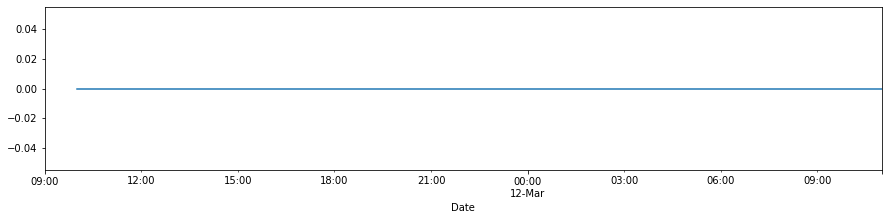

North Macedonia


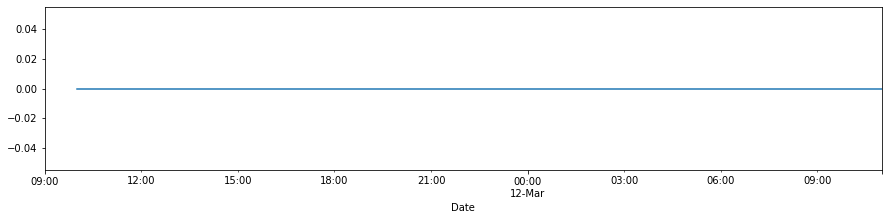

Tunisia


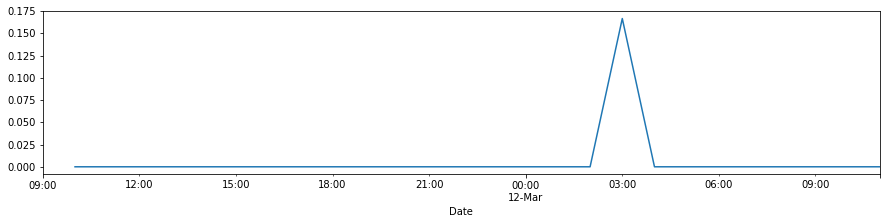

Afghanistan


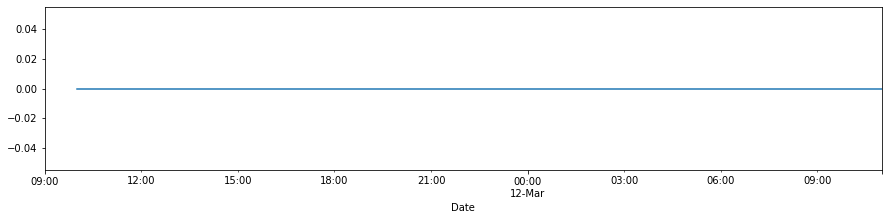

Bulgaria


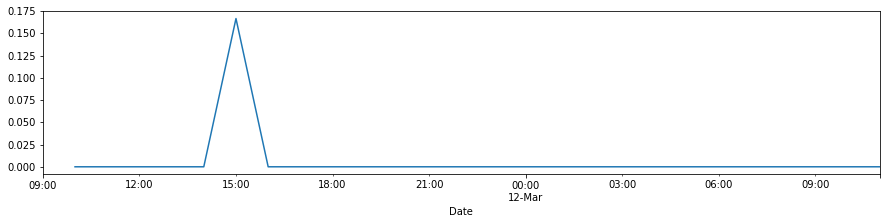

Malta


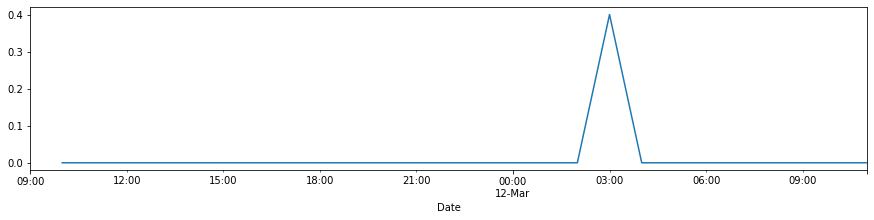

Cyprus


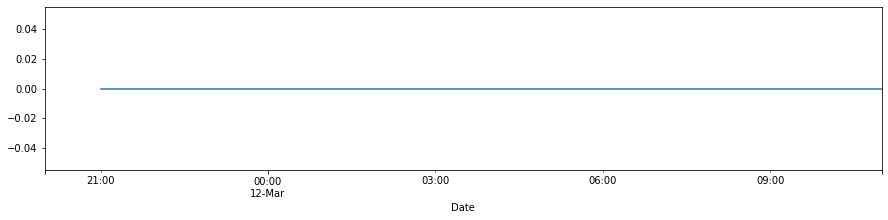

Maryland


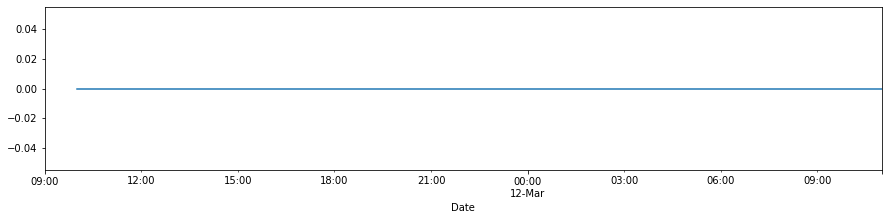

Morocco


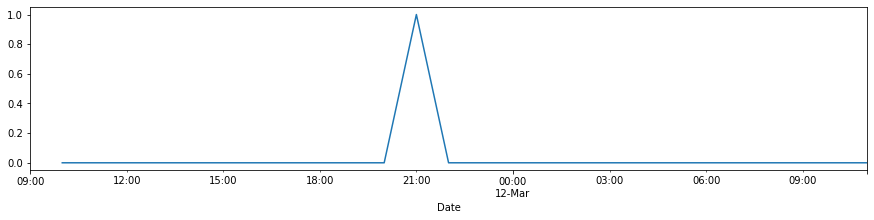

Wisconsin


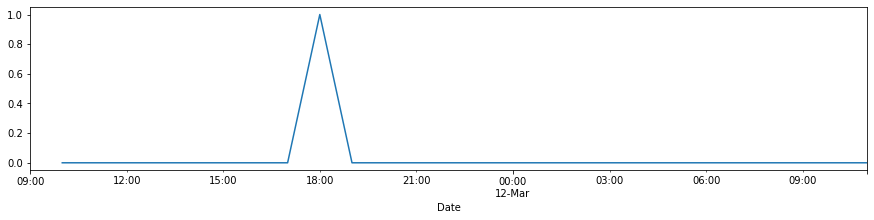

Paraguay


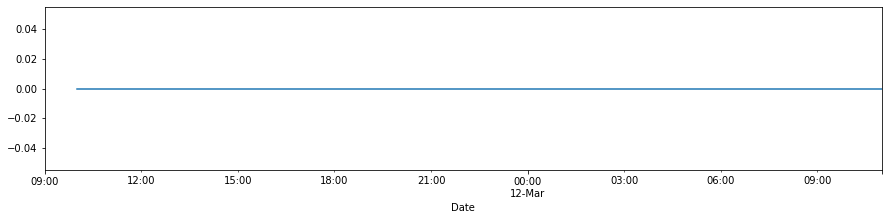

Dominican Republic


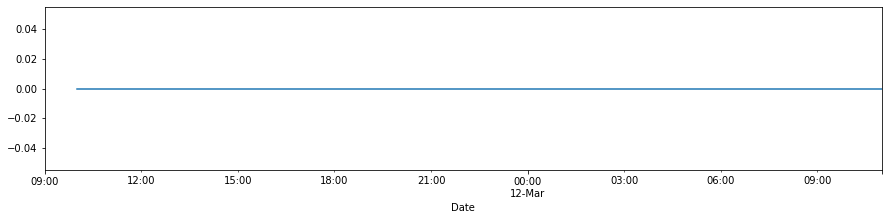

Rep. Dominicana


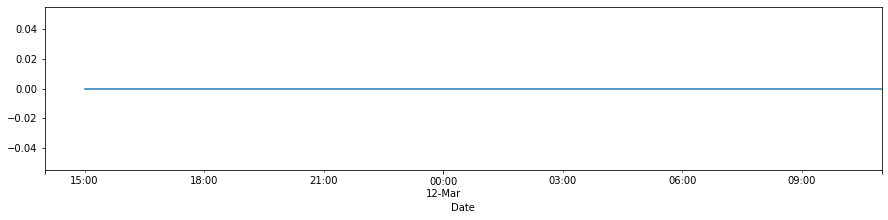

South Dakota


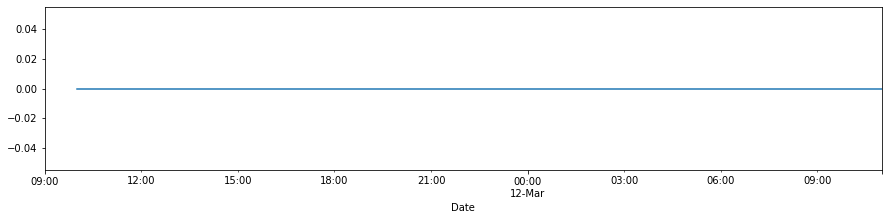

New Zealand


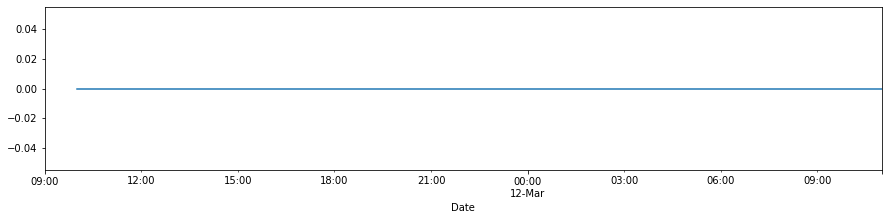

Virginia


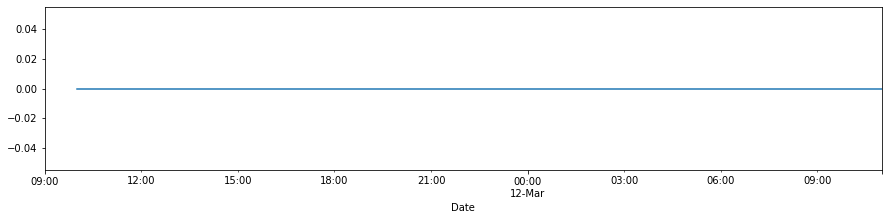

Senegal


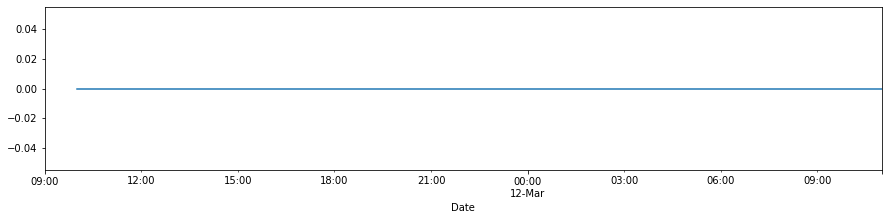

New Hampshire


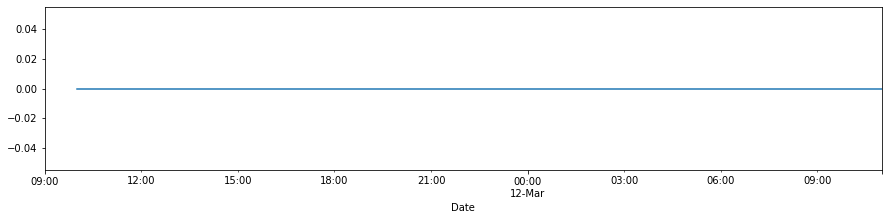

Nevada


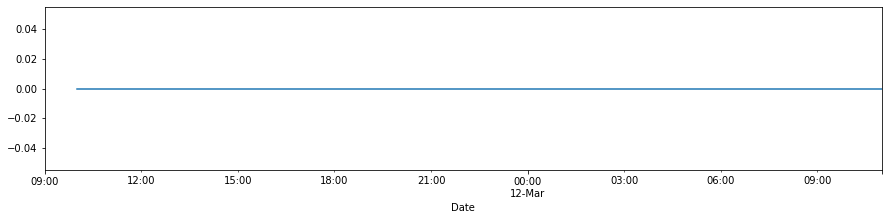

Minnesota


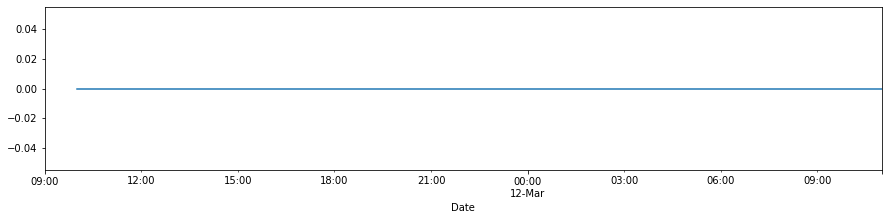

Bangladesh


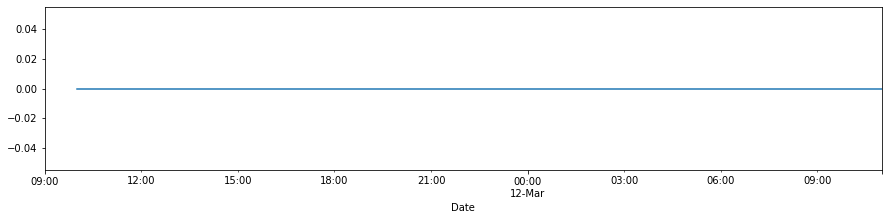

Moldova


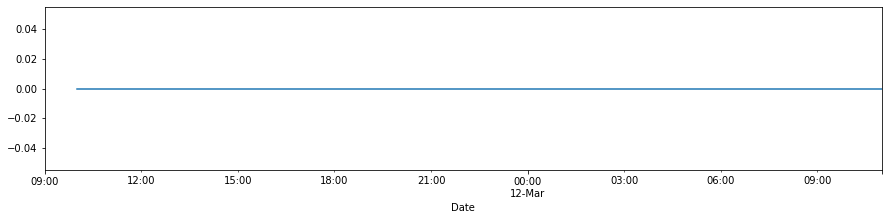

Lithuania


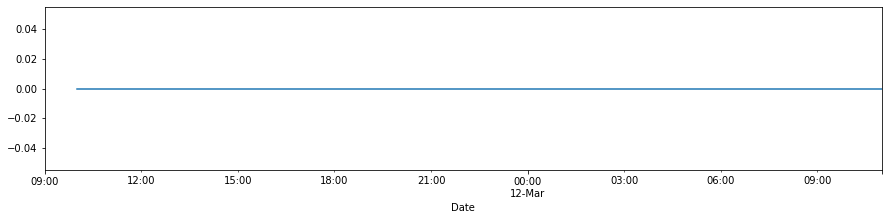

Cambodia


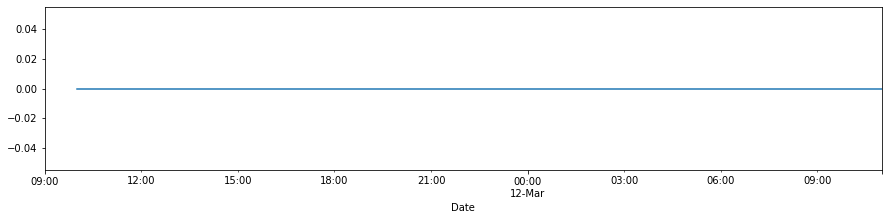

Tennessee


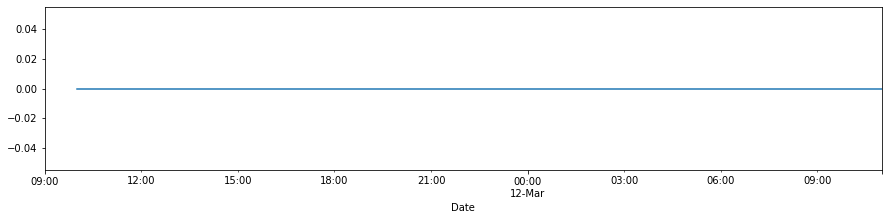

Rhode Island


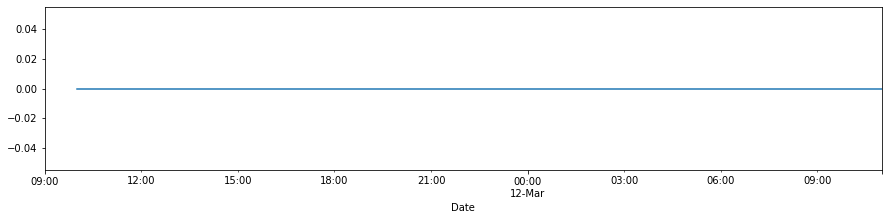

Ohio


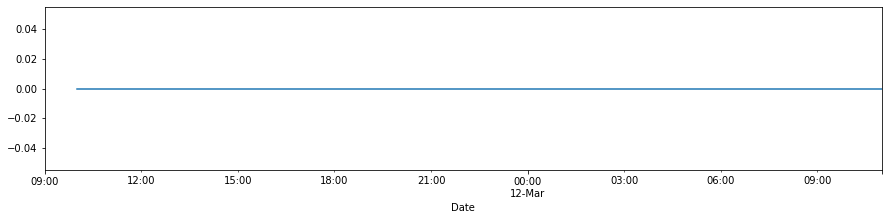

Cuba


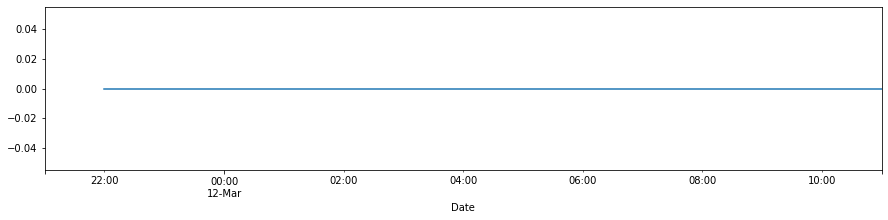

Honduras


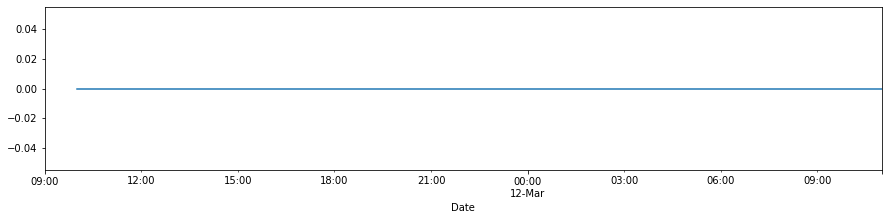

Indiana


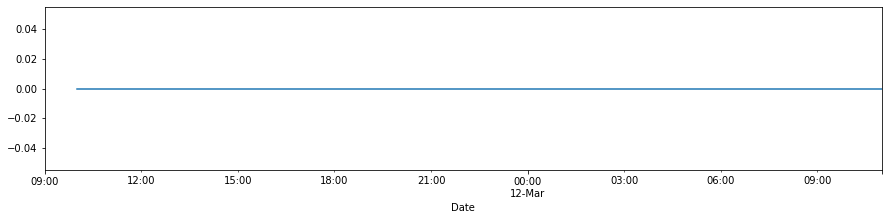

Jamaica


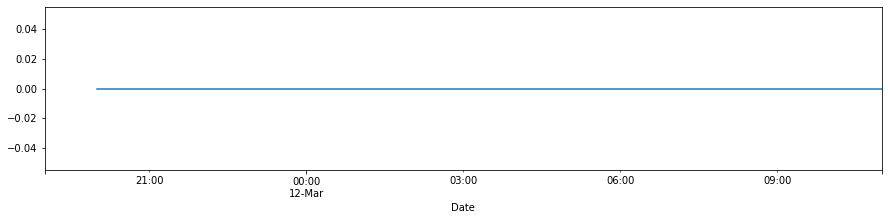

Sri Lanka


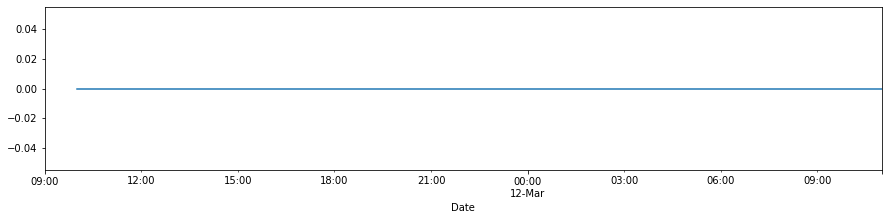

Bolivia


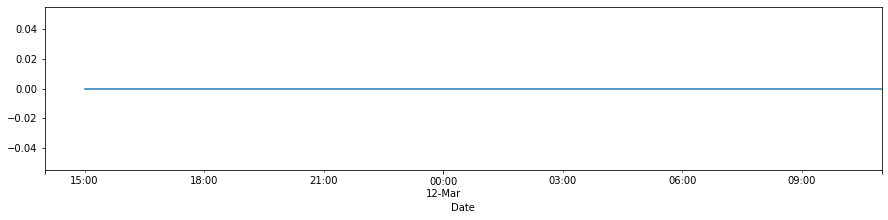

Cameroon


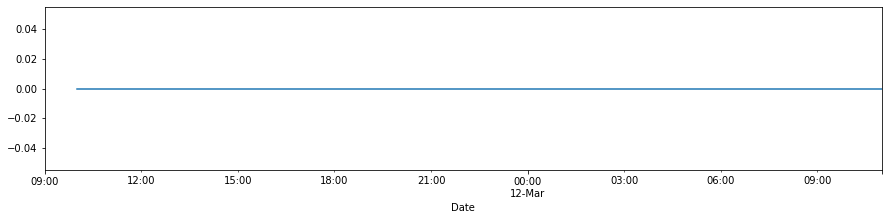

Tasmania


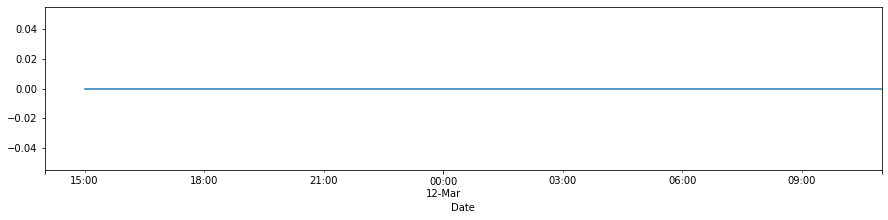

Hawaii


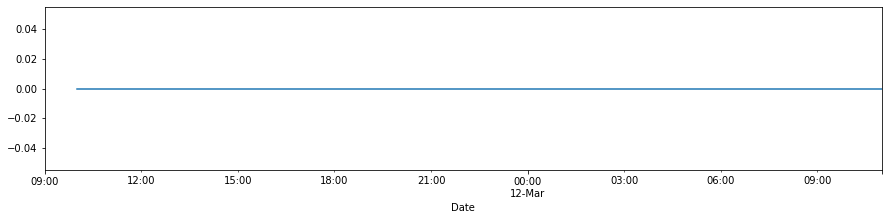

Connecticut


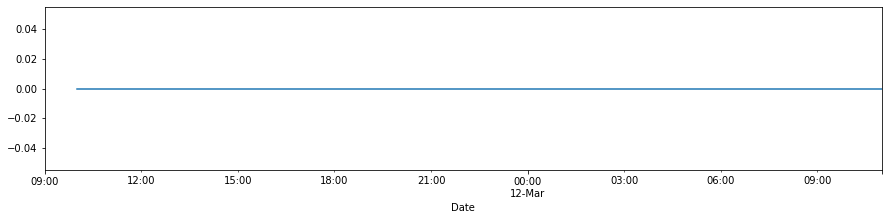

Michigan


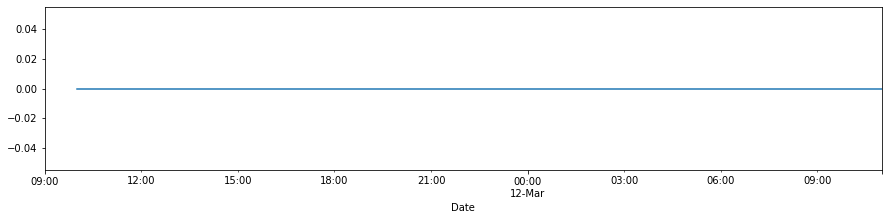

Nigeria


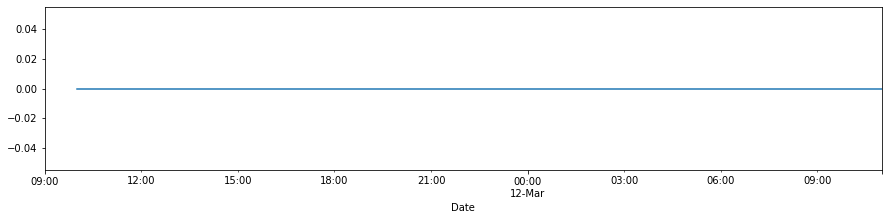

North Carolina


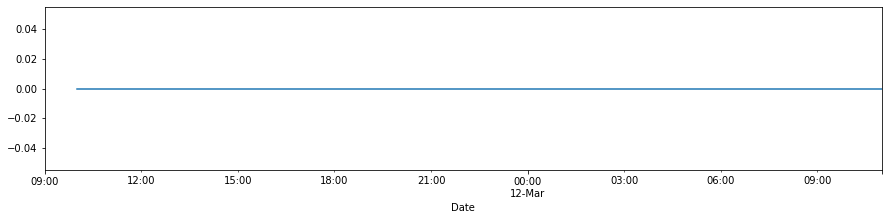

Missouri


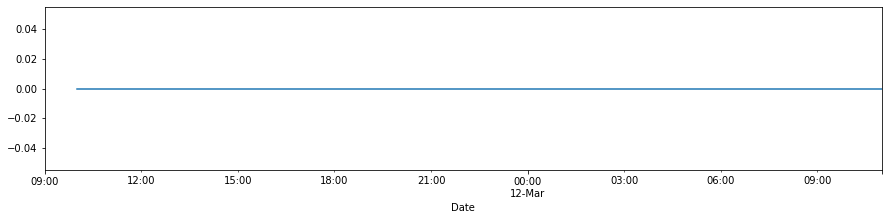

Andorra


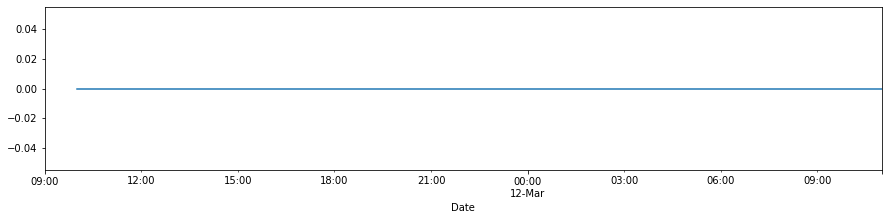

Mississippi


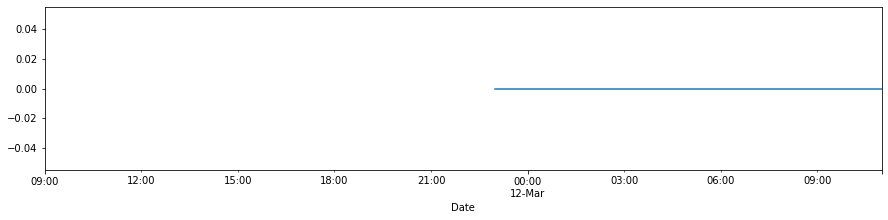

Utah


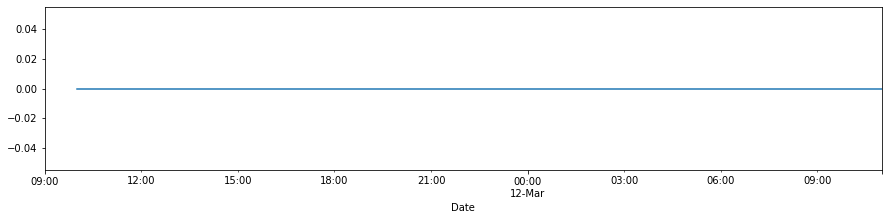

Northern Territory


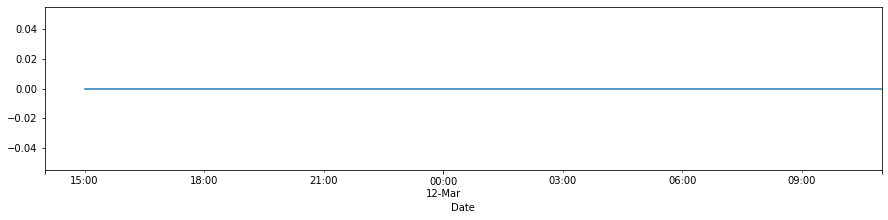

Nebraska


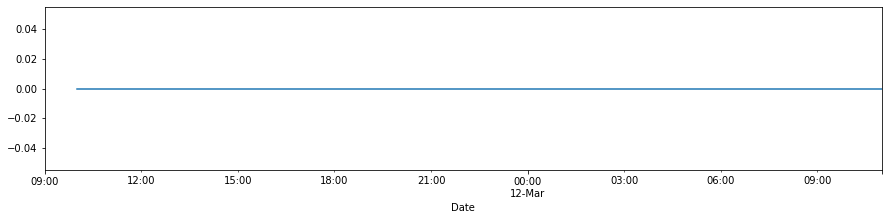

Vermont


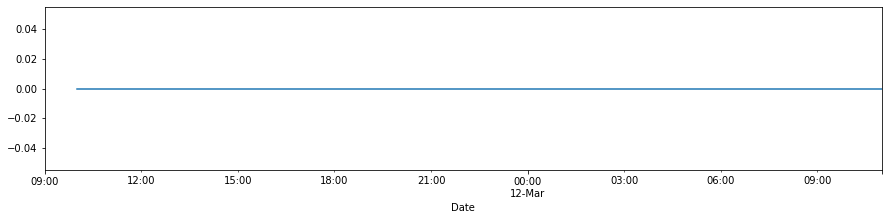

Oklahoma


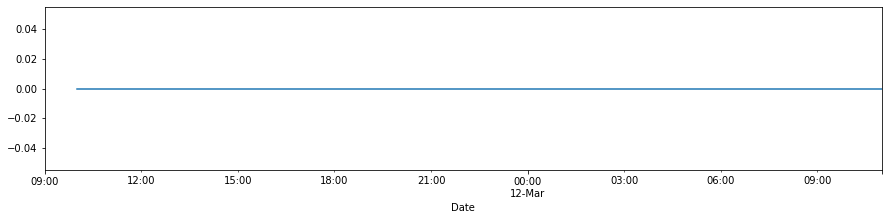

Vatican City


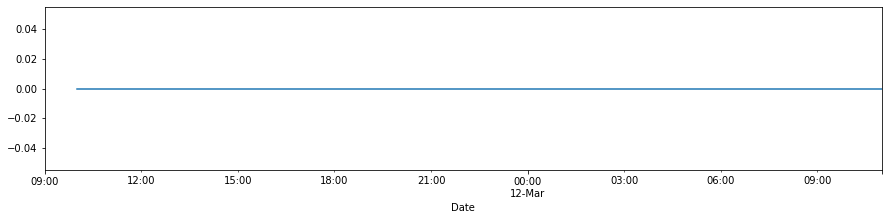

Togo


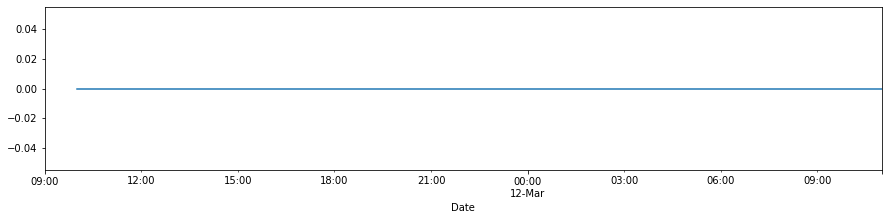

Bhutan


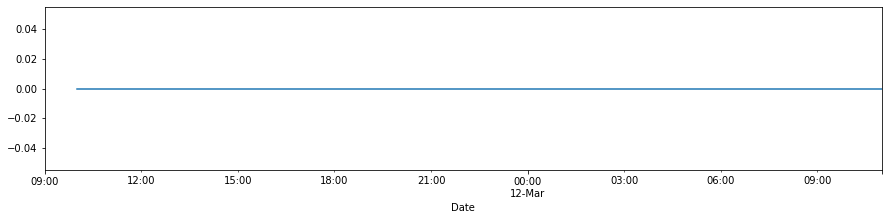

Monaco


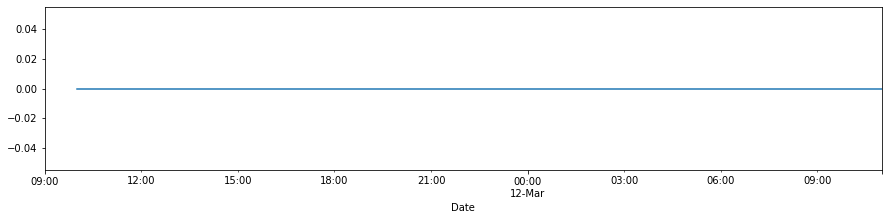

Turkey


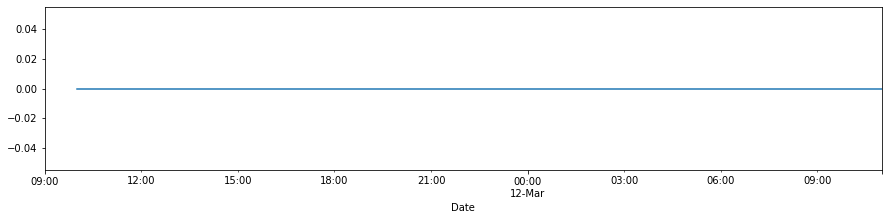

District of Columbia


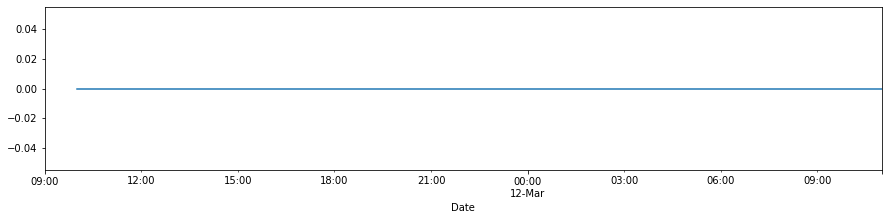

Armenia


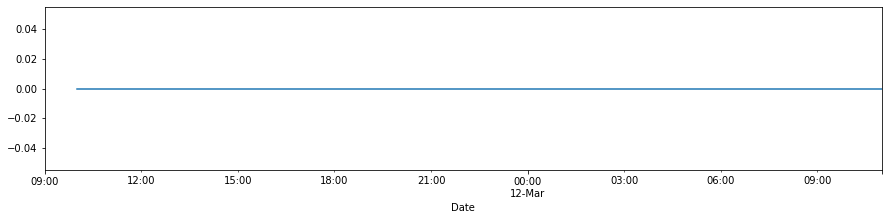

Ukraine


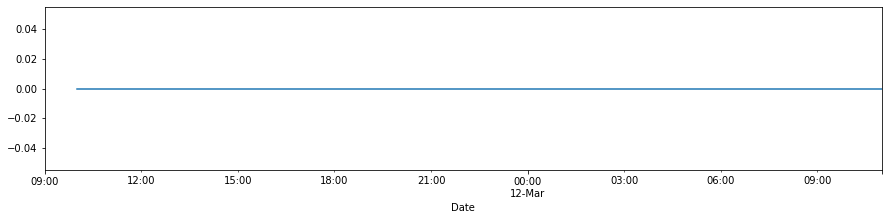

Louisiana


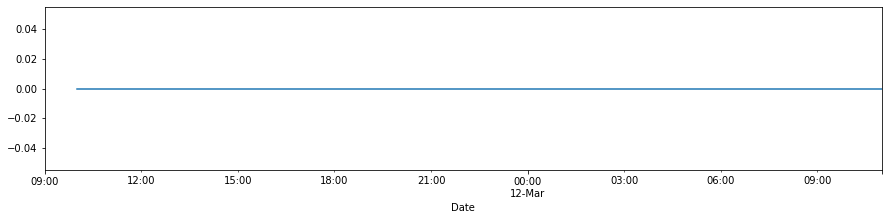

Liechtenstein


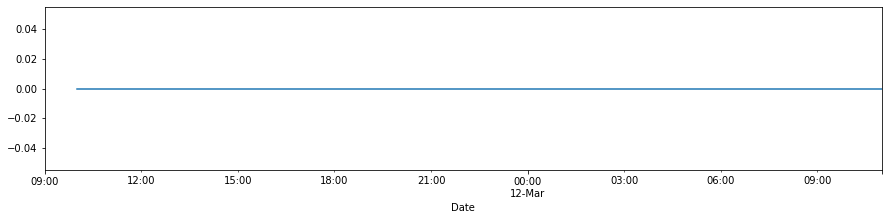

Kansas


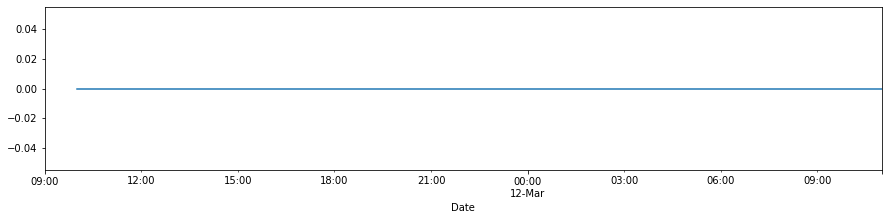

Nepal


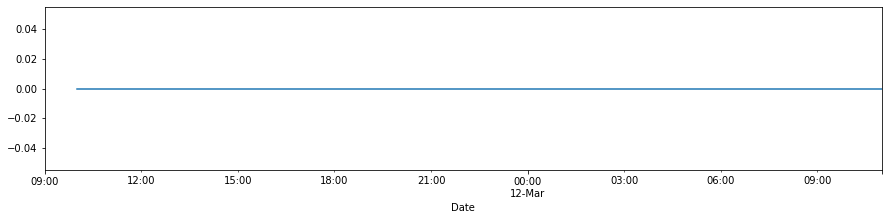

Jordan


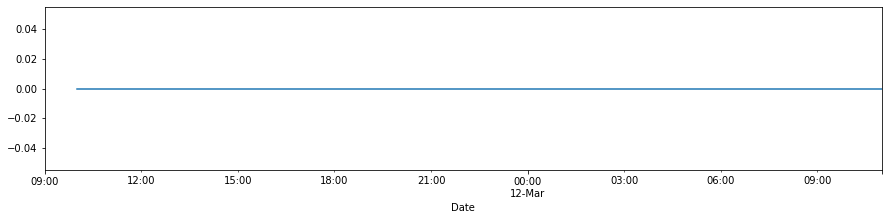

Gibraltar


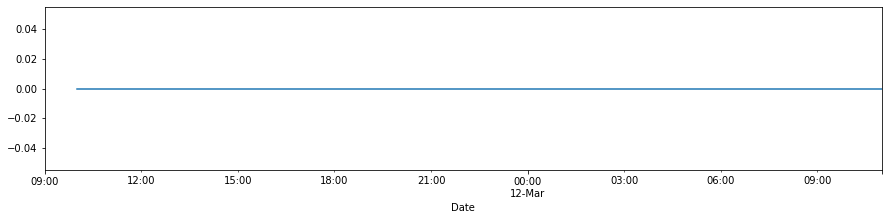

U.S. Virgin Islands


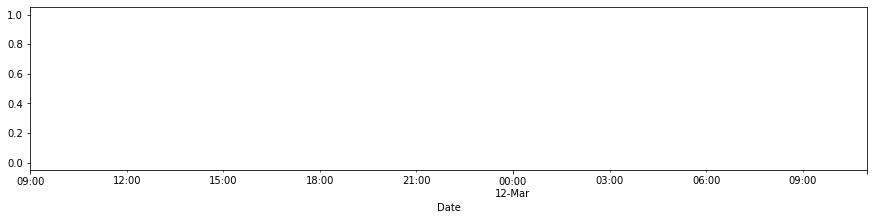

Yukon


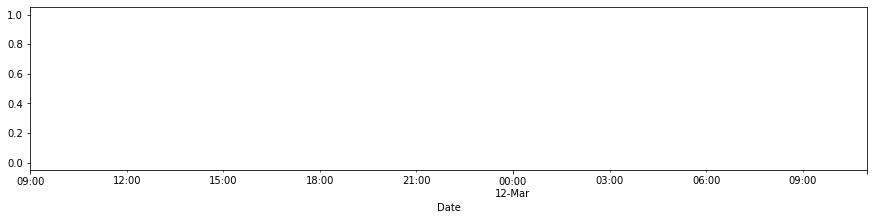

Alabama


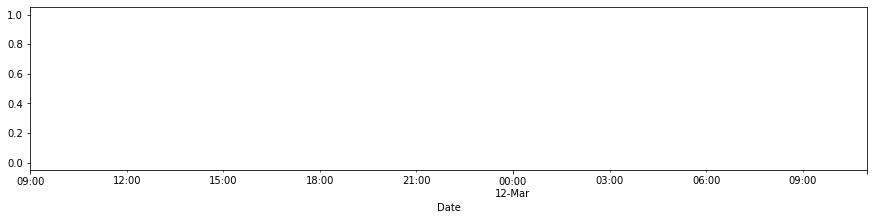

Wyoming


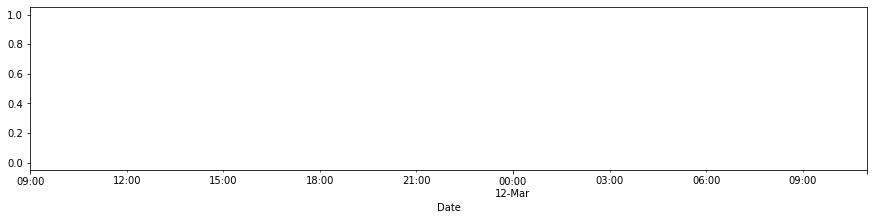

New Mexico


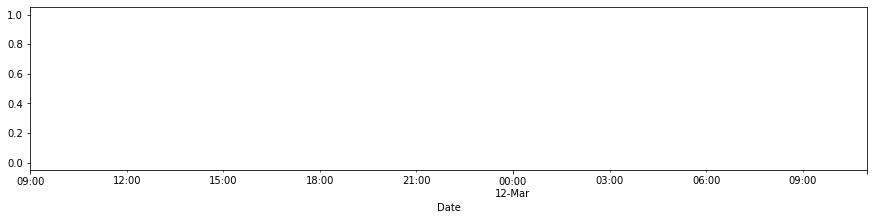

Montana


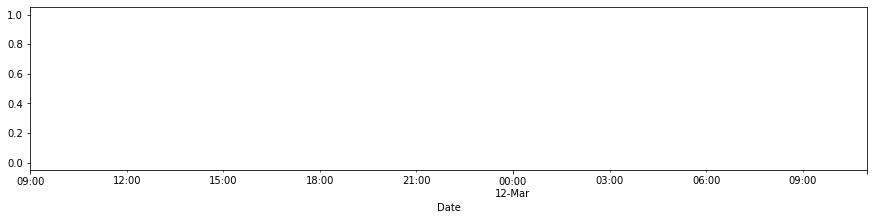

American Samoa


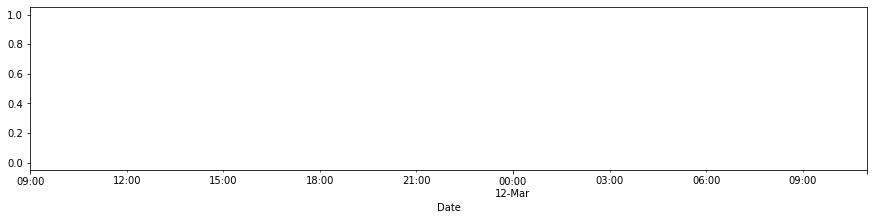

Alaska


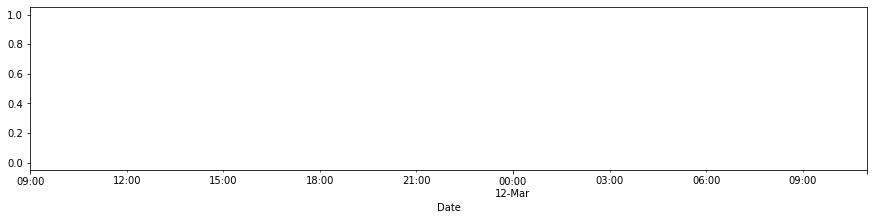

New Brunswick


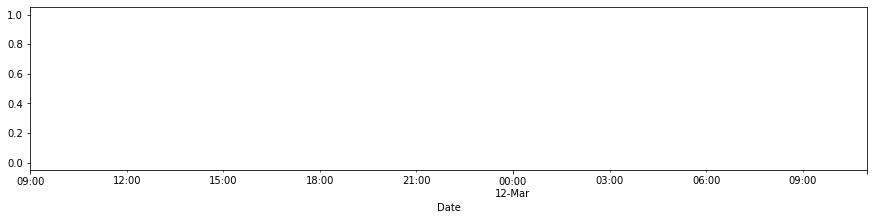

West Virginia


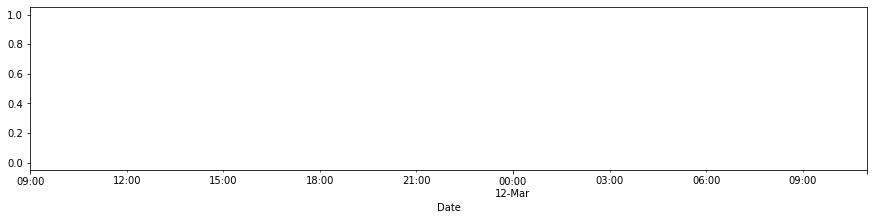

Arkansas


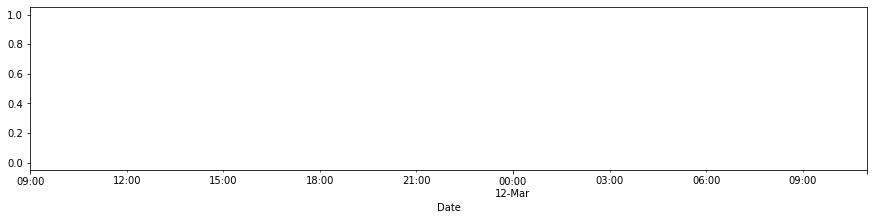

Prince Edward Island


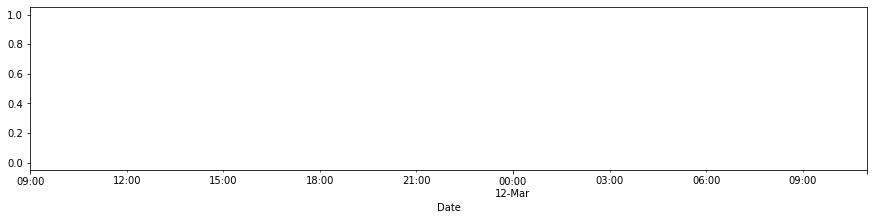

Maine


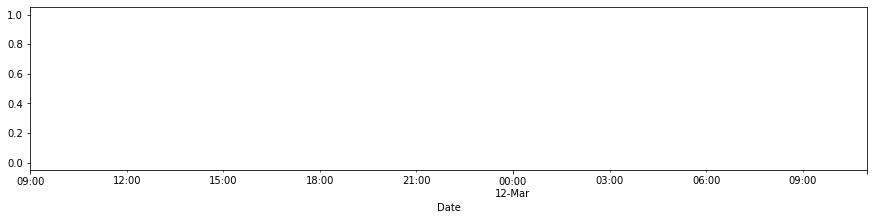

Manitoba


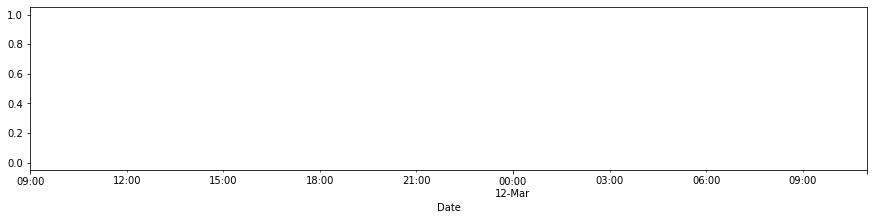

Guam


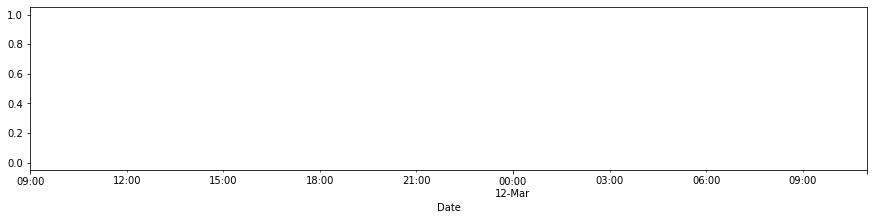

Saskatchewan


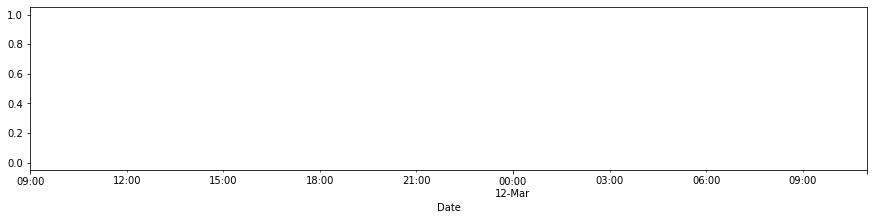

External territories


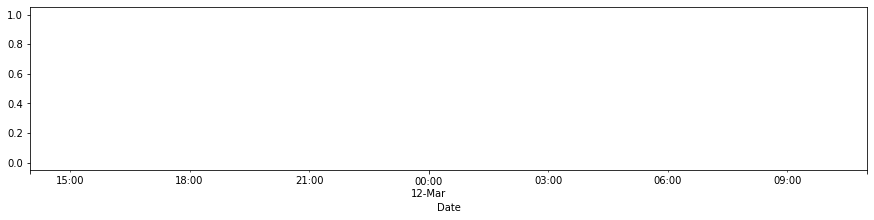

Delaware


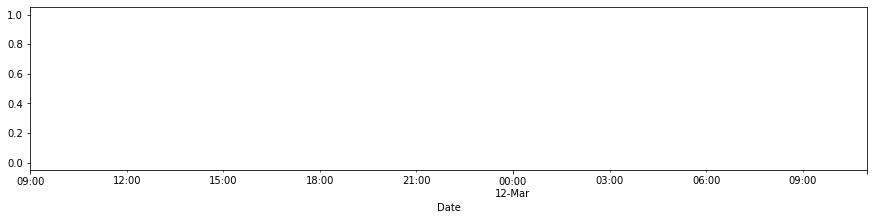

Jervis Bay Territory


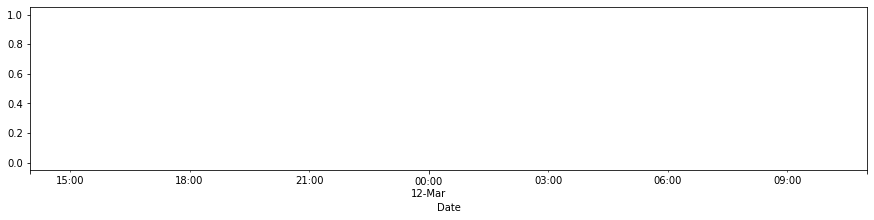

Puerto Rico


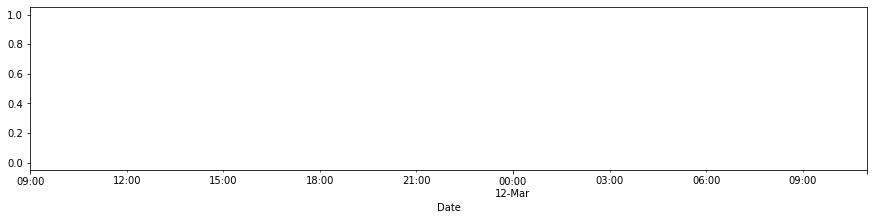

Idaho


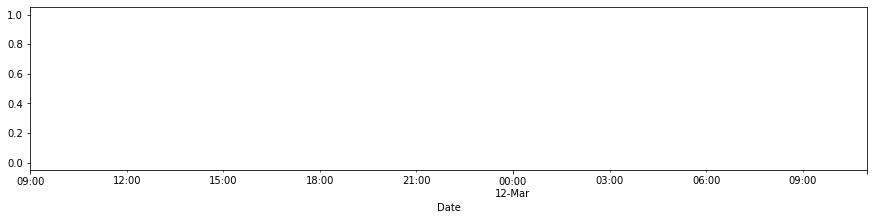

North Dakota


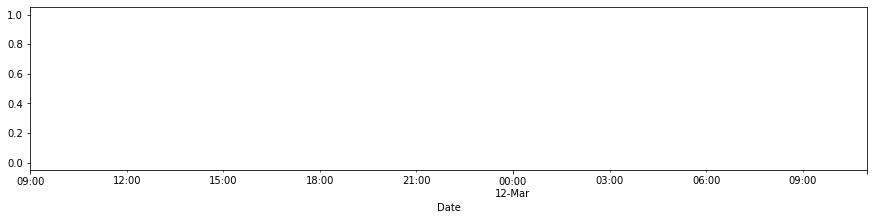

Northern Mariana Islands


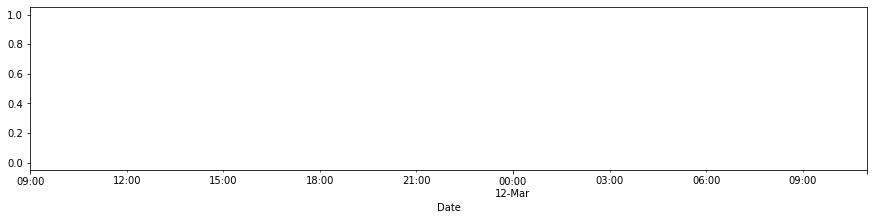

Northwest Territories


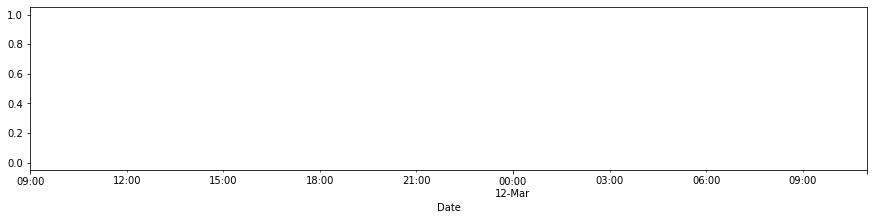

Newfoundland & Labrador


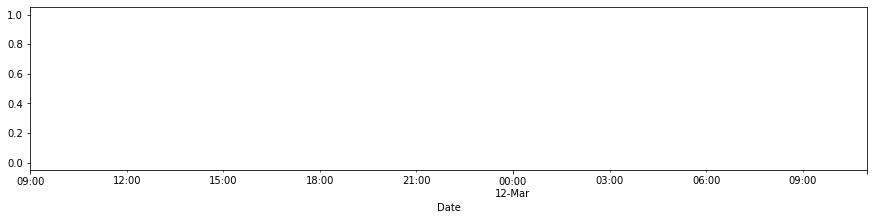

Nunavut


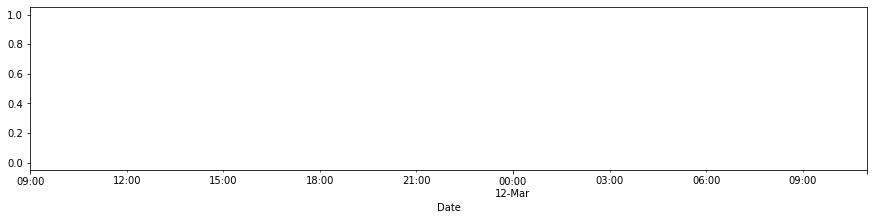

Nova Scotia


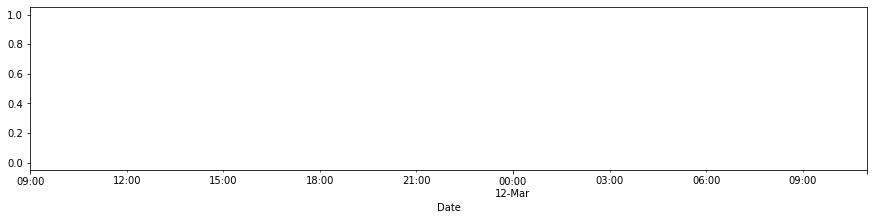

Canberra (ACT)


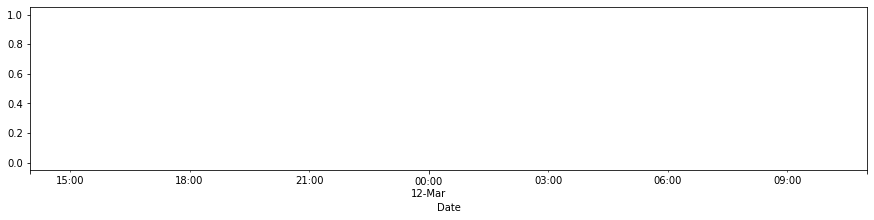

In [258]:
for region in df.sort_values('Confirmed', ascending=False)['Region'].unique():
    plt.figure(figsize=(15,3))
    print(region)
    display(df[df.Region == region].pct.plot() ) ;
    plt.show();